In [1]:
!pip install autogluon

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.4.0-1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.0-1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install transformers==4.36.2

  Using cached tokenizers-0.15.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 46.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 15.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.7 MB/s  0:00:00
Using cached tokenizers-0.15.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.4/789.4 kB 26.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [transformers] [transformers]ub]
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install anvil-uplink

Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import anvil.server

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set_style("whitegrid")

from autogluon.tabular import TabularPredictor
# from autogluon.multimodal import MultiModalPredictor

np.random.seed(123)
random.seed(123)

/home/jupyter-havm29@vse.cz/venvs/ag111/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## AutoGluon - loading trained models

In [4]:
# title,abstract,journal,ais,impf,authors 
predictor = TabularPredictor.load("models/ag_final_grade")

# 'title','abstract','novelty','rigor','grammar','replicability','accessibility'
predictor_llm = TabularPredictor.load("models/ag_anvil_LLM")

/home/jupyter-havm29@vse.cz/venvs/ag111/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.6.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/jupyter-havm29@vse.cz/venvs/ag111/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.6.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## LLM features - Hugging face

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import torch
import re
from transformers import set_seed
import json
from torch import cuda
torch.cuda.empty_cache()

In [8]:
!nvidia-smi

Sat Aug 30 23:07:36 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A4000               Off | 00000000:03:00.0 Off |                  Off |
| 41%   28C    P8               6W / 140W |      3MiB / 16376MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
%pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 2.3.1+cpu
Uninstalling torch-2.3.1+cpu:
  Successfully uninstalled torch-2.3.1+cpu
Found existing installation: torchvision 0.18.1
Uninstalling torchvision-0.18.1:
  Successfully uninstalled torchvision-0.18.1
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.0/781.0 MB 62.2 MB/s  0:00:09:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.2 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.4 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 12.8 MB/s  0:00:01m0:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 9.6 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 15.8 MB/s  0:00:00m0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 17.1 MB/s  0:00:39:00:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 16.2 MB/s  0:00:24:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 16.0 MB/s  0:00:07:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 16.1 MB/s  0:00:03m0:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 15.0 MB/s  0:

In [6]:
cuda.is_available()

True

In [ ]:
HUGGING_FACE_API_KEY = "" # do not share
set_seed(42)

In [13]:
%pip uninstall -y auto-gptq
%pip install -U pip ninja packaging


%pip install -U --no-cache-dir auto-gptq

Found existing installation: auto_gptq 0.7.1+cu118
Uninstalling auto_gptq-0.7.1+cu118:
  Successfully uninstalled auto_gptq-0.7.1+cu118
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 51.7 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "TheBloke/Llama-2-13B-chat-GPTQ"

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             revision="main")
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)

/home/jupyter-havm29@vse.cz/venvs/ag111/lib/python3.9/site-packages/auto_gptq/nn_modules/triton_utils/kernels.py:411: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, qweight, scales, qzeros, g_idx, bits, maxq):
/home/jupyter-havm29@vse.cz/venvs/ag111/lib/python3.9/site-packages/auto_gptq/nn_modules/triton_utils/kernels.py:419: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):
/home/jupyter-havm29@vse.cz/venvs/ag111/lib/python3.9/site-packages/auto_gptq/nn_modules/triton_utils/kernels.py:461: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float16)
CUDA extension not installed.
CUDA extension not installed.
`loss_type=None` was se

In [7]:
def generate_output(title, abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are an expert categorization assistant. Your task is to evaluate the provided abstract and determine if it belongs to a scientific paper or not. 
    To make this decision, you will consider the structure, terminology, and overall content of the abstract. 
    The abstract must contain enough information to assess the research, and it should not be overly brief (e.g., a single word or a vague phrase).
    Based on your analysis, provide a 10-sentence explanation justifying your decision. In your explanation, highlight key elements that signal whether the abstract is scientific, such as technical language, methodology, citations, or a focus on empirical findings. 
    If the abstract lacks these elements or appears to be more general or descriptive, explain why it does not qualify as scientific. Be thorough and clear in your reasoning. Try to write it in 2 paragraphs

    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 

    input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
    output = model.generate(inputs=input_ids, do_sample=False, max_new_tokens=500)
    features = tokenizer.decode(output[0]).split('Response:')[1]

    features = features.replace("</s>", "")
    
    del input_ids
    del output
    torch.cuda.empty_cache()  # Clear GPU memory
    return features

def generate_novelty(title,abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant . Your job will be to assign a certain
    characteristic to a research paper based on its abstract.
    In this instance you will decide the novelty of the research and its
    findings based on the abstract.
    Novelty is a metric of how innovative the research presented is and how
    much it is new to the landscape of scientific research.
    You will choose between three levels of novelty : low , medium and high.
    Low being the least innovative and high being the most.
    Be concise , do not provide any explanations. Your answer will consist of
    an answer in JSON format like so:
    
    {{
        "novelty": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    
    input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
    output = model.generate(inputs=input_ids, do_sample=False, max_new_tokens=17)
    features = tokenizer.decode(output[0]).split('Response:')[1]
    
    
    features = features.replace(" ", "").replace("\n", "").replace("</s>", "").replace(".", "")
    pattern = r':\s*"(.*?)"\s*\}'
    match = re.search(pattern, features)
    features = match.group(1)

    print(features)
    del input_ids
    del output
    torch.cuda.empty_cache()  # Clear GPU memory
    return features

# Use this code - rigor
def generate_rigor(title, abstract):
    prompt_template= f'''[INST] <<SYS>>
    Methodological rigor represents the soundness of logic presented in the
    article abstract by its authors.
    You will choose between three levels of rigor: low , medium and high. Low
    being the least rigorous and high being the most.
    Be concise , do not provide any explanations . Your answer will consist of
    an answer in json format like so:

    {{
        "rigor": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 

    input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
    output = model.generate(inputs=input_ids, do_sample=False, max_new_tokens=17)
    features = tokenizer.decode(output[0]).split('Response:')[1]
    
    
    features = features.replace(" ", "").replace("\n", "").replace("</s>", "").replace(".", "")
    pattern = r':\s*"(.*?)"\s*\}'
    match = re.search(pattern, features)
    features = match.group(1)

    print(features)
    del input_ids
    del output
    torch.cuda.empty_cache()  # Clear GPU memory
    return features

def generate_replicability(title, abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain characteristic to a research paper based on its abstract. 
    In this instance you will assess whether the abstract mentions reproducibility of results..  
    You will choose between two values in your reply: "0" or "1". "0" meaning zero mentions of reproducibility, "1" meaning authors have addressed reproducibility of their research. 
    Be concise, do not provide any explanations. Your answer will consist of an answer in json format like so: 
    {{
        "replicability": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    
    input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
    output = model.generate(inputs=input_ids, do_sample=False, max_new_tokens=17)
    features = tokenizer.decode(output[0]).split('Response:')[1]
    
    features = features.replace(" ", "").replace("\n", "").replace("</s>", "").replace(".", "")
    pattern = r':\s*"(.*?)"\s*\}'
    match = re.search(pattern, features)
    features = match.group(1)
    
    print(features)
    del input_ids
    del output
    torch.cuda.empty_cache()  # Clear GPU memory
    return features

def generate_accessibility(title, abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain characteristic to a research paper based on its abstract.  
    In this instance you will assess the accessibility of the research . 
    Accessibility is a metric of readability and understandability of the language used. Abstracts that do not use overly complicated language while easily explaining what the paper is about will be marked as accessible . 
    You will choose between three levels of accessibility : low , medium and high. Low being the least understandable and high being the most. 
    Be concise , do not provide any explanations . Your answer will consist of an answer in json format like so:
    {{
        "accessibility": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    
    input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
    output = model.generate(inputs=input_ids, do_sample=False, max_new_tokens=17)
    features = tokenizer.decode(output[0]).split('Response:')[1]
    
    
    features = features.replace(" ", "").replace("\n", "").replace("</s>", "").replace(".", "")
    pattern = r':\s*"(.*?)"\s*\}'
    match = re.search(pattern, features)
    features = match.group(1)

    print(features)
    del input_ids
    del output
    torch.cuda.empty_cache()  # Clear GPU memory
    return features

def generate_grammar(title, abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain
    characteristic to a research paper based on its abstract.
    In this instance you will assess whether the abstract has grammatical
    errors in it. All of the abstracts should be written in english - British
    or American.
    You will choose between two values in your reply: 0 or 1. 0 being error -
    free abstract , 1 being grammatically incorrect one.
    Be concise , do not provide any explanations. Your answer will consist of
    an answer in json format like so:

    {{
        "grammar": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    
    input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
    output = model.generate(inputs=input_ids, do_sample=False, max_new_tokens=17)
    features = tokenizer.decode(output[0]).split('Response:')[1]

    
    features = features.replace(" ", "").replace("\n", "").replace("</s>", "").replace(".", "")
    pattern = r':\s*"(.*?)"\s*\}'
    match = re.search(pattern, features)
    features = match.group(1)



    print(features)
    del input_ids
    del output
    torch.cuda.empty_cache()  # Clear GPU memory
    return features


## LLM features - Meta

In [11]:
%pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [replicate]/6 [httpx]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import replicate
import os
import time
import re
os.environ["REPLICATE_API_TOKEN"] = ""

def llama_request(message):
    if not message:
        return ""
    
    # Prepare the input payload for llama model inference
    input = {
        "seed": 42,
        "prompt": message,
        "top_p": 0.9,
        "temperature": 0.1,
        "system_prompt": "You are a helpful assistant. Work only with the text given to you.",
        "max_new_tokens": 17,
        "min_new_tokens": -1
    }
    
    # Make a request to the model through replicate API
    prediction = replicate.predictions.create(model="meta/meta-llama-3-70b-instruct", input=input)
    
    # Retry mechanism for getting the model response
    for i in range(30):
        prediction.reload()
        if prediction.status in {"succeeded", "failed", "canceled"}:
            # Process the prediction output
            features = "".join(prediction.output).replace(" ", "").replace("\n", "").replace("</s>", "").replace(".", "")
            pattern = r':\s*"(.*?)"\s*\}'
            match = re.search(pattern, features)
            features = match.group(1) if match else ""
            return features
        
        # Wait before retrying
        time.sleep(2)
    
    return ""

In [9]:
def generate_output_meta(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are an expert categorization assistant. Your task is to evaluate the provided abstract and determine if it belongs to a scientific paper or not. 
    To make this decision, you will consider the structure, terminology, and overall content of the abstract. 
    The abstract must contain enough information to assess the research, and it should not be overly brief (e.g., a single word or a vague phrase).
    Based on your analysis, provide a 10-sentence explanation justifying your decision. In your explanation, highlight key elements that signal whether the abstract is scientific, such as technical language, methodology, citations, or a focus on empirical findings. 
    If the abstract lacks these elements or appears to be more general or descriptive, explain why it does not qualify as scientific. Be thorough and clear in your reasoning. Try to write it in 2 paragraphs

    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    input = {
        "seed": 42,
        "prompt": prompt_template,
        "top_p": 0.9,
        "temperature": 0.1,
        "system_prompt": "You are a helpful assistant. Work only with the text given to you.",
        "max_new_tokens": 500,
        "min_new_tokens": -1
    }
 
    prediction = replicate.predictions.create(model="meta/meta-llama-3-70b-instruct", input=input)
 
    for i in range(30):
        prediction.reload()
        if prediction.status in {"succeeded", "failed", "canceled"}:
            features = "".join(prediction.output).replace("</s>", "")
            return features
             
        # Wait for 2 seconds and then try again.
        time.sleep(2)
 
    return ""

def generate_novelty_meta(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant . Your job will be to assign a certain
    characteristic to a research paper based on its abstract.
    In this instance you will decide the novelty of the research and its
    findings based on the abstract.
    Novelty is a metric of how innovative the research presented is and how
    much it is new to the landscape of scientific research.
    You will choose between three levels of novelty : low , medium and high.
    Low being the least innovative and high being the most.
    Be concise , do not provide any explanations. Your answer will consist of
    an answer in JSON format like so:
    
    {{
        "novelty": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return llama_request(prompt_template)

# Use this code - rigor
def generate_rigor_meta(abstract):
    prompt_template= f'''[INST] <<SYS>>
    Methodological rigor represents the soundness of logic presented in the
    article abstract by its authors.
    You will choose between three levels of rigor: low , medium and high. Low
    being the least rigorous and high being the most.
    Be concise , do not provide any explanations . Your answer will consist of
    an answer in json format like so:

    {{
        "rigor": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return llama_request(prompt_template)

def generate_replicability_meta(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain characteristic to a research paper based on its abstract. 
    In this instance you will assess whether the abstract mentions reproducibility of results..  
    You will choose between two values in your reply: "0" or "1". "0" meaning zero mentions of reproducibility, "1" meaning authors have addressed reproducibility of their research. 
    Be concise, do not provide any explanations. Your answer will consist of an answer in json format like so: 
    {{
        "replicability": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return llama_request(prompt_template)

def generate_accessibility_meta(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain characteristic to a research paper based on its abstract.  
    In this instance you will assess the accessibility of the research . 
    Accessibility is a metric of readability and understandability of the language used. Abstracts that do not use overly complicated language while easily explaining what the paper is about will be marked as accessible . 
    You will choose between three levels of accessibility : low , medium and high. Low being the least understandable and high being the most. 
    Be concise , do not provide any explanations . Your answer will consist of an answer in json format like so:
    {{
        "accessibility": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return llama_request(prompt_template)

def generate_grammar_meta(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain
    characteristic to a research paper based on its abstract.
    In this instance you will assess whether the abstract has grammatical
    errors in it. All of the abstracts should be written in english - British
    or American.
    You will choose between two values in your reply: 0 or 1. 0 being error -
    free abstract , 1 being grammatically incorrect one.
    Be concise , do not provide any explanations. Your answer will consist of
    an answer in json format like so:

    {{
        "grammar": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return llama_request(prompt_template)

In [10]:
def evaluate_abstract_title(title, abstract):
    prompt_template = f'''[INST] <<SYS>>
    You are an expert categorization assistant. Your task is to evaluate the provided title and abstract together to determine if they qualify as part of a scientific paper. 

    - **Title:** The title should be concise, descriptive, and relevant to the content of a scientific paper. It should not be overly vague, excessively short and without a word, or lacking in specificity. 

    - **Abstract:** The abstract should contain enough information to assess the research, including elements like technical language, methodology, or empirical findings. It should not be overly brief (e.g., a single word or vague phrase). 

    Both the title and abstract must qualify as scientific for the overall evaluation to be positive.

    Provide a JSON response as follows:
    Where:
    - `value` is 1 if both the title and abstract QUALIFY (1 and 1) as scientific.
    - `value` is 0 if either the title or the abstract (1 and 0 and vice versa) does not qualify as scientific.
    
    {{
        "is_scientific": "value"
    }}
    

    <</>>

    title: {title}
    abstract : {abstract}[/INST]
    Response:
    '''
    return llama_request(prompt_template)


## LLM VSE - Ollama

In [16]:
%pip install ollama

Note: you may need to restart the kernel to use updated packages.


In [11]:
from ollama import Client as OllamaClient
import re
  
def features_request_ollama(prompt):
    ollama_client = OllamaClient(host="https://llm.vse.cz/ollama")
    
    
    ollama_list = ollama_client.list()["models"]
    
    output = ollama_client.chat(
        model="llama-3.3-70b-instruct:q4",#"llama3.3:latest" původní ale už nefunkční model
        stream=False,
        format="json",
        messages=[
            {"role": "system", "content": "You are a helpful assistant. Work only with the text given to you."},
            { "role": "user", "content": prompt}],
        options={
            "max_tokens": 500,
            "temperature": 0,
            "top_p": 1,
            "repeat_penalty": 1.1
        }
    )

    response = output["message"]["content"] 
 
 
    pattern = r':\s*"(.*?)"\s*\}'
    match = re.search(pattern, response)
    response = match.group(1) if match else response
 
    return response

In [12]:
def generate_output_ollama(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are an expert categorization assistant. Your task is to evaluate the provided abstract and determine if it belongs to a scientific paper or not. 
    To make this decision, you will consider the structure, terminology, and overall content of the abstract. 
    The abstract must contain enough information to assess the research, and it should not be overly brief (e.g., a single word or a vague phrase).
    Based on your analysis, provide a 10-sentence explanation justifying your decision. In your explanation, highlight key elements that signal whether the abstract is scientific, such as technical language, methodology, citations, or a focus on empirical findings. 
    If the abstract lacks these elements or appears to be more general or descriptive, explain why it does not qualify as scientific. Be thorough and clear in your reasoning. Try to write it in 2 paragraphs

    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    
    ollama_client = OllamaClient(host="https://llm.vse.cz/ollama")

    output = ollama_client.chat(
        model="llama3.3:latest",
        stream=False,
        format="json",
        messages=[
            {"role": "system", "content": "You are a helpful assistant. Work only with the text given to you."},
            { "role": "user", "content": prompt_template}],
        options={
            "max_tokens": 500,
            "temperature": 0,
            "top_p": 1,
            "repeat_penalty": 1.1
        }
    )

    response = output["message"]["content"] 
    pattern = r':\s*"(.*?)"\s*\}'
    match = re.search(pattern, response)
    response = match.group(1) if match else response
 
    return response

In [13]:
def generate_novelty_ollama(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant . Your job will be to assign a certain
    characteristic to a research paper based on its abstract.
    In this instance you will decide the novelty of the research and its
    findings based on the abstract.
    Novelty is a metric of how innovative the research presented is and how
    much it is new to the landscape of scientific research.
    You will choose between three levels of novelty : low , medium and high.
    Low being the least innovative and high being the most.
    Be concise , do not provide any explanations. Your answer will consist of
    an answer in JSON format like so:
    
    {{
        "novelty": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return features_request_ollama(prompt_template)

# Use this code - rigor
def generate_rigor_ollama(abstract):
    prompt_template= f'''[INST] <<SYS>>
    Methodological rigor represents the soundness of logic presented in the
    article abstract by its authors.
    You will choose between three levels of rigor: low , medium and high. Low
    being the least rigorous and high being the most.
    Be concise , do not provide any explanations . Your answer will consist of
    an answer in json format like so:

    {{
        "rigor": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return features_request_ollama(prompt_template)

def generate_replicability_ollama(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain characteristic to a research paper based on its abstract. 
    In this instance you will assess whether the abstract mentions reproducibility of results..  
    You will choose between two values in your reply: "0" or "1". "0" meaning zero mentions of reproducibility, "1" meaning authors have addressed reproducibility of their research. 
    Be concise, do not provide any explanations. Your answer will consist of an answer in json format like so: 
    {{
        "replicability": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return features_request_ollama(prompt_template)

def generate_accessibility_ollama(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain characteristic to a research paper based on its abstract.  
    In this instance you will assess the accessibility of the research . 
    Accessibility is a metric of readability and understandability of the language used. Abstracts that do not use overly complicated language while easily explaining what the paper is about will be marked as accessible . 
    You will choose between three levels of accessibility : low , medium and high. Low being the least understandable and high being the most. 
    Be concise , do not provide any explanations . Your answer will consist of an answer in json format like so:
    {{
        "accessibility": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return features_request_ollama(prompt_template)

def generate_grammar_ollama(abstract):
    prompt_template= f'''[INST] <<SYS>>
    You are a categorization assistant. Your job will be to assign a certain
    characteristic to a research paper based on its abstract.
    In this instance you will assess whether the abstract has grammatical
    errors in it. All of the abstracts should be written in english - British
    or American.
    You will choose between two values in your reply: 0 or 1. 0 being error -
    free abstract , 1 being grammatically incorrect one.
    Be concise , do not provide any explanations. Your answer will consist of
    an answer in json format like so:

    {{
        "grammar": "value"
    }}
    <</>>
    Abstract to be evaluated: 
    {abstract}[/INST]
    Response:
    ''' 
    return features_request_ollama(prompt_template)

## Testing only

In [18]:
# abstract evaluation - DO NOT USE

def evaluate_abstract(abstract):
    prompt_template = f'''[INST] <<SYS>>
    You are an expert categorization assistant. Your task is to evaluate the provided text and determine if it qualifies as the abstract of a scientific paper or not. 
    To make this decision, you will consider the structure, terminology, and overall content of the text. 
    The abstract must contain enough information to assess the research, and it should not be overly brief (e.g., a single word or a vague phrase). 
    It should include elements typical of scientific abstracts, such as technical language, methodology, citations, or a focus on empirical findings. 
    You will choose between two values in your reply: "0" or "1". "0" meaning abstract does not qualify, "1" meaning abstract does qualify. 
    Be concise, do not provide any explanations. Your answer will consist of an answer in json format like so: 
    
    
    {{
        "is_abstract": "value"
    }}
    

    <</>>
    Text to be evaluated:
    {abstract}[/INST]
    Response:
    '''
    return llama_request(prompt_template)

In [19]:
data = {
    'title': "test",
    "abstract": "Multiple studies have investigated bibliometric factors predictive of the citation count a research article will receive. In this article, we go beyond bibliometric data by using a range of machine learning techniques to find patterns predictive of citation count using both article content and available metadata. As the input collection, we use the CORD-19 corpus containing research articles—mostly from biology and medicine—applicable to the COVID-19 crisis. Our study employs a combination of state-of-the-art machine learning techniques for text understanding, including embeddings-based language model BERT, several systems for detection and semantic expansion of entities: ConceptNet, Pubtator and ScispaCy. To interpret the resulting models, we use several explanation algorithms: random forest feature importance, LIME, and Shapley values. We compare the performance and comprehensibility of models obtained by “black-box” machine learning algorithms (neural networks and random forests) with models built with rule learning (CORELS, CBA), which are intrinsically explainable. Multiple rules were discovered, which referred to biomedical entities of potential interest. Of the rules with the highest lift measure, several rules pointed to dipeptidyl peptidase4 (DPP4), a known MERS-CoV receptor and a critical determinant of camel to human transmission of the camel coronavirus (MERS-CoV). Some other interesting patterns related to the type of animal investigated were found. Articles referring to bats and camels tend to draw citations, while articles referring to most other animal species related to coronavirus are lowly cited. Bat coronavirus is the only other virus from a non-human species in the betaB clade along with the SARS-CoV and SARS-CoV-2 viruses. MERS-CoV is in a sister betaC clade, also close to human SARS coronaviruses. Thus both species linked to high citation counts harbor coronaviruses which are more phylogenetically similar to human SARS viruses. On the other hand, feline (FIPV, FCOV) and canine coronaviruses (CCOV) are in the alpha coronavirus clade and more distant from the betaB clade with human SARS viruses. Other results include detection of apparent citation bias favouring authors with western sounding names. Equal performance of TF-IDF weights and binary word incidence matrix was observed, with the latter resulting in better interpretability. The best predictive performance was obtained with a “black-box” method—neural network. The rule-based models led to most insights, especially when coupled with text representation using semantic entity detection methods. Follow-up work should focus on the analysis of citation patterns in the context of phylogenetic trees, as well on patterns referring to DPP4, which is currently considered as a SARS-Cov-2 therapeutic target."
}

df = pd.DataFrame([data])

is_abstract = False

for i, row in df.iterrows():
    valid = evaluate_abstract_title(row["title"],row["abstract"])

print(valid)

if str(valid) == "1": 
    is_abstract = True
else:
    is_abstract 

print(is_abstract)

if is_abstract == True:
    print("Success")
else: 
    print("Fail")



False

False
Fail


In [20]:
# ONLY FOR TESTING
# OLD - function adding feature to new df 
# TODO - generate all features for existing df (rigor, novelty etc.)
def generate_category(category):
    res = []
    for i, row in df.iterrows():
        features = generate_replicability(row['title'], row["abstract"])
        
        res.append(features)
        if i % 50 == 0:
            print(f"Done {i/df.shape[0]*100}%")
    df[category] = res
    df.to_csv(f"{category}.csv")

In [21]:
# generate_features_llm(df) - ONLY FOR TESTING 
def generate_features_llm():
    res = []


    for i, row in df.iterrows():

        rigor = generate_rigor_meta(row["abstract"])
        novelty = generate_novelty_meta(row["abstract"])
        replicability = generate_replicability_meta(row["abstract"])
        accessibility = generate_accessibility_meta(row["abstract"])
        grammar = generate_grammar_meta(row["abstract"])


        features = {
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        

        res.append(features)
        
        if i % 50 == 0:
            print(f"Done {i/df.shape[0]*100:.2f}%")
    

    features_df = pd.DataFrame(res)
    

    result_df = pd.concat([df, features_df], axis=1)
    
    result_df.to_csv(f"test.csv", index=False)


In [22]:
# ONLY FOR TESTING
data = {
    'title': "Research on predicting early Fusarium head blight with asymptomatic wheat grains by micro-near infrared spectrometer",
    "abstract": "Fusarium head blight (FHB) is considered one of the most serious fungal diseases of wheat. Fusarium resulted in yield losses and contamination of harvested grains with mycotoxins. Therefore, diagnosing Fusarium head blight in early asymptomatic wheat is vital. To detect early FHB, a micro-near-infrared spectrometer was used to collect the spectrum of wheat grains, and FHB infection of wheat was detected by combining chemometrics in the 900–1700 nm near-infrared spectral region. First, the obtained spectra were analysed accordingly, and the pre-processed data were compared. The modelling analysis was then performed using the support vector machine (SVM), random forest (RF), extreme gradient descent (XGBoost), Autokeras, and Autogluon (with SVM) algorithms. The results showed that SG smoothing with standard normal variate (SG + SNV) was the best pre-treatment method. In addition, after SG + SNV was combined with the Autogluon (with SVM) model, the optimal classification results were obtained, with an accuracy of 73.33 % and an F1 value of 72.86 %. Autogluon (with SVM) could prevent overfitting and optimize generalization. Then, this manuscript discusses the performance of the Autogluon (with SVM) model with different stacking layers. The results show that one stacking layer can obtain a classification model with excellent performance. These results indicated that the near infrared spectrum (NIR) has the potential for early detection of Fusarium head blight with asymptomatic early statements."
}

df = pd.DataFrame([data])

In [23]:
generate_features_llm()

Done 0.00%


In [24]:
# ONLY FOR TESTING
data = {
    'title': "Research on predicting early Fusarium head blight with asymptomatic wheat grains by micro-near infrared spectrometer",
    "abstract": "Large Language Models (LLMs), such as ChatGPT and Bard, have revolutionized natural language understanding and generation. They possess deep language comprehension, human-like text generation capabilities, contextual awareness, and robust problem-solving skills, making them invaluable in various domains (e.g., search engines, customer support, translation). In the meantime, LLMs have also gained traction in the security community, revealing security vulnerabilities and showcasing their potential in security-related tasks. This paper explores the intersection of LLMs with security and privacy. Specifically, we investigate how LLMs positively impact security and privacy, potential risks and threats associated with their use, and inherent vulnerabilities within LLMs. Through a comprehensive literature review, the paper categorizes the papers into “The Good” (beneficial LLM applications), “The Bad” (offensive applications), and “The Ugly” (vulnerabilities of LLMs and their defenses). We have some interesting findings. For example, LLMs have proven to enhance code security (code vulnerability detection) and data privacy (data confidentiality protection), outperforming traditional methods. However, they can also be harnessed for various attacks (particularly user-level attacks) due to their human-like reasoning abilities. We have identified areas that require further research efforts. For example, Research on model and parameter extraction attacks is limited and often theoretical, hindered by LLM parameter scale and confidentiality. Safe instruction tuning, a recent development, requires more exploration. We hope that our work can shed light on the LLMs’ potential to both bolster and jeopardize cybersecurity."
}

df = pd.DataFrame([data])

In [25]:
# TESTING ONLY
for i, row in df.iterrows():
    generate_replicability(row['title'], row["abstract"])

NameError: name 'tokenizer' is not defined

In [26]:
# TEST - DO NOT RUN THIS CELL
abstract = "Fusarium head blight (FHB) is considered one of the most serious fungal diseases of wheat. Fusarium resulted in yield losses and contamination of harvested grains with mycotoxins. Therefore, diagnosing Fusarium head blight in early asymptomatic wheat is vital. To detect early FHB, a micro-near-infrared spectrometer was used to collect the spectrum of wheat grains, and FHB infection of wheat was detected by combining chemometrics in the 900–1700 nm near-infrared spectral region. First, the obtained spectra were analysed accordingly, and the pre-processed data were compared. The modelling analysis was then performed using the support vector machine (SVM), random forest (RF), extreme gradient descent (XGBoost), Autokeras, and Autogluon (with SVM) algorithms. The results showed that SG smoothing with standard normal variate (SG + SNV) was the best pre-treatment method. In addition, after SG + SNV was combined with the Autogluon (with SVM) model, the optimal classification results were obtained, with an accuracy of 73.33 % and an F1 value of 72.86 %. Autogluon (with SVM) could prevent overfitting and optimize generalization. Then, this manuscript discusses the performance of the Autogluon (with SVM) model with different stacking layers. The results show that one stacking layer can obtain a classification model with excellent performance. These results indicated that the near infrared spectrum (NIR) has the potential for early detection of Fusarium head blight with asymptomatic early statements."
title = "Research on predicting early Fusarium head blight with asymptomatic wheat grains by micro-near infrared spectrometer"
year = 2020
journal = "Nature Plants"
# TODO - dropbox 
area = 20101
ais = 0.2
impf = 0.2
org = "Masarykova univerzita"
authors = 1

## Anvil - functions

In [14]:
plt.rcParams.update({'font.size': 24})
from io import BytesIO

def plot_probs(title,abstract,journal,ais,impf,authors, predictor):
    # plt.pyplot.close()
    
    data = {
        'title': title,
        'abstract': abstract,
        'journal': journal,
        'AIS': ais,
        'IF': impf,
        'Počet tvůrců celkem': authors
    }

    df = pd.DataFrame([data])
    prediction = predictor.predict_proba(df)

    
    probs = prediction.values.flatten().tolist()
    probs = [round(prob, 3) for prob in probs]

    # histogram
    class_names = ["0","1","2","3","4","5"]

    buffer = BytesIO()
    fig = plt.figure(figsize=(30, 20))
    
    plt.bar(class_names, probs)
    
    plt.title("Prediction Probabilities")
    plt.xlabel("Score")
    plt.ylabel("Probability")

    fig.savefig(buffer,format='png')
    b = buffer.getvalue()

    return b
    # return prediction

In [15]:
def plot_probs_llm(title,abstract,predictor):
    # plt.pyplot.close()
    
    data = {
        "title": title,
        "abstract": abstract
    }
    
    df = pd.DataFrame([data])

    res = []


    for i, row in df.iterrows():

        rigor = generate_rigor(row['title'], row["abstract"])
        novelty = generate_novelty(row['title'], row["abstract"])
        replicability = generate_replicability(row['title'], row["abstract"])
        accessibility = generate_accessibility(row['title'], row["abstract"])
        grammar = generate_grammar(row['title'], row["abstract"])


        features = {
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        

        res.append(features)
    
    features_df = pd.DataFrame(res)
    
    
    result_df = pd.concat([df, features_df], axis=1)

    # score prediction LLM
    prediction = predictor.predict_proba(result_df)
    
    probs = prediction.values.flatten().tolist()
    probs = [round(prob, 3) for prob in probs]

    # histogram
    class_names = ["1","2","3","4","5"]

    buffer = BytesIO()
    fig = plt.figure(figsize=(30, 20))
    
    plt.bar(class_names, probs)
    
    plt.title("Prediction Probabilities")
    plt.xlabel("Score")
    plt.ylabel("Probability")

    fig.savefig(buffer,format='png')
    b = buffer.getvalue()

    return b

In [16]:
def plot_probs_llm_meta(title,abstract,predictor):
    # plt.pyplot.close()
    
    data = {
        "title": title,
        "abstract": abstract
    }
    
    df = pd.DataFrame([data])

    res = []


    for i, row in df.iterrows():

        rigor = generate_rigor_meta(row["abstract"])
        novelty = generate_novelty_meta(row["abstract"])
        replicability = generate_replicability_meta(row["abstract"])
        accessibility = generate_accessibility_meta(row["abstract"])
        grammar = generate_grammar_meta(row["abstract"])


        features = {
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        

        res.append(features)
    
    features_df = pd.DataFrame(res)
    
    
    result_df = pd.concat([df, features_df], axis=1)

    # score prediction LLM
    prediction = predictor.predict_proba(result_df)
    
    probs = prediction.values.flatten().tolist()
    probs = [round(prob, 3) for prob in probs]

    # histogram
    class_names = ["1","2","3","4","5"]

    buffer = BytesIO()
    fig = plt.figure(figsize=(30, 20))
    
    plt.bar(class_names, probs)
    
    plt.title("Prediction Probabilities - LLama")
    plt.xlabel("Score")
    plt.ylabel("Probability")

    fig.savefig(buffer,format='png')
    b = buffer.getvalue()

    return b

In [17]:
def plot_probs_llm_ollama(title,abstract,predictor):
    # plt.pyplot.close()
    
    data = {
        "title": title,
        "abstract": abstract
    }
    
    df = pd.DataFrame([data])

    res = []


    for i, row in df.iterrows():

        rigor = generate_rigor_ollama(row["abstract"])
        novelty = generate_novelty_ollama(row["abstract"])
        replicability = generate_replicability_ollama(row["abstract"])
        accessibility = generate_accessibility_ollama(row["abstract"])
        grammar = generate_grammar_ollama(row["abstract"])


        features = {
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        

        res.append(features)
    
    features_df = pd.DataFrame(res)
    
    
    result_df = pd.concat([df, features_df], axis=1)

    # score prediction LLM
    prediction = predictor.predict_proba(result_df)
    
    probs = prediction.values.flatten().tolist()
    probs = [round(prob, 3) for prob in probs]

    # histogram
    class_names = ["1","2","3","4","5"]

    buffer = BytesIO()
    fig = plt.figure(figsize=(30, 20))
    
    plt.bar(class_names, probs)
    
    plt.title("Prediction Probabilities - LLama")
    plt.xlabel("Score")
    plt.ylabel("Probability")

    fig.savefig(buffer,format='png')
    b = buffer.getvalue()

    return b

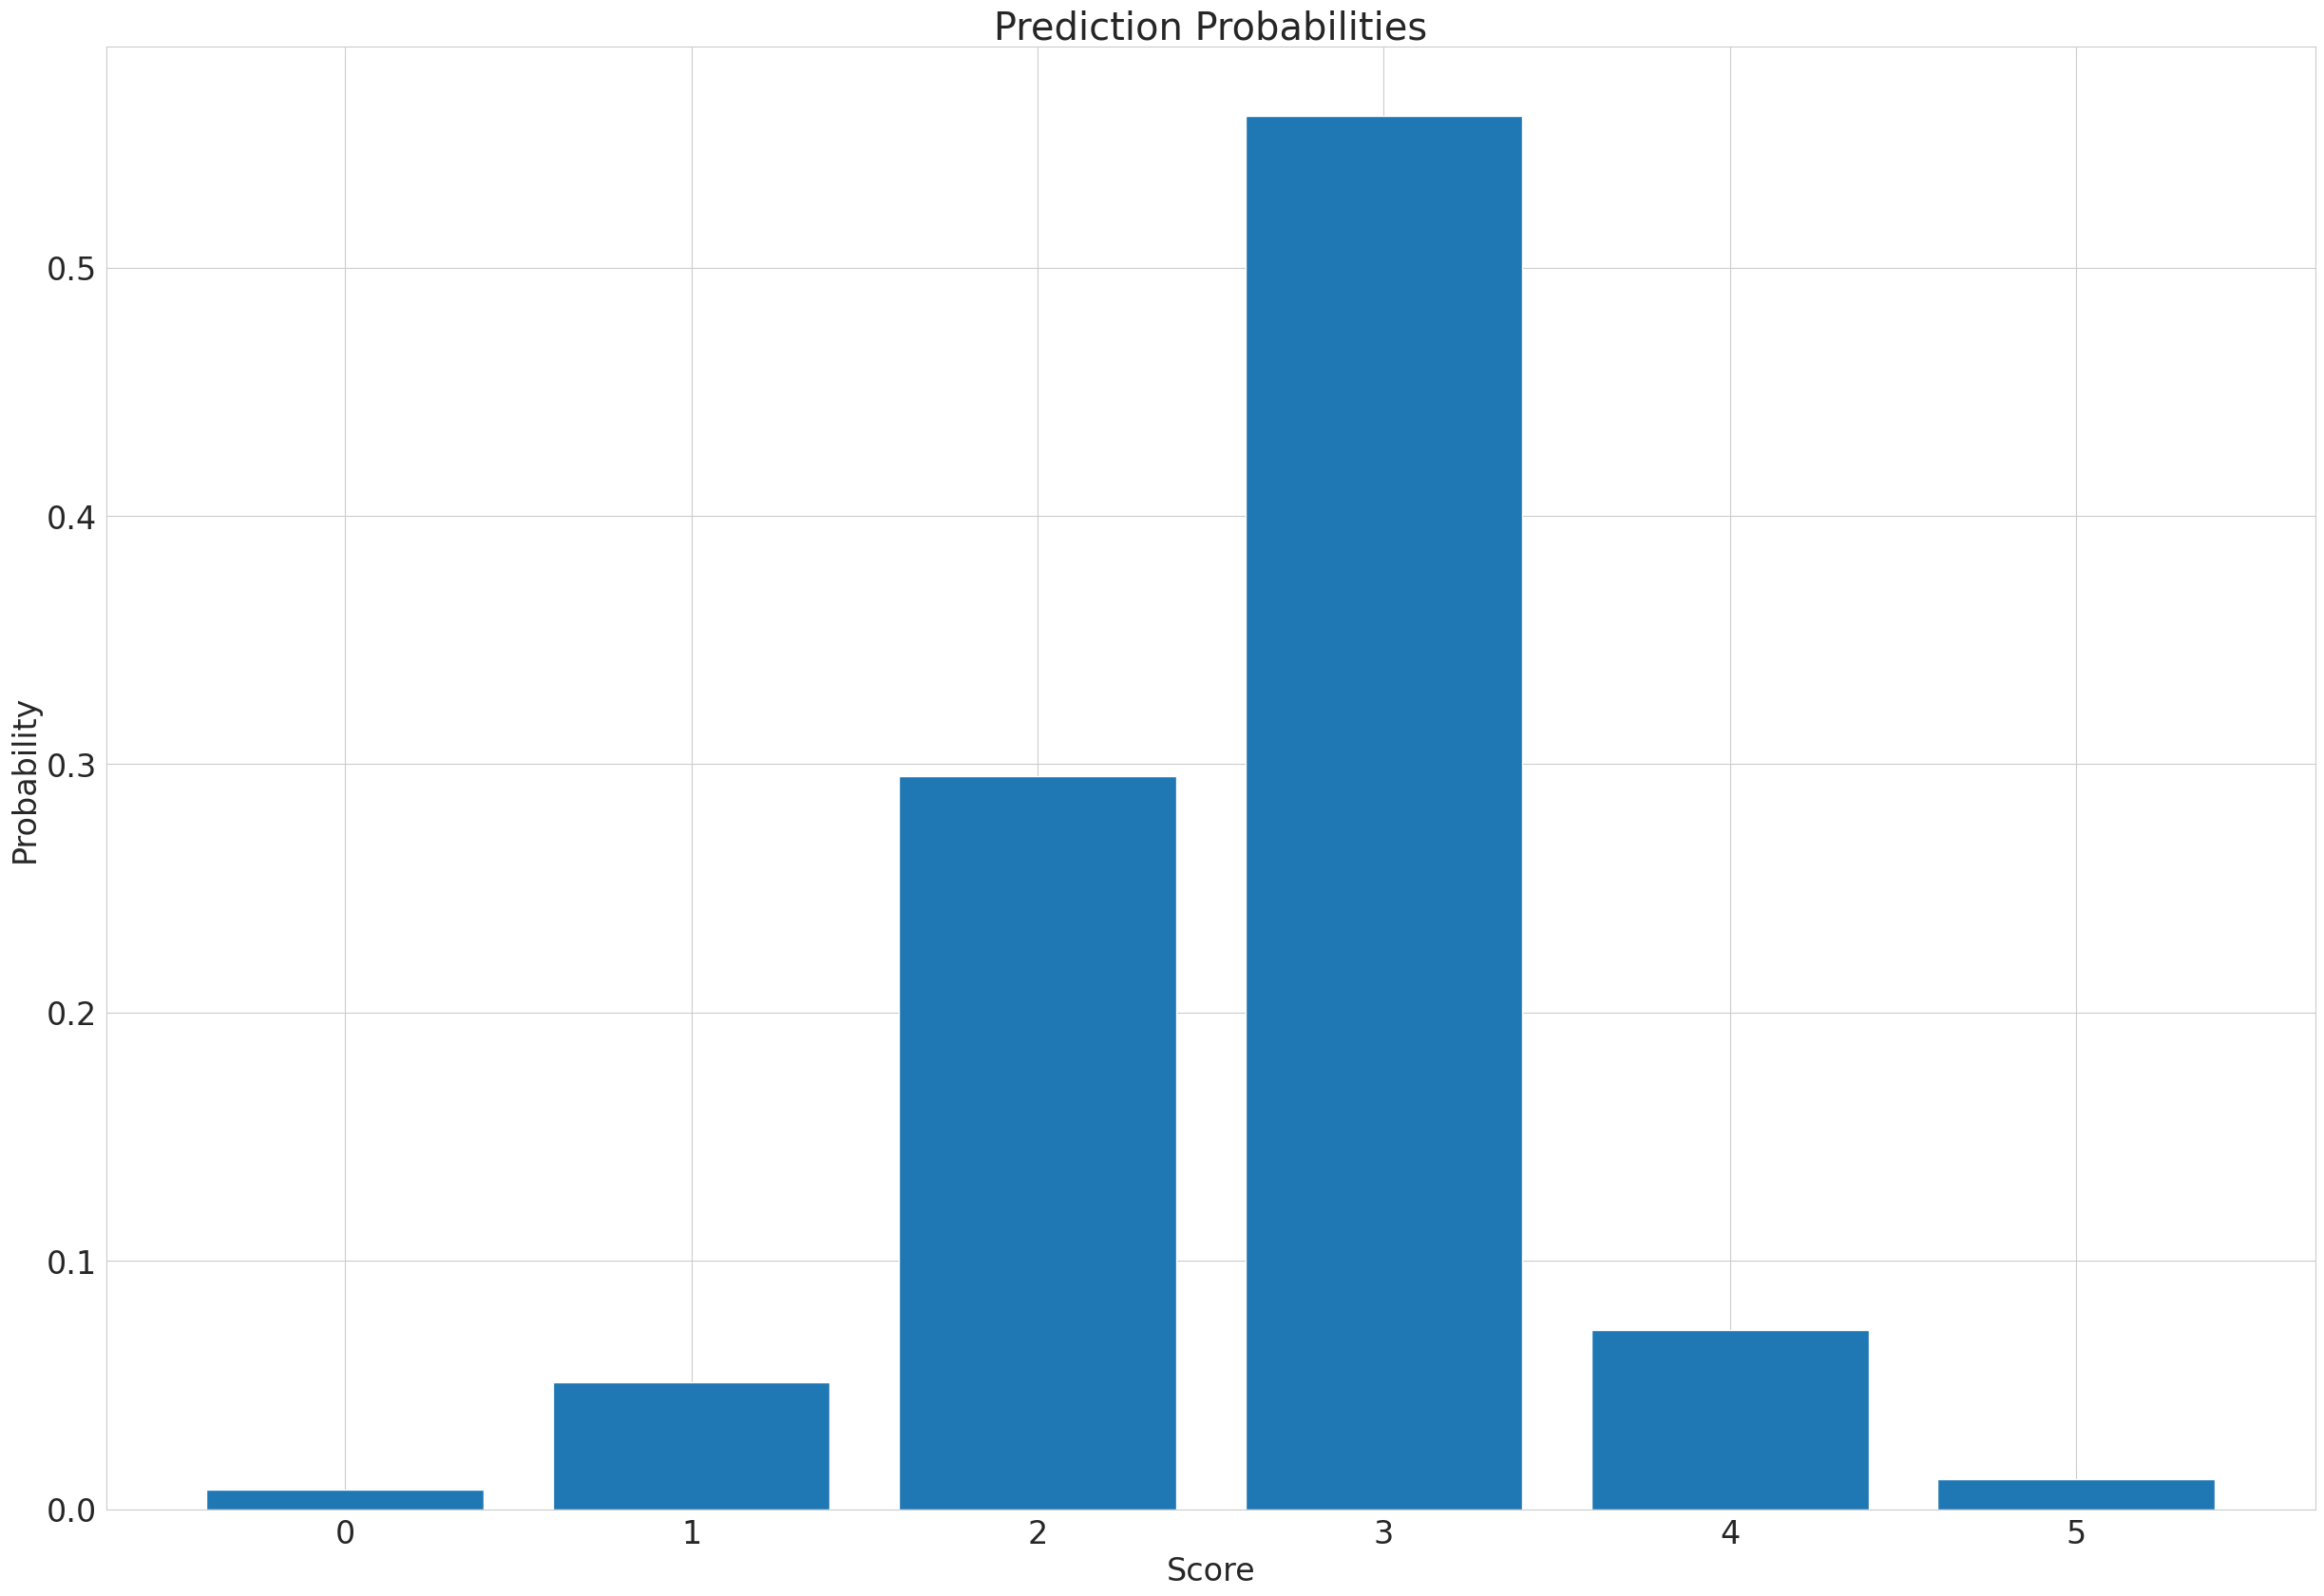

In [31]:
# Predict test - DO NOT RUN THIS CELL
prediction = plot_probs(title,abstract,journal,ais,impf,authors, predictor)

## Anvil - client side
URL: https://wfbeckvfgv7d3sjj.anvil.app/PMZRWEQ3OZVOJJFKOLTU5654

In [18]:
@anvil.server.callable
def predict_score(title,abstract,journal,ais,impf,authors):
    
  t = plot_probs(title,abstract,journal,ais,impf,authors, predictor)
  fig_media = anvil.BlobMedia(content_type='image/png',content=t)  

  return fig_media

In [19]:
# TODO - implement model AutoGluon - additional features from LLM (dataset m17_llm_features) 
@anvil.server.callable
def predict_score_llm(title,abstract): 

    t = plot_probs_llm(title, abstract, predictor_llm)
    f_media = anvil.BlobMedia(content_type = 'image/png',content = t)

    return f_media 

In [20]:
# TODO - implement model AutoGluon - additional features from LLM (dataset m17_llm_features) 
@anvil.server.callable
def predict_score_llm_meta(title, abstract): 

    t = plot_probs_llm_meta(title, abstract, predictor_llm)
    f_media = anvil.BlobMedia(content_type = 'image/png',content = t)

    return f_media 

In [21]:
@anvil.server.callable
def predict_score_llm_ollama(title, abstract): 

    t = plot_probs_llm_ollama(title, abstract, predictor_llm)
    f_media = anvil.BlobMedia(content_type = 'image/png',content = t)

    return f_media 

In [22]:
# TODO - generate features - vypsat do client side
@anvil.server.callable
def gen_feats(title, abstract):
        
    data = {
        "title": title,
        "abstract": abstract
    }
    
    df = pd.DataFrame([data])

    
    for i, row in df.iterrows():

        reasoning = generate_output(row['title'],row["abstract"])
        rigor = generate_rigor(row['title'],row["abstract"])
        novelty = generate_novelty(row['title'],row["abstract"])
        replicability = generate_replicability(row['title'],row["abstract"])
        accessibility = generate_accessibility(row['title'],row["abstract"])
        grammar = generate_grammar(row['title'],row["abstract"])

        features = {
            'reasoning': reasoning,
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        
    return features
    

In [23]:
# TODO - generate features - vypsat do client side - META REPLICATE
@anvil.server.callable
def gen_feats_meta(abstract):
        
    data = {
        "abstract": abstract
    }
    
    df = pd.DataFrame([data])

    
    for i, row in df.iterrows():

        reasoning = generate_output_meta(row["abstract"])
        rigor = generate_rigor_meta(row["abstract"])
        novelty = generate_novelty_meta(row["abstract"])
        replicability = generate_replicability_meta(row["abstract"])
        accessibility = generate_accessibility_meta(row["abstract"])
        grammar = generate_grammar_meta(row["abstract"])

        features = {
            'reasoning': reasoning,
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        
    return features
    

In [24]:
# TODO - generate features - vypsat do client side - META REPLICATE
@anvil.server.callable
def gen_feats_ollama(abstract):
        
    data = {
        "abstract": abstract
    }
    
    df = pd.DataFrame([data])

    
    for i, row in df.iterrows():

        reasoning = generate_output_ollama(row["abstract"])
        rigor = generate_rigor_ollama(row["abstract"])
        novelty = generate_novelty_ollama(row["abstract"])
        replicability = generate_replicability_ollama(row["abstract"])
        accessibility = generate_accessibility_ollama(row["abstract"])
        grammar = generate_grammar_ollama(row["abstract"])

        features = {
            'reasoning': reasoning,
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        
    return features
    

In [25]:
@anvil.server.callable
def validate_abstract_title(title, abstract):

    data = {
        "title": title,
        "abstract": abstract
    }
    
    df = pd.DataFrame([data])


    
    for i, row in df.iterrows():
        valid = evaluate_abstract_title(title, abstract)

    return valid

In [ ]:
anvil.server.wait_forever()

In [29]:
# skript pro predikci validačního setu
def get_probs_llm_meta_valid(title, abstract, predictor):
    # Příprava vstupních dat
    data = {
        "title": title,
        "abstract": abstract
    }
    df = pd.DataFrame([data])

    res = []

    # Generování features pro model
    for i, row in df.iterrows():
        rigor = generate_rigor_meta(row["abstract"])
        novelty = generate_novelty_meta(row["abstract"])
        replicability = generate_replicability_meta(row["abstract"])
        accessibility = generate_accessibility_meta(row["abstract"])
        grammar = generate_grammar_meta(row["abstract"])

        features = {
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        res.append(features)

    # Spojení původních dat s features
    features_df = pd.DataFrame(res)
    result_df = pd.concat([df, features_df], axis=1)

    # Predikce pravděpodobností modelu
    prediction = predictor.predict_proba(result_df)
    probs = prediction.values.flatten().tolist()
    probs = [round(prob, 3) for prob in probs]

    # Přiřazení pravděpodobností ke třídám
    class_names = ["1", "2", "3", "4", "5"]
    probs_dict = dict(zip(class_names, probs))

    return probs_dict


In [253]:
valid_df = pd.read_csv("M1-H19-H23.csv", sep=";", encoding="utf-8-sig")
#print(valid_df.head())
valid_df.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3


In [20]:
#test
test_df = valid_df.head(8)
test_df.head(8)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3
5,"BUUS, Tomáš. Energy efficiency and energy pric...",Energy efficiency and energy prices: A general...,0360-5442,NaN,2017,4.968 - 0.951,20300 (Q1 D1) - 20700 (Q1 ),1.990,10100 (Q1 D1) - 10500 (Q1 D1) - 10700 (Q1 D1) ...,50206,50200,H19,Mankind's prosperity has been dependent on ava...,3
6,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,50200,H21,"Since many key career events, such as exams an...",1
7,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,50200,H19,Individual decisions are often made simultaneo...,3


In [32]:
znamky_1 = []
znamky_2 = []
probs_1 = []

for row in valid_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")

    probs = get_probs_llm_meta_valid(title, abstract, predictor_llm)

    sorted_probs = sorted(probs.items(), key=lambda x: x[1], reverse=True)

    best_grade, best_prob = sorted_probs[0]
    znamky_1.append(best_grade)
    probs_1.append(best_prob)

    second_best_grade = sorted_probs[1][0]
    znamky_2.append(second_best_grade)
    
valid_df = valid_df.copy()
valid_df["Predikovana_znamka_1"] = znamky_1
valid_df["Predikovana_znamka_2"] = znamky_2
valid_df["Pravdepodobnost_znamky_1"] = probs_1
valid_df.head(3)
valid_df.to_csv("valid_df_pred_two_prob.csv", index=False, encoding="utf-8-sig")

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,Predikovana_znamka_1,Predikovana_znamka_2,Pravdepodobnost_znamky_1
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,3,1,0.612
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,1,3,0.420
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,3,2,0.749


In [34]:
valid_df_pred_two_probs = pd.read_csv('valid_df_pred_two_prob.csv')
valid_df_pred_two_probs.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,Predikovana_znamka_1,Predikovana_znamka_2,Pravdepodobnost_znamky_1
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,3,1,0.612
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,1,3,0.420
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,3,2,0.749
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2,2,3,0.412
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3,5,2,0.649


In [31]:
valid_df_pred_two_probs = pd.read_csv('valid_df_pred_two_prob.csv')
for idx, row in valid_df_pred_two_probs.iterrows():
    score_mark = getattr(row, "Znamka")
    first_pred = getattr(row, "Predikovana_znamka_1")
    second_pred = getattr(row, "Predikovana_znamka_2")
    if (first_pred != score_mark) & (second_pred ==score_mark):
        valid_df_pred_two_probs.at[idx, "Predikovana_znamka_1"] = second_pred

valid_df_pred_two_probs.to_csv("valid_df_pred_two_prob_updated.csv", index=False, encoding="utf-8-sig")

In [33]:
valid_df_pred_two_probs_updated = pd.read_csv('valid_df_pred_two_prob_updated.csv')
valid_df_pred_two_probs_updated.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,Predikovana_znamka_1,Predikovana_znamka_2,Pravdepodobnost_znamky_1
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,3,1,0.612
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,1,3,0.420
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,3,2,0.749
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2,2,3,0.412
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3,5,2,0.649


In [35]:
valid_df_pred_two_probs_updated = pd.read_csv('valid_df_pred_two_prob_updated.csv')
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(valid_df_pred_two_probs_updated["Znamka"], valid_df_pred_two_probs_updated["Predikovana_znamka_1"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 41.67%


In [35]:
valid_df_pred = pd.read_csv('valid_df_pred.csv')
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(valid_df_pred["Znamka"], valid_df_pred["Predikovana_znamka"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 16.67%


In [41]:
valid_df_pred_two_probs = pd.read_csv('valid_df_pred_two_prob.csv')
filtered_df = valid_df_pred_two_probs[valid_df_pred_two_probs['Predikovana_znamka_1'] == 1]
filtered_df = filtered_df.sort_values(by='Pravdepodobnost_znamky_1', ascending = False)
filtered_df.head(12)


,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,Predikovana_znamka_1,Predikovana_znamka_2,Pravdepodobnost_znamky_1
11,"FILIP, Ondřej, JANDA, Karel, KRIŠTOUFEK, Ladis...",Dynamics and evolution of the role of biofuels...,NaN,2058-7546,2016,0.000 - 0.000,20500 (Q4 (n/a) ) - 20700 (Q4 (n/a) ),17.497,NaN,50206,50200,H19,Biofuels form part of a complex system compris...,2,1,2,0.993
26,"LYÓCSA, Štefan, MOLNÁR, Peter, VÝROST, Tomáš. ...",Stock market volatility forecasting: Do we nee...,0169-2070,NaN,2021,7.022 - 1.738,50200 (Q1 ),1.990,50200 (Q1 D1),50206,50200,H22,The general consensus in the volatility foreca...,2,1,2,0.770
16,"HOUDEK, Petr, BAHNÍK, Štěpán, HUDÍK, Marek, VR...",Selection effects on dishonest behavior,NaN,1930-2975,2021,2.500 - 1.493,50100 (Q1 ),0.983,50100 (Q1 ) - 50200 (Q1 D2),50204,50200,H22,"In many situations people behave ethically, wh...",3,1,2,0.727
9,"DVOULETÝ, Ondřej, SRHOJ, Stjepan, PANTEA, Smar...",Public SME grants and firm performance in Euro...,0921-898X,1573-0913,2021,7.096 - 1.601,50200 (Q1 ),2.630,50200 (Q1 D1),50204,50200,H22,Governments allocate financial resources to su...,3,1,4,0.686
29,"PIHA, Samuel, POHJANHEIMO, Terhi, LÄHTEENMÄKI-...",The effects of consumer knowledge on the willi...,0950-3293,NaN,2018,3.684 - 0.827,21100 (Q1 D2) - 40500 (Q1 D2),1.140,10600 (Q1 ) - 21100 (Q1 D1) - 30300 (Q1 D2) - ...,50202,50200,H22,This exploratory study investigates how consum...,2,1,3,0.676
13,"FÜRNKRANZ, Johannes, KLIEGR, Tomáš, PAULHEIM, ...",On cognitive preferences and the plausibility ...,0885-6125,1573-0565,2020,2.940 - 1.202,10200 (Q1 D2),0.667,10200 (Q2 ),10201,10200,H22,It is conventional wisdom in machine learning ...,1,1,2,0.653
22,"KUBÍČEK, Aleš, MACHEK, Ondřej. Intrafamily Con...",Intrafamily Conflicts in Family Businesses: A ...,0894-4865,1741-6248,2020,9.848 - 2.372,50200 (Q1 D2),2.947,50200 (Q1 D1),50204,50200,H21,"Through a systematic literature review, we ass...",2,1,3,0.609
8,"ČERNÝ, Michal. Narrow big data in a stream: Co...",Narrow big data in a stream: Computational lim...,0020-0255,NaN,2019,5.910 - 1.142,10200 (Q1 D2),1.723,10200 (Q1 D1) - 20200 (Q1 D1) - 50200 (Q1 D1),10103,10100,H20,We consider the on-line model for a data strea...,2,1,4,0.518
19,"JANDA, Karel, KRIŠTOUFEK, Ladislav. The Relati...","The Relationship Between Fuel, Biofuel and Foo...",1941-1340,1941-1359,2019,2.745 - 1.798,40500 (Q1 D1) - 50200 (Q1 D2) - 50700 (Q1 D1),1.853,50200 (Q1 D1),50206,50200,H20,We assess the fuel-food price linkage models o...,3,1,4,0.513
31,"SKLENIČKA, Petr, ZOUHAR, Jan. Predicting the v...",Predicting the visual impact of onshore wind f...,0306-2619,NaN,2018,8.426 - 1.444,20400 (Q1 D1) - 20700 (Q1 D1),3.455,10500 (Q1 D1) - 20100 (Q1 D1) - 20300 (Q1 D1) ...,50703,50700,H19,Visual impact is one of the main factors influ...,2,1,5,0.443


In [44]:
valid_df_pred_two_probs = pd.read_csv('valid_df_pred_two_prob.csv')
filtered_df_second = valid_df_pred_two_probs[valid_df_pred_two_probs['Znamka'] == 1]
filtered_df_second = filtered_df_second.sort_values(by='Pravdepodobnost_znamky_1', ascending = False)
filtered_df_second.head(12)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,Predikovana_znamka_1,Predikovana_znamka_2,Pravdepodobnost_znamky_1
13,"FÜRNKRANZ, Johannes, KLIEGR, Tomáš, PAULHEIM, ...",On cognitive preferences and the plausibility ...,0885-6125,1573-0565,2020,2.940 - 1.202,10200 (Q1 D2),0.667,10200 (Q2 ),10201,10200,H22,It is conventional wisdom in machine learning ...,1,1,2,0.653
6,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,50200,H21,"Since many key career events, such as exams an...",1,2,5,0.522


In [31]:
# skript pro OLlama
def plot_probs_llm_ollama_valid(title, abstract, predictor):
    # Připrav vstupní data
    data = {"title": title, "abstract": abstract}
    df = pd.DataFrame([data])

    # Vygeneruj features přes Ollama
    res = []
    for _, row in df.iterrows():
        rigor = generate_rigor_ollama(row["abstract"])
        novelty = generate_novelty_ollama(row["abstract"])
        replicability = generate_replicability_ollama(row["abstract"])
        accessibility = generate_accessibility_ollama(row["abstract"])
        grammar = generate_grammar_ollama(row["abstract"])

        res.append({
            "novelty": novelty,
            "rigor": rigor,
            "grammar": grammar,
            "replicability": replicability,
            "accessibility": accessibility
        })

    features_df = pd.DataFrame(res)
    result_df = pd.concat([df, features_df], axis=1)

    # Predikce pravděpodobností modelu
    prediction = predictor.predict_proba(result_df)
    probs = prediction.values.flatten().tolist()
    probs = [round(p, 3) for p in probs]

    # Přiřazení pravděpodobností ke třídám
    class_names = ["1", "2", "3", "4", "5"]
    probs_dict = dict(zip(class_names, probs))

    return probs_dict


In [36]:
#cyklus pro predikci z validačního setu pro Ollama
znamky = []
for row in test_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")

    probs = plot_probs_llm_ollama_valid(title, abstract, predictor_llm) 

    best_grade = max(probs, key=probs.get)      
    znamky.append(best_grade)
test_df = test_df.copy()
test_df["Predikovana_znamka"] = znamky 
test_df.head(3)
test_df.to_csv("valid_df_pred_Ollama_short.csv", index=False, encoding="utf-8-sig")

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,Predikovana_znamka
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,1
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,3


In [32]:
client = OllamaClient(host="https://llm.vse.cz/ollama")
models = client.list().get("models", [])
names = [m.get("name") or m.get("model") for m in models]
print(names)

['llava:34b-v1.6-q8_0', 'llava:34b', 'llama-3.3-70b-instruct:q4', 'deepseek-r1-distill-llama-70b:q4', 'llama-3.3:70b-q4_k_m', 'deepseek-r1:70b-q4_k_m']


In [15]:
import pandas as pd

# Funkce pro generování features
def get_feature_gene_llm_meta(title, abstract, predictor):
    features = {
        "novelty": generate_novelty_meta(abstract),
        "rigor": generate_rigor_meta(abstract),
        "grammar": generate_grammar_meta(abstract),
        "replicability": generate_replicability_meta(abstract),
        "accessibility": generate_accessibility_meta(abstract)
    }

    return pd.DataFrame([{
        "Nazev": title,
        "Abstrakt": abstract,
        **features
    }])

# Seznam pro uložení výsledků
results = []

# Iterace přes test_df a generování features
for row in test_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")
    result_df = get_feature_gene_llm_meta(title, abstract, predictor_llm)
    results.append(result_df)

# Sloučení všech výsledků do jednoho DataFrame
features_df = pd.concat(results, ignore_index=True)

# Sloučení features zpět do původního test_df
test_df = test_df.merge(features_df, on=["Nazev", "Abstrakt"], how="left")

# Kontrola výsledku
print(test_df.head())


                                              Citace  \
0  BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...   
1  BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...   
2  BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...   
3  BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....   
4  BOROVIČKA, Adam. New approach for estimation o...   

                                               Nazev       ISSN      eISSN  \
0  Variations on anchoring: Sequential anchoring ...        NaN  1930-2975   
1  If It's Difficult to Pronounce, It Might Not B...  0956-7976        NaN   
2    Filter-generating system of Zernike polynomials  0005-1098        NaN   
3  Modeling a shared hierarchical structure in da...  0957-4174        NaN   
4  New approach for estimation of criteria weight...  0957-4174        NaN   

    Rok       IF - AIS                                        Q-AIS    SJR  \
0  2019  2.163 - 1.303                                50100 (Q1 D2)  1.499   
1  2017  6.128 - 3.430                

In [17]:
test_df.head(8)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,novelty,rigor,grammar,replicability,accessibility
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,medium,high,0,1,medium
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,medium,high,0,1,medium
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,high,high,0,0,low
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2,medium,high,0,0,medium
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3,medium,high,0,0,medium
5,"BUUS, Tomáš. Energy efficiency and energy pric...",Energy efficiency and energy prices: A general...,0360-5442,NaN,2017,4.968 - 0.951,20300 (Q1 D1) - 20700 (Q1 ),1.990,10100 (Q1 D1) - 10500 (Q1 D1) - 10700 (Q1 D1) ...,50206,50200,H19,Mankind's prosperity has been dependent on ava...,3,high,high,0,0,medium
6,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,50200,H21,"Since many key career events, such as exams an...",1,medium,high,0,0,medium
7,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,50200,H19,Individual decisions are often made simultaneo...,3,medium,high,0,0,medium


In [ ]:
################################################### CHAT GPT ##################################################################

In [37]:
%pip install --upgrade openai

  Using cached openai-1.107.0-py3-none-any.whl.metadata (29 kB)
  Using cached jiter-0.10.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)
Using cached openai-1.107.0-py3-none-any.whl (950 kB)
Using cached jiter-0.10.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (353 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [openai]2m2/3 [openai]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from openai import OpenAI
import json
client = OpenAI(api_key="")
models = client.models.list()

for m in models.data:
    print(m.id)

gpt-4-0613
gpt-4
gpt-3.5-turbo
gpt-5-codex
gpt-audio-2025-08-28
gpt-realtime
gpt-realtime-2025-08-28
gpt-audio
davinci-002
babbage-002
gpt-3.5-turbo-instruct
gpt-3.5-turbo-instruct-0914
dall-e-3
dall-e-2
gpt-4-1106-preview
gpt-3.5-turbo-1106
tts-1-hd
tts-1-1106
tts-1-hd-1106
text-embedding-3-small
text-embedding-3-large
gpt-4-0125-preview
gpt-4-turbo-preview
gpt-3.5-turbo-0125
gpt-4-turbo
gpt-4-turbo-2024-04-09
gpt-4o
gpt-4o-2024-05-13
gpt-4o-mini-2024-07-18
gpt-4o-mini
gpt-4o-2024-08-06
chatgpt-4o-latest
o1-mini-2024-09-12
o1-mini
gpt-4o-realtime-preview-2024-10-01
gpt-4o-audio-preview-2024-10-01
gpt-4o-audio-preview
gpt-4o-realtime-preview
omni-moderation-latest
omni-moderation-2024-09-26
gpt-4o-realtime-preview-2024-12-17
gpt-4o-audio-preview-2024-12-17
gpt-4o-mini-realtime-preview-2024-12-17
gpt-4o-mini-audio-preview-2024-12-17
o1-2024-12-17
o1
gpt-4o-mini-realtime-preview
gpt-4o-mini-audio-preview
o3-mini
o3-mini-2025-01-31
gpt-4o-2024-11-20
gpt-4o-search-preview-2025-03-11
gpt-4o

In [20]:
def generate_rigor_chatgpt(abstract):
    response = client.chat.completions.create(
        model="gpt-4o-mini",  
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a categorization assistant. "
                    "Your job will be to assign a certain characteristic to a research paper based on its abstract. "
                    "In this instance you will decide the rigor of the research based on the abstract. "
                    "Methodological rigor represents the soundness of logic presented in the "
                    "article abstract by its authors. "
                    "You will choose between three levels of rigor: low, medium, and high. "
                    "Low being the least rigorous and high being the most. "
                    "Be concise, do not provide any explanations. "
                    "Your answer must be in JSON format, for example:\n\n"
                    "{\n    \"rigor\": \"value\"\n}"
                ),
            },
            {
                "role": "user",
                "content": f"Abstract to be evaluated:\n\n{abstract}",
            },
        ],)
    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        rigor = data.get("rigor", "").strip().lower()
    except json.JSONDecodeError:
        rigor = ""
    return rigor 

In [21]:
def generate_novelty_chatgpt(abstract):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a categorization assistant. "
                    "Your job will be to assign a certain characteristic to a research paper based on its abstract. "
                    "In this instance you will decide the novelty of the research and its findings based on the abstract. "
                    "Novelty is a metric of how innovative the research presented is and how much it is new to the landscape of scientific research. "
                    "You will choose between three levels of novelty: low, medium and high. "
                    "Low being the least innovative and high being the most. "
                    "Be concise, do not provide any explanations. "
                    "Your answer must be in JSON format, for example:\n\n"
                    "{\n    \"novelty\": \"value\"\n}"
                ),
            },
            {
                "role": "user",
                "content": f"Abstract to be evaluated:\n\n{abstract}",
            },
        ],
    )

    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        novelty = data.get("novelty", "").strip().lower()
    except json.JSONDecodeError:
        novelty = ""

    return novelty


In [22]:
def generate_replicability_chatgpt(abstract):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a categorization assistant. "
                    "Your job will be to assign a certain characteristic to a research paper based on its abstract. "
                    "In this instance you will assess whether the abstract mentions reproducibility of results. "
                    "You will choose between two values in your reply: \"0\" or \"1\". "
                    "\"0\" meaning zero mentions of reproducibility, \"1\" meaning authors have addressed reproducibility of their research. "
                    "Be concise, do not provide any explanations. "
                    "Your answer must be in JSON format, for example:\n\n"
                    "{\n    \"replicability\": \"value\"\n}"
                ),
            },
            {
                "role": "user",
                "content": f"Abstract to be evaluated:\n\n{abstract}",
            },
        ],
    )

    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        replicability = data.get("replicability", "").strip()
    except json.JSONDecodeError:
        replicability = ""

    return replicability


In [23]:
def generate_accessibility_chatgpt(abstract):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a categorization assistant. "
                    "Your job will be to assign a certain characteristic to a research paper based on its abstract. "
                    "In this instance, you will assess the accessibility of the research. "
                    "Accessibility is a metric of readability and understandability of the language used. "
                    "Abstracts that do not use overly complicated language and explain clearly what the paper is about "
                    "should be marked as more accessible. "
                    "You will choose between three levels of accessibility: low, medium, and high. "
                    "Low being the least understandable and high being the most. "
                    "Be concise, do not provide any explanations. "
                    "Your answer must be in JSON format, for example:\n\n"
                    "{\n    \"accessibility\": \"value\"\n}"
                ),
            },
            {
                "role": "user",
                "content": f"Abstract to be evaluated:\n\n{abstract}",
            },
        ],
    )

    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        accessibility = data.get("accessibility", "").strip().lower()
    except json.JSONDecodeError:
        accessibility = ""

    return accessibility


In [24]:
def generate_grammar_chatgpt(abstract):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a categorization assistant. "
                    "Your job is to assign a certain characteristic to a research paper based on its abstract. "
                    "In this instance, you will assess whether the abstract contains grammatical errors. "
                    "All abstracts are written in English (either British or American). "
                    "You will choose between two values in your reply: \"0\" or \"1\". "
                    "\"0\" means the abstract is free of grammatical errors, and \"1\" means the abstract contains grammatical mistakes. "
                    "Be concise, do not provide any explanations. "
                    "Your answer must be in JSON format, for example:\n\n"
                    "{\n    \"grammar\": \"value\"\n}"
                ),
            },
            {
                "role": "user",
                "content": f"Abstract to be evaluated:\n\n{abstract}",
            },
        ],
    )

    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        grammar = data.get("grammar", "").strip()
    except json.JSONDecodeError:
        grammar = ""

    return grammar


In [27]:
import pandas as pd

# Funkce pro generování features
def get_feature_gene_llm_chatgpt(title, abstract, predictor):
    features = {
        "novelty": generate_novelty_chatgpt(abstract),
        "rigor": generate_rigor_chatgpt(abstract),
        "grammar": generate_grammar_chatgpt(abstract),
        "replicability": generate_replicability_chatgpt(abstract),
        "accessibility": generate_accessibility_chatgpt(abstract)
    }

    return pd.DataFrame([{
        "Nazev": title,
        "Abstrakt": abstract,
        **features
    }])

# Seznam pro uložení výsledků
results = []

# Iterace přes test_df a generování features
for row in test_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")
    result_df = get_feature_gene_llm_chatgpt(title, abstract, predictor_llm)
    results.append(result_df)

# Sloučení všech výsledků do jednoho DataFrame
features_df = pd.concat(results, ignore_index=True)

# Sloučení features zpět do původního test_df
test_df = test_df.merge(features_df, on=["Nazev", "Abstrakt"], how="left")

# Kontrola výsledku
print(test_df.head())


                                              Citace  \
0  BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...   
1  BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...   
2  BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...   
3  BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....   
4  BOROVIČKA, Adam. New approach for estimation o...   

                                               Nazev       ISSN      eISSN  \
0  Variations on anchoring: Sequential anchoring ...        NaN  1930-2975   
1  If It's Difficult to Pronounce, It Might Not B...  0956-7976        NaN   
2    Filter-generating system of Zernike polynomials  0005-1098        NaN   
3  Modeling a shared hierarchical structure in da...  0957-4174        NaN   
4  New approach for estimation of criteria weight...  0957-4174        NaN   

    Rok       IF - AIS                                        Q-AIS    SJR  \
0  2019  2.163 - 1.303                                50100 (Q1 D2)  1.499   
1  2017  6.128 - 3.430                

In [28]:
test_df.head(8)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,novelty,rigor,grammar,replicability,accessibility
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,medium,high,0,1,medium
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,medium,high,0,1,medium
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,high,high,1,0,low
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2,medium,high,0,0,medium
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3,medium,high,0,0,medium
5,"BUUS, Tomáš. Energy efficiency and energy pric...",Energy efficiency and energy prices: A general...,0360-5442,NaN,2017,4.968 - 0.951,20300 (Q1 D1) - 20700 (Q1 ),1.990,10100 (Q1 D1) - 10500 (Q1 D1) - 10700 (Q1 D1) ...,50206,50200,H19,Mankind's prosperity has been dependent on ava...,3,high,medium,0,0,medium
6,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,50200,H21,"Since many key career events, such as exams an...",1,medium,high,0,0,medium
7,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,50200,H19,Individual decisions are often made simultaneo...,3,medium,high,1,0,medium


In [ ]:
# skripty pro predikci dle features od CHATGPT !!!

In [17]:
# skript pro predikci validačního setu
def get_probs_chatgpt_valid(title, abstract, predictor):
    # Příprava vstupních dat
    data = {
        "title": title,
        "abstract": abstract
    }
    df = pd.DataFrame([data])

    res = []

    # Generování features pro model
    for i, row in df.iterrows():
        rigor = generate_rigor_chatgpt(row["abstract"])
        novelty = generate_novelty_chatgpt(row["abstract"])
        replicability = generate_replicability_chatgpt(row["abstract"])
        accessibility = generate_accessibility_chatgpt(row["abstract"])
        grammar = generate_grammar_chatgpt(row["abstract"])

        features = {
            'novelty': novelty,
            'rigor': rigor,
            'grammar': grammar,
            'replicability': replicability,
            'accessibility': accessibility
        }
        res.append(features)

    # Spojení původních dat s features
    features_df = pd.DataFrame(res)
    result_df = pd.concat([df, features_df], axis=1)

    # Predikce pravděpodobností modelu
    prediction = predictor.predict_proba(result_df)
    probs = prediction.values.flatten().tolist()
    probs = [round(prob, 3) for prob in probs]

    # Přiřazení pravděpodobností ke třídám
    class_names = ["1", "2", "3", "4", "5"]
    probs_dict = dict(zip(class_names, probs))

    return probs_dict


In [18]:
znamky_1 = []
znamky_2 = []
probs_1 = []

for row in valid_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")

    probs = get_probs_chatgpt_valid(title, abstract, predictor_llm)

    sorted_probs = sorted(probs.items(), key=lambda x: x[1], reverse=True)

    best_grade, best_prob = sorted_probs[0]
    znamky_1.append(best_grade)
    probs_1.append(best_prob)

    second_best_grade = sorted_probs[1][0]
    znamky_2.append(second_best_grade)
    
valid_df = valid_df.copy()
valid_df["Predikovana_znamka_1"] = znamky_1
valid_df["Predikovana_znamka_2"] = znamky_2
valid_df["Pravdepodobnost_znamky_1"] = probs_1
valid_df.head(3)
valid_df.to_csv("valid_df_pred_two_prob_chatgpt.csv", index=False, encoding="utf-8-sig")

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,Predikovana_znamka_1,Predikovana_znamka_2,Pravdepodobnost_znamky_1
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,3,1,0.612
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,1,3,0.420
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,3,2,0.749


In [19]:
from sklearn.metrics import accuracy_score
valid_df_pred_two_probs_chatgpt = pd.read_csv('valid_df_pred_two_prob_chatgpt.csv')
accuracy = accuracy_score(valid_df_pred_two_probs_chatgpt["Znamka"], valid_df_pred_two_probs_chatgpt["Predikovana_znamka_1"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 16.67%


In [20]:
valid_df_pred_two_probs_chatgpt = pd.read_csv('valid_df_pred_two_prob_chatgpt.csv')
for idx, row in valid_df_pred_two_probs_chatgpt.iterrows():
    score_mark = getattr(row, "Znamka")
    first_pred = getattr(row, "Predikovana_znamka_1")
    second_pred = getattr(row, "Predikovana_znamka_2")
    if (first_pred != score_mark) & (second_pred ==score_mark):
        valid_df_pred_two_probs_chatgpt.at[idx, "Predikovana_znamka_1"] = second_pred

valid_df_pred_two_probs_chatgpt.to_csv("valid_df_pred_two_prob_chatgpt_updated.csv", index=False, encoding="utf-8-sig")

In [21]:
from sklearn.metrics import accuracy_score
valid_df_pred_two_probs_chatgpt = pd.read_csv('valid_df_pred_two_prob_chatgpt_updated.csv')
accuracy = accuracy_score(valid_df_pred_two_probs_chatgpt["Znamka"], valid_df_pred_two_probs_chatgpt["Predikovana_znamka_1"])

print(f"Přesnost modelu: {accuracy:.8%}")

Přesnost modelu: 41.66666667%


In [ ]:
# generování hodnocení přímo za pomocí LLM - chatgpt  #########################################################################################


In [31]:
def generate_score_chatgpt(name, abstract):
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages = [
            {
                "role": "system",
                "content": (
                    "Your job is to assign a score to a research paper based on its title and abstract. "
                    "The score must follow the Czech M17+ methodology for research assessment. "
                    "You must choose one value from \"1\", \"2\", \"3\", \"4\", \"5\" or \"6\". "
                    "\"1\" = Excellent (internationally leading research), "
                    "\"2\" = Very good, "
                    "\"3\" = Good, "
                    "\"4\" = Satisfactory, "
                    "\"5\" = Insufficient, "
                    "\"6\" = Unacceptable (lowest quality). "
                    "Base your judgment only on the provided title and abstract. "
                    "Be concise, do not provide any explanations. "
                    "Your answer must be in JSON format, for example:\n\n"
                    "{\n    \"score\": \"value\"\n}"
                ),
            },
            {
                "role": "user",
                "content": f"Title: {name}\n\nAbstract: {abstract}",
            }
        ]
    )
    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        score = data.get("score", "").strip()
    except json.JSONDecodeError:
        score = ""

    return score

In [32]:
scores = []
for row in valid_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")
    score_from_gpt = generate_score_chatgpt(title, abstract)
    scores.append(score_from_gpt)

valid_df = valid_df.copy()
valid_df["GPT_score"] = scores
valid_df.to_csv("valid_df_pred_by_chatgpt.csv", index=False, encoding="utf-8-sig")
valid_df.head(8)    

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,GPT_score
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,2
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2,2
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3,3
5,"BUUS, Tomáš. Energy efficiency and energy pric...",Energy efficiency and energy prices: A general...,0360-5442,NaN,2017,4.968 - 0.951,20300 (Q1 D1) - 20700 (Q1 ),1.990,10100 (Q1 D1) - 10500 (Q1 D1) - 10700 (Q1 D1) ...,50206,50200,H19,Mankind's prosperity has been dependent on ava...,3,3
6,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,50200,H21,"Since many key career events, such as exams an...",1,2
7,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,50200,H19,Individual decisions are often made simultaneo...,3,2


In [33]:
from sklearn.metrics import accuracy_score
valid_df_pred_by_chatgpt = pd.read_csv('valid_df_pred_by_chatgpt.csv')
accuracy = accuracy_score(valid_df_pred_by_chatgpt["Znamka"], valid_df_pred_by_chatgpt["GPT_score"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 52.78%


In [8]:
def get_list_of_similar_according_to_grades(name, df):
    df_filtered = df[df["Nazev"] != name]
    top_grades = {}
    for row in df_filtered.itertuples(index=False):
        title = getattr(row, "Nazev")
        raw = getattr(row, "Znamka")
        try:
            score = int(raw)
        except (ValueError, TypeError):
            continue
        if score <= 3:
            top_grades[title] = score
    return top_grades

  

In [23]:
def get_similar_papers_by_name_chatgpt(name, title_to_grade: dict):
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "Your task is to select three research papers from the provided list of titles. "
                    "Each chosen paper must have a different grade: one with grade '1', one with '2', and one with '3'. "
                    "Each candidate line is formatted as '- <TITLE> | grade: <NUMBER>'. "
                    "Return only strict JSON:\n{\n  \"grade_1\": \"...\",\n  \"grade_2\": \"...\",\n  \"grade_3\": \"...\"\n}"
                ),
            },
            {
                "role": "user",
                "content": (
                    f"Target title: {name}\n\n"
                    f"Candidate titles with grades:\n"
                    + "\n".join(f"- {t} | grade: {g}" for t, g in title_to_grade.items())
                ),
            },
        ],
    )
    output = response.choices[0].message.content
    try:
        data = json.loads(output)
    except json.JSONDecodeError:
        data = {}
    return data


In [9]:
import json
import numpy as np

def _cosine_sim(a: np.ndarray, b: np.ndarray) -> float:
    na = np.linalg.norm(a)
    nb = np.linalg.norm(b)
    if na == 0.0 or nb == 0.0:
        return 0.0
    return float(np.dot(a, b) / (na * nb))

def _batch_embed_texts(client, texts, model="text-embedding-3-small", batch_size=96):
    """
    Vrátí list vektorů (np.array) ve stejném pořadí jako vstupní `texts`.
    """
    out = []
    for i in range(0, len(texts), batch_size):
        chunk = texts[i:i+batch_size]
        resp = client.embeddings.create(model=model, input=chunk)
        for item in resp.data:  # odpověď je ve stejném pořadí
            out.append(np.array(item.embedding, dtype=np.float32))
    return out

def get_similar_papers_by_name_embedding(
    name: str,
    title_to_grade: dict,
    df=None,
    client=None,
    embed_model: str = "text-embedding-3-small",
    meta_cols=("journal", "IF", "AIS", "category", "Vědní obor"),
):
    """
    Najde pro cílový článek `name` tři nejpodobnější kandidáty — každý s jinou známkou (1,2,3) —
    pomocí embeddingů (cosine similarity) z textu složeného z: Title | Abstract | (vybraná metadata).
    Vrací dict: {"grade_1": "...", "grade_2": "...", "grade_3": "..."}.
    """
    assert client is not None, "Musíte předat `client` (OpenAI klient)."

    def _safe_get(series, key, default=""):
        # bezpečné získání hodnoty + ošetření NaN/None
        try:
            val = series.get(key, default)
        except Exception:
            val = default
        if val is None:
            return ""
        # ošetřit NaN jen u číselných typů
        try:
            if isinstance(val, float) and np.isnan(val):
                return ""
        except Exception:
            pass
        return str(val)

    def _compose_text(title: str, row_series=None) -> str:
        """Složí text pro embedding: Title | Abstract | metadata (pokud jsou dostupná)."""
        parts = [str(title).strip()]
        if row_series is not None:
            if "Abstrakt" in row_series.index:
                parts.append(str(row_series["Abstrakt"] or "").strip())
            for col in meta_cols or ():
                if col in row_series.index:
                    parts.append(_safe_get(row_series, col))
        parts = [p for p in parts if p]
        return " | ".join(parts)

    # --- připrav text cíle ---
    target_row = None
    if df is not None and "Nazev" in df.columns:
        r = df[df["Nazev"] == name]
        if not r.empty:
            target_row = r.iloc[0]
    target_text = _compose_text(name, target_row)

    # --- připrav kandidáty ---
    candidates = []
    for t, g in title_to_grade.items():
        try:
            g_int = int(g)
        except Exception:
            continue
        if g_int not in (1, 2, 3):
            continue

        crow_series = None
        if df is not None and "Nazev" in df.columns:
            crow = df[df["Nazev"] == t]
            if not crow.empty:
                crow_series = crow.iloc[0]

        txt = _compose_text(t, crow_series)
        candidates.append({"title": str(t), "grade": g_int, "text": txt})

    if not candidates:
        return {}

    # --- embed target + kandidáty ---
    texts = [target_text] + [c["text"] for c in candidates]
    vecs = _batch_embed_texts(client, texts, model=embed_model)
    target_vec = vecs[0]
    cand_vecs = vecs[1:]

    # --- podobnosti ---
    sims = [_cosine_sim(target_vec, v) for v in cand_vecs]
    for c, s in zip(candidates, sims):
        c["sim"] = s

    # --- výběr top-1 pro každou známku 1,2,3 ---
    result = {}
    used_titles = set()
    for g in (1, 2, 3):
        pool = [c for c in candidates if c["grade"] == g and c["title"] not in used_titles]
        if not pool:
            continue
        best = max(pool, key=lambda x: x["sim"])
        result[f"grade_{g}"] = best["title"]
        used_titles.add(best["title"])

    return result


In [27]:
def generate_score_chatgpt_with_similar_papers(name, abstrakt, jr, IF, AIS, category, df):
    list_of_similar = get_list_of_similar_according_to_grades(name, df)
    #similar_papers = get_similar_papers_by_name_chatgpt(name, list_of_similar)
    similar_papers = get_similar_papers_by_name_embedding(
    name,
    list_of_similar,
    df=df,            
    client=client,    
    embed_model="text-embedding-3-small"  
    )

    abstracts_and_grades_of_similar_papers = {}
    for grade_key, title in similar_papers.items():
        row = df[df["Nazev"] == title]
        if not row.empty:
            record = {
                "Nazev": row.iloc[0]["Nazev"],
                "Abstrakt": row.iloc[0]["Abstrakt"],
                "Znamka": int(row.iloc[0]["Znamka"]),
                "Journal": row.iloc[0].get("journal", ""),
                "IF": row.iloc[0].get("IF", ""),
                "AIS": row.iloc[0].get("AIS", ""),
                "Category": row.iloc[0].get("category", ""),
            }
            abstracts_and_grades_of_similar_papers[grade_key] = record

    # složení calibration příkladů
    example_lines = []
    for grade_key, record in abstracts_and_grades_of_similar_papers.items():
        example_lines.append(
            f"- {grade_key} | Grade: {record['Znamka']}\n"
            f"  Title: {record['Nazev']}\n"
            f"  Abstract: {record['Abstrakt']}"
        )
    examples_block = "\n\n".join(example_lines) if example_lines else "No exemplars available."

    # dotaz na model
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "Your job is to assign a score to a research paper based on its title, abstract and metadata (journal, IF, AIS, category). "
                    "The score must follow the Czech M17+ methodology for research assessment. "
                    "Choose one value from \"1\", \"2\", \"3\", \"4\", \"5\" or \"6\". "
                    "\"1\" = Excellent (internationally leading research), "
                    "\"2\" = Very good, "
                    "\"3\" = Good, "
                    "\"4\" = Satisfactory, "
                    "\"5\" = Insufficient, "
                    "\"6\" = Unacceptable (lowest quality). "
                    "Base your judgment only on the provided TARGET paper's title, abstract, and metadata. "
                    "Use the example papers (with their abstracts and official grades) only as calibration guidance.\n\n"
                    "Return strict JSON only, exactly like:\n{\n  \"score\": \"value\"\n}"
                ),
            },
            {
                "role": "user",
                "content": (
                    f"TARGET Title: {name}\n"
                    f"TARGET Abstract: {abstrakt}\n\n"
                    f"TARGET Journal: {jr}\n\n"
                    f"TARGET IF: {IF}\n\n"
                    f"TARGET AIS: {AIS}\n\n"
                    f"TARGET Category: {category}\n\n"
                    f"Calibration examples:\n{examples_block}"
                ),
            },
        ],
    )

    output = response.choices[0].message.content if response.choices else ""
    try:
        data = json.loads(output)
        score = str(data.get("score", "")).strip()
    except json.JSONDecodeError:
        score = ""

    return score



In [28]:
corpus_df = original_df.sample(n=400, random_state=42).copy()

targets_df = corpus_df.head(36).copy()

scores = []
for row in targets_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")
    Journal = getattr(row, "journal")
    IF = getattr(row, "IF")
    AIS = getattr(row, "AIS")
    category = getattr(row, "category")
    score_from_gpt_with_examples = generate_score_chatgpt_with_similar_papers(title, abstract, Journal, IF, AIS, category, corpus_df)
    scores.append(score_from_gpt_with_examples)

targets_df["GPT_score_with_examples"] = scores

# 4) ulož jen těch 36 predikovaných řádků
targets_df.to_csv(
    "valid_df_pred_by_chatgpt_with_examples_embedding_large_df_extended.csv",
    index=False,
    encoding="utf-8-sig"
)

targets_df.head(8)

,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka,GPT_score_with_examples
325,Real-Time Visualization of Cell Membrane Damag...,10609,2018,11,"Moulick, Amitava:Heger, Zbyněk:Milosavljević, ...",Mendelova univerzita v Brně,Despite the importance of cell membranes for m...,quantum dots:nanotechnologies:fluorescence lab...,J,"ACS applied materials &, interfaces",1.649,8.456,20500.0,3,2
2619,ChannelsDB: database of biomacromolecular tunn...,10600,2018,8,"Pravda, Lukáš:Sehnal, David:Svobodová Vařeková...",Masarykova univerzita,ChannelsDB (http://ncbr.muni.cz/ChannelsDB) is...,protein structure:protein channel:substrate ch...,J,Nucleic Acids Research,4.480,11.147,10600.0,1,2
2899,A parameter map of synthetic jet regimes based...,0,2016,3,"Broučková, Zuzana: Šafařík, P.: Trávníček, Zdeněk","Ústav termomechaniky AV ČR, v. v. i.","Recently, Rimasauskiene et al. (Mech. Syst.Sig...",commentary: synthetic jet: formation criterion,I,Mechanical Systems and Signal Processing,1.067,4.116,20300.0,5,3
2498,The theoretical and experimental study of the ...,20303,2019,6,"Kroupa, Aleš:Vykoukal, V.:Káňa, Tomáš:Zemanová...","Ústav fyziky materiálů AV ČR, v. v. i.",The Sb-Sn nano-alloys were prepared by wet syn...,phase diagram prediction:AB-initio:software,I,Calphad - Computer Coupling of Phase Diagrams ...,0.499,1.947,10400.0,3,2
3245,Hunting the eagle killer: A cyanobacterial neu...,10608,2021,21,"Breinlinger, Steffen:Phillips, Tabitha J:Haram...",Jihočeská univerzita v Českých Budějovicích,Vacuolar myelinopathy is a fatal neurological ...,vacuolar myelinopathy:cyanobacterial neurotoxin,J,Science,23.986,63.714,10700.0,1,1
179,Genomic imprinting mediates dosage compensatio...,10611,2018,11,"Muyle, A.:Zemp, N.:Fruchard, C.:Čegan, Radim:V...","Biofyzikální ústav AV ČR, v. v. i.",Sex chromosomes have repeatedly evolved from a...,y-chromosome degeneration:biased gene-expressi...,I,Nature Plants,5.535,13.297,10600.0,3,1
1756,Imprints of primordial non-Gaussianity on grav...,10308,2019,1,"Unal, Caner","Fyzikální ústav AV ČR, v. v. i.",Although cosmic microwave background and large...,gravitational waves:inflation,I,Physical Review D,0.955,4.833,10300.0,1,2
2496,The Shadow Fathers in Social Work with Familie...,50403,2019,2,"Gřundělová, Barbora:Stanková, Zuzana",Ostravská univerzita,The paper discusses some findings of a recent ...,barriers:family services:fatherhood,J,The British Journal of Social Work,0.399,1.435,50400.0,3,3


In [ ]:
# přesnost pro LLM generování podobných 

In [52]:
from sklearn.metrics import accuracy_score
valid_df_pred_by_chatgpt = pd.read_csv('valid_df_pred_by_chatgpt_with_examples.csv')
accuracy = accuracy_score(valid_df_pred_by_chatgpt["Znamka"], valid_df_pred_by_chatgpt["GPT_score_with_examples"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 41.67%


In [ ]:
# přesnost pro embedding podobné 

In [56]:
from sklearn.metrics import accuracy_score
valid_df_pred_by_chatgpt = pd.read_csv('valid_df_pred_by_chatgpt_with_examples_embedding.csv')
accuracy = accuracy_score(valid_df_pred_by_chatgpt["Znamka"], valid_df_pred_by_chatgpt["GPT_score_with_examples"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 58.33%


In [ ]:
# přesnost pro embedding podobné - dva příklady 

In [27]:
from sklearn.metrics import accuracy_score
valid_df_pred_by_chatgpt = pd.read_csv('valid_df_pred_by_chatgpt_with_examples_embedding_second.csv')
accuracy = accuracy_score(valid_df_pred_by_chatgpt["Znamka"], valid_df_pred_by_chatgpt["GPT_score_with_examples"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 50.00%


In [ ]:
# varianta embedding - jeden příklad - větší dataset 

In [30]:
valid_df = pd.read_csv("M1-H19-H23.csv", sep=";", encoding="utf-8-sig")
#print(valid_df.head())
valid_df.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3


In [21]:
original_df = pd.read_csv("publications_final.csv", sep=";", encoding="utf-8-sig")
original_df = original_df.rename(columns={"title": "Nazev"})
original_df = original_df.rename(columns={"final_grade": "Znamka"})
original_df = original_df.rename(columns={"abstract": "Abstrakt"})
original_df.head(5)

,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka
0,A transparent insulation facade enhanced with ...,20101,2019,2,"Čekon, Miroslav:Čurpek, Jakub",Vysoké učení technické v Brně,Solar thermal façade concepts for building int...,"Solar wall, Solar façade, Transparent insulati...",J,ENERGY AND BUILDINGS,0.811,4.867,20100.0,2
1,A LHCB9-dependent photosystem I megacomplex in...,10610,2018,12,"Pinnola, Alberta:Alboresi, Alessandro:Nosek, L...",Univerzita Palackého v Olomouci,Photosystem I of the moss Physcomitrella paten...,electron microscopy:Physcomitrella patens:mega...,J,Nature Plants,5.535,13.297,10600.0,2
2,A link between knowledge sharing and managers’...,50204,2018,3,"Matošková, Jana:Macurová, Lucie:Tomancová, Lucie",Univerzita Tomáše Bati ve Zlíně,Purpose – The purpose of this paper is to exam...,"Knowledge sharing, Supervisor, Knowledge-orien...",J,Leadership and Organization Development Journal,0.301,1.462,50200.0,3
3,A non-radial directional distance method on cl...,10102,2018,3,"Toloo, Mehdi:Allahyar, Maryam:Hančlová, Jana",Vysoká škola báňská - Technická univerzita Ost...,The original Data Envelopment Analysis (DEA) m...,industry:banking:Application:DEA:outputs:and:i...,J,Expert Systems with Applications,0.790,4.292,10200.0,2
4,A Novel Method for Detection of Covered Conduc...,20201,2018,6,"Krátký, Michal:Mišák, Stanislav:Gajdoš, Petr:L...",Vysoká škola báňská - Technická univerzita Ost...,Although there are many reasons why medium vol...,PD-pattern:partial discharges (PD):medium volt...,J,IEEE Transactions on Industrial Electronics,2.035,7.503,20200.0,4


In [42]:

corpus_df = original_df.sample(n=400, random_state=42).copy()

targets_df = corpus_df.head(36).copy()

# 3) spočítej skóre pro těch 36 řádků, podobné hledej v celém korpusu (400)
scores = []
for row in targets_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")
    score = generate_score_chatgpt_with_similar_papers(title, abstract, corpus_df)
    scores.append(score)

targets_df["GPT_score_with_examples"] = scores

# 4) ulož jen těch 36 predikovaných řádků
targets_df.to_csv(
    "valid_df_pred_by_chatgpt_with_examples_embedding_large_df.csv",
    index=False,
    encoding="utf-8-sig"
)

targets_df.head(8)


,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka,GPT_score_with_examples
325,Real-Time Visualization of Cell Membrane Damag...,10609,2018,11,"Moulick, Amitava:Heger, Zbyněk:Milosavljević, ...",Mendelova univerzita v Brně,Despite the importance of cell membranes for m...,quantum dots:nanotechnologies:fluorescence lab...,J,"ACS applied materials &, interfaces",1.649,8.456,20500.0,3,2
2619,ChannelsDB: database of biomacromolecular tunn...,10600,2018,8,"Pravda, Lukáš:Sehnal, David:Svobodová Vařeková...",Masarykova univerzita,ChannelsDB (http://ncbr.muni.cz/ChannelsDB) is...,protein structure:protein channel:substrate ch...,J,Nucleic Acids Research,4.480,11.147,10600.0,1,2
2899,A parameter map of synthetic jet regimes based...,0,2016,3,"Broučková, Zuzana: Šafařík, P.: Trávníček, Zdeněk","Ústav termomechaniky AV ČR, v. v. i.","Recently, Rimasauskiene et al. (Mech. Syst.Sig...",commentary: synthetic jet: formation criterion,I,Mechanical Systems and Signal Processing,1.067,4.116,20300.0,5,4
2498,The theoretical and experimental study of the ...,20303,2019,6,"Kroupa, Aleš:Vykoukal, V.:Káňa, Tomáš:Zemanová...","Ústav fyziky materiálů AV ČR, v. v. i.",The Sb-Sn nano-alloys were prepared by wet syn...,phase diagram prediction:AB-initio:software,I,Calphad - Computer Coupling of Phase Diagrams ...,0.499,1.947,10400.0,3,2
3245,Hunting the eagle killer: A cyanobacterial neu...,10608,2021,21,"Breinlinger, Steffen:Phillips, Tabitha J:Haram...",Jihočeská univerzita v Českých Budějovicích,Vacuolar myelinopathy is a fatal neurological ...,vacuolar myelinopathy:cyanobacterial neurotoxin,J,Science,23.986,63.714,10700.0,1,1
179,Genomic imprinting mediates dosage compensatio...,10611,2018,11,"Muyle, A.:Zemp, N.:Fruchard, C.:Čegan, Radim:V...","Biofyzikální ústav AV ČR, v. v. i.",Sex chromosomes have repeatedly evolved from a...,y-chromosome degeneration:biased gene-expressi...,I,Nature Plants,5.535,13.297,10600.0,3,1
1756,Imprints of primordial non-Gaussianity on grav...,10308,2019,1,"Unal, Caner","Fyzikální ústav AV ČR, v. v. i.",Although cosmic microwave background and large...,gravitational waves:inflation,I,Physical Review D,0.955,4.833,10300.0,1,1
2496,The Shadow Fathers in Social Work with Familie...,50403,2019,2,"Gřundělová, Barbora:Stanková, Zuzana",Ostravská univerzita,The paper discusses some findings of a recent ...,barriers:family services:fatherhood,J,The British Journal of Social Work,0.399,1.435,50400.0,3,3


In [29]:
from sklearn.metrics import accuracy_score
original_df_pred_by_chatgpt = pd.read_csv('valid_df_pred_by_chatgpt_with_examples_embedding_large_df.csv')
accuracy = accuracy_score(original_df_pred_by_chatgpt["Znamka"], original_df_pred_by_chatgpt["GPT_score_with_examples"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 27.78%


In [30]:
from sklearn.metrics import accuracy_score
original_df_pred_by_chatgpt_extended = pd.read_csv('valid_df_pred_by_chatgpt_with_examples_embedding_large_df_extended.csv')
accuracy = accuracy_score(original_df_pred_by_chatgpt_extended["Znamka"], original_df_pred_by_chatgpt_extended["GPT_score_with_examples"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 30.56%


In [ ]:
#####################################GEMINI############################################################################################################x

In [10]:
%pip install -U google-generativeai

INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.7 MB/s  0:00:00m0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3━━━━━━━━━━━━━━━━━━━━ 1/8 [protobuf]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [google-generativeai]ogle-ai-generativelanguage]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import google.generativeai as genai
import json
from typing import Optional
import re

genai.configure(api_key="")


model = genai.GenerativeModel("gemini-2.5-pro", generation_config={
        "temperature": 0,
        "response_mime_type": "application/json",  
    })

def _extract_json(s: str) -> Optional[dict]:
    
    if not s:
        return None
    m = re.search(r"\{.*\}", s, flags=re.DOTALL)
    if not m:
        return None
    try:
        return json.loads(m.group(0))
    except json.JSONDecodeError:
        return None

def generate_score_gemini(name, abstract, impact):
    prompt = (
        "Your job is to assign a score to a research paper based on its title and abstract and impact factor. "
        "The score must follow the Czech M17+ methodology for research assessment. "
        "You must choose one value from \"1\", \"2\", \"3\", \"4\", \"5\" or \"6\". "
        "\"1\" = Excellent (internationally leading research), "
        "\"2\" = Very good, "
        "\"3\" = Good, "
        "\"4\" = Satisfactory, "
        "\"5\" = Insufficient, "
        "\"6\" = Unacceptable (lowest quality). "
        "Base your judgment only on the provided title and abstract. "
        "Be concise, do not provide any explanations. "
        "Your answer must be in JSON format, for example:\n\n"
        "{\n    \"score\": \"value\"\n}"
        f"\n\nTitle: {name}\n\nAbstract: {abstract}n\nImpact factor: {impact}"
    )

    resp = model.generate_content(prompt)

    
    output = getattr(resp, "text", None)
    
    if not output and getattr(resp, "candidates", None):
        parts = getattr(resp.candidates[0].content, "parts", [])
        if parts and hasattr(parts[0], "text"):
            output = parts[0].text

    data = None
    
    try:
        if output:
            data = json.loads(output)
    except json.JSONDecodeError:
        pass

    
    if data is None:
        data = _extract_json(output or "")

    
    if not isinstance(data, dict):
        return ""

    score = str(data.get("score", "")).strip()
    
    return score


In [10]:
scores = []
for row in valid_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")
    score_from_gemini = generate_score_gemini(title, abstract)
    scores.append(score_from_gemini)

valid_df = valid_df.copy()
valid_df["Gemini_score"] = scores
valid_df.to_csv("valid_df_pred_by_gemini.csv", index=False, encoding="utf-8-sig")
valid_df.head(8)    


,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka,Gemini_score
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3,3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2,2
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3,3
5,"BUUS, Tomáš. Energy efficiency and energy pric...",Energy efficiency and energy prices: A general...,0360-5442,NaN,2017,4.968 - 0.951,20300 (Q1 D1) - 20700 (Q1 ),1.990,10100 (Q1 D1) - 10500 (Q1 D1) - 10700 (Q1 D1) ...,50206,50200,H19,Mankind's prosperity has been dependent on ava...,3,1
6,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,50200,H21,"Since many key career events, such as exams an...",1,1
7,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,50200,H19,Individual decisions are often made simultaneo...,3,2


In [ ]:
#gemini_pro_metrics

In [11]:
from sklearn.metrics import accuracy_score
valid_df_pred_by_gemini = pd.read_csv('valid_df_pred_by_gemini.csv')
accuracy = accuracy_score(valid_df_pred_by_gemini["Znamka"], valid_df_pred_by_gemini["Gemini_score"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 55.56%


In [38]:
soucet = 0
loaded_df = pd.read_csv('valid_df_pred_by_gemini.csv')
for row in loaded_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "Gemini_score")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(scored_df)}")

průměrný rozdíl predikované a skutečné známky: 0.9473684210526315


In [ ]:
# průměry embedding 

In [35]:
original_df = pd.read_csv("publications_final.csv", sep=";", encoding="utf-8-sig")
original_df = original_df.rename(columns={"title": "Nazev"})
original_df = original_df.rename(columns={"final_grade": "Znamka"})
original_df = original_df.rename(columns={"abstract": "Abstrakt"})
original_df.head(5)

,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka
0,A transparent insulation facade enhanced with ...,20101,2019,2,"Čekon, Miroslav:Čurpek, Jakub",Vysoké učení technické v Brně,Solar thermal façade concepts for building int...,"Solar wall, Solar façade, Transparent insulati...",J,ENERGY AND BUILDINGS,0.811,4.867,20100.0,2
1,A LHCB9-dependent photosystem I megacomplex in...,10610,2018,12,"Pinnola, Alberta:Alboresi, Alessandro:Nosek, L...",Univerzita Palackého v Olomouci,Photosystem I of the moss Physcomitrella paten...,electron microscopy:Physcomitrella patens:mega...,J,Nature Plants,5.535,13.297,10600.0,2
2,A link between knowledge sharing and managers’...,50204,2018,3,"Matošková, Jana:Macurová, Lucie:Tomancová, Lucie",Univerzita Tomáše Bati ve Zlíně,Purpose – The purpose of this paper is to exam...,"Knowledge sharing, Supervisor, Knowledge-orien...",J,Leadership and Organization Development Journal,0.301,1.462,50200.0,3
3,A non-radial directional distance method on cl...,10102,2018,3,"Toloo, Mehdi:Allahyar, Maryam:Hančlová, Jana",Vysoká škola báňská - Technická univerzita Ost...,The original Data Envelopment Analysis (DEA) m...,industry:banking:Application:DEA:outputs:and:i...,J,Expert Systems with Applications,0.790,4.292,10200.0,2
4,A Novel Method for Detection of Covered Conduc...,20201,2018,6,"Krátký, Michal:Mišák, Stanislav:Gajdoš, Petr:L...",Vysoká škola báňská - Technická univerzita Ost...,Although there are many reasons why medium vol...,PD-pattern:partial discharges (PD):medium volt...,J,IEEE Transactions on Industrial Electronics,2.035,7.503,20200.0,4


In [22]:
#train/test split dataset

smaller_df_original = original_df.sample(n=400, random_state=42).copy()

train_df, test_df = train_test_split(smaller_df_original, test_size=0.2, random_state=42)

In [23]:
train_df.head(5)

,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka
2498,The theoretical and experimental study of the ...,20303,2019,6,"Kroupa, Aleš:Vykoukal, V.:Káňa, Tomáš:Zemanová...","Ústav fyziky materiálů AV ČR, v. v. i.",The Sb-Sn nano-alloys were prepared by wet syn...,phase diagram prediction:AB-initio:software,I,Calphad - Computer Coupling of Phase Diagrams ...,0.499,1.947,10400.0,3
544,Finite strain FFT-based non-linear solvers mad...,20505,2017,5,"de Geus, T.W.J.:Vondřejc, J.:Zeman, Jan:Peerli...",České vysoké učení technické v Praze,Computational micromechanics and homogenizatio...,Fast Fourier Transform (FFT):Finite strains:Ho...,J,Computer Methods in Applied Mechanics and Engi...,1.623,4.441,21100.0,3
932,Modelling distribution of archaeological settl...,0,2016,2,"Demján, P.:Dreslerová, Dagmar","Archeologický ústav AV ČR, Praha, v. v. i.",We analyse variations in prehistoric agricultu...,settlement density:evidence density estimation...,I,Journal of Archaeological Science,0.880,2.602,10500.0,3
1653,Unveiling magic from the middle ages: tomograp...,50404,2020,6,"Vavřík, Daniel:Knauber, K.:Urbanová, D.:Kumpov...","Ústav teoretické a aplikované mechaniky AV ČR,...",The discovery of a singular magical leaden art...,Christian amulet:lead amulet:virtual unfolding...,I,Archaeological and Anthropological Sciences,0.740,1.989,10500.0,3
538,Experimental quantum forgery of quantum optica...,10306,2017,6,"Bartkiewicz, K.:Černoch, Antonín:Chimczak, G.:...","Fyzikální ústav AV ČR, v. v. i.",Unknown quantum information cannot be perfectl...,experimental quantum forgery:quantum optical m...,I,NPJ Quantum Information,5.104,9.206,10300.0,1


In [38]:
test_df.head(5)

,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka
949,On the long-term impact of emissions from cent...,0,2016,3,"Huszár, Peter:Belda, Michal:Halenka, Tomáš",Univerzita Karlova,The impact of urban emission from Central Euro...,urban:part i:tropospheric ozone:megacity emiss...,J,Atmospheric Chemistry and Physics,1.750,5.318,10500.0,3
1073,A Complex Method for Estimation of Multiple Ab...,10511,2020,4,"Středová, Hana:Fukalová, Petra:Chuchma, Filip:...",Český hydrometeorologický ústav,Forest ecosystems are faced with a variety of ...,drought:forest ecosystem:abiotic stressors:win...,I,Water,0.500,3.103,10500.0,4
70,Cooperative Multifunctional Self-Propelled Par...,30107,2018,6,"Villa, Katherine:Krejčová, Ludmila:Novotný, Fi...",Mendelova univerzita v Brně,"Autonomous self-propelled micromachines, takin...",micromotors:magnetic control:drug delivery:cel...,J,Advanced Functional Materials,3.396,15.621,10400.0,1
812,Cerium oxide for the destruction of chemical w...,0,2016,8,"Janoš, Pavel:Henych, Jiří:Pelant, Ondřej:Pilař...",Univerzita Jana Evangelisty Purkyně v Ústí nad...,Four different synthetic routes were used to p...,Decontamination:Organophosphate compounds:Chem...,J,Journal of Hazardous Materials,1.173,6.065,20700.0,3
1116,Anti-Stokes photoluminescence study on a methy...,10403,2020,9,"Jančík Procházková, Anna:Krajčovič, Jozef",Vysoké učení technické v Brně,Photon coolingviaanti-Stokes photoluminescence...,"perovskites, Anti-Stokes photoluminescence",J,Nanoscale,1.475,7.790,10400.0,2


In [24]:
test_df.shape

(80, 14)

In [25]:
train_df.shape

(320, 14)

In [26]:
train_df = train_df[train_df["Znamka"].between(1, 6)]
test_df = test_df[test_df["Znamka"].between(1, 6)]

In [27]:
def get_embedding_for_article(nazev):
    response = client.embeddings.create(
    model="text-embedding-3-small",  # nebo "text-embedding-3-large"
    input=nazev
    )
    embedding = response.data[0].embedding
    return embedding

In [28]:
def get_embedding(titles):
    response = client.embeddings.create(
    model="text-embedding-3-small",  # nebo "text-embedding-3-large"
    input=titles
    )
    return [item.embedding for item in response.data]

In [29]:
embeddings = {i: [] for i in range(1, 7)}
titles = train_df["Nazev"].tolist()
scores = train_df["Znamka"].tolist()
all_embeddings = get_embedding(titles)

# projdeme výsledky a roztřídíme podle známky
for title, score, emb in zip(titles, scores, all_embeddings):
    embeddings[int(score)].append(emb)

# spočítáme průměry
average_vectors = {score: np.mean(vecs, axis=0) 
                   for score, vecs in embeddings.items() if vecs}
for score, vec in average_vectors.items():
    print(score, vec[:5])
#{1: mean vector for score1}

1 [ 0.00394126  0.00589093  0.00884341  0.01956517 -0.01945533]
2 [ 0.00419992  0.00839627  0.00791969  0.01493008 -0.01590847]
3 [-0.00051493  0.01459102  0.01153105  0.01632857 -0.01639615]
4 [ 0.00153003  0.01834385  0.01934471  0.00804838 -0.00669755]
5 [ 0.00364931  0.02312402  0.00545395 -0.01687172  0.01044508]


In [30]:


def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

scores = []

# embedding nějakého článku
for row in test_df.itertuples(index=False):
    title = getattr(row, "Nazev")
    article_embedding = get_embedding_for_article(title)
    
    # spočítáme podobnosti se všemi průměrnými embeddingy
    sims = {score: cosine_similarity(article_embedding, avg_vec) 
            for score, avg_vec in average_vectors.items()}
    
    # vybereme známku s nejvyšší podobností
    best_score = max(sims, key=sims.get)
    #best_sim = sims[best_score]
    scores.append(int(best_score))


test_df = test_df.copy()
test_df['embendding_score'] = scores


In [ ]:
#embedding_metrics

In [31]:
from sklearn.metrics import accuracy_score

y_true = test_df["Znamka"].astype(int)
y_pred = test_df["embendding_score"].astype(int)

accuracy = accuracy_score(y_true, y_pred)
print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 24.36%


In [34]:
# to do průměrný rozdíl predikované a skutečné známky 
soucet = 0
for row in test_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "embendding_score")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(scored_df)}")

průměrný rozdíl predikované a skutečné známky: 4.2631578947368425


In [33]:
test_df.head(8)

,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka,embendding_score
949,On the long-term impact of emissions from cent...,0,2016,3,"Huszár, Peter:Belda, Michal:Halenka, Tomáš",Univerzita Karlova,The impact of urban emission from Central Euro...,urban:part i:tropospheric ozone:megacity emiss...,J,Atmospheric Chemistry and Physics,1.750,5.318,10500.0,3,4
1073,A Complex Method for Estimation of Multiple Ab...,10511,2020,4,"Středová, Hana:Fukalová, Petra:Chuchma, Filip:...",Český hydrometeorologický ústav,Forest ecosystems are faced with a variety of ...,drought:forest ecosystem:abiotic stressors:win...,I,Water,0.500,3.103,10500.0,4,4
70,Cooperative Multifunctional Self-Propelled Par...,30107,2018,6,"Villa, Katherine:Krejčová, Ludmila:Novotný, Fi...",Mendelova univerzita v Brně,"Autonomous self-propelled micromachines, takin...",micromotors:magnetic control:drug delivery:cel...,J,Advanced Functional Materials,3.396,15.621,10400.0,1,2
812,Cerium oxide for the destruction of chemical w...,0,2016,8,"Janoš, Pavel:Henych, Jiří:Pelant, Ondřej:Pilař...",Univerzita Jana Evangelisty Purkyně v Ústí nad...,Four different synthetic routes were used to p...,Decontamination:Organophosphate compounds:Chem...,J,Journal of Hazardous Materials,1.173,6.065,20700.0,3,2
1116,Anti-Stokes photoluminescence study on a methy...,10403,2020,9,"Jančík Procházková, Anna:Krajčovič, Jozef",Vysoké učení technické v Brně,Photon coolingviaanti-Stokes photoluminescence...,"perovskites, Anti-Stokes photoluminescence",J,Nanoscale,1.475,7.790,10400.0,2,2
2867,"Structure of deformed wing virus, a major hone...",10600,2017,6,"Škubník, Karel:Nováček, Jiří:Füzik, Tibor:Prid...",NaN,The worldwide population of western honey bees...,colony collapse disorder:virus:structure:Apis ...,J,Proceedings of the National Academy of Science...,4.529,9.504,10700.0,1,1
705,Sparse direct solver for large finite element ...,20301,2017,2,"Pařík, Petr:Plešek, Jiří","Ústav termomechaniky AV ČR, v. v. i.",A sparse direct solver for large problems from...,sparse direct solution:finite element method:l...,I,Advances in Engineering Software,0.713,3.198,10200.0,3,2
314,Proposal and verification of a methodology for...,50203,2018,4,"Molnár, Vieroslav:Fedorko, Gabriel:Tuček, Davi...",Univerzita Tomáše Bati ve Zlíně,Workers are under increasing pressure to perfo...,Local muscular load:Integrated electromyograph...,J,Measurement,0.483,2.791,21100.0,5,3


In [ ]:
#generování hodnocení dle podobných gemini - lepší verze 

In [20]:
smaller_df_original = original_df.sample(n=50, random_state=42).copy()

In [16]:
import google.generativeai as genai
import json
from typing import Optional
import re

def generate_score_gemini_with_similar_papers(name, abstrakt, jr, IF, AIS, category, df):
    list_of_similar = get_list_of_similar_according_to_grades(name, df)
    #similar_papers = get_similar_papers_by_name_chatgpt(name, list_of_similar)
    similar_papers = get_similar_papers_by_name_embedding(
    name,
    list_of_similar,
    df=df,            
    client=client,    
    embed_model="text-embedding-3-small"  
    )

    abstracts_and_grades_of_similar_papers = {}
    for grade_key, title in similar_papers.items():
        row = df[df["Nazev"] == title]
        if not row.empty:
            record = {
                "Nazev": row.iloc[0]["Nazev"],
                "Abstrakt": row.iloc[0]["Abstrakt"],
                "Znamka": int(row.iloc[0]["Znamka"]),
                "Journal": row.iloc[0].get("journal", ""),
                "IF": row.iloc[0].get("IF", ""),
                "AIS": row.iloc[0].get("AIS", ""),
                "Category": row.iloc[0].get("category", ""),
            }
            abstracts_and_grades_of_similar_papers[grade_key] = record

    # složení calibration příkladů
    example_lines = []
    for grade_key, record in abstracts_and_grades_of_similar_papers.items():
        example_lines.append(
            f"- {grade_key} | Grade: {record['Znamka']}\n"
            f"  Title: {record['Nazev']}\n"
            f"  Abstract: {record['Abstrakt']}"
        )
    examples_block = "\n\n".join(example_lines) if example_lines else "No exemplars available."

    genai.configure(api_key="")
    
    
    model = genai.GenerativeModel("gemini-2.5-pro", generation_config={
            "temperature": 0,
            "response_mime_type": "application/json",  
        })
    
    def _extract_json(s: str) -> Optional[dict]:
        
        if not s:
            return None
        m = re.search(r"\{.*\}", s, flags=re.DOTALL)
        if not m:
            return None
        try:
            return json.loads(m.group(0))
        except json.JSONDecodeError:
            return None

    def generate_score_gemini_similar_papers(name, abstract):
        prompt = (
            "Your job is to assign a score to a research paper based on its title, abstract and metadata (journal, IF, AIS, category). "
            "The score must follow the Czech M17+ methodology for research assessment. "
            "Choose one value from \"1\", \"2\", \"3\", \"4\", \"5\" or \"6\". "
            "\"1\" = Excellent (internationally leading research), "
            "\"2\" = Very good, "
            "\"3\" = Good, "
            "\"4\" = Satisfactory, "
            "\"5\" = Insufficient, "
            "\"6\" = Unacceptable (lowest quality). "
            "Base your judgment only on the provided TARGET paper's title, abstract, and metadata, especially IF – impact factor. "
            "Use the example papers (with their abstracts and official grades) only as calibration guidance.\n\n"
            "Return strict JSON only, exactly like:\n{\n  \"score\": \"value\"\n}"
            f"\n\nTitle: {name}\n\nAbstract: {abstract} \n\nJournal: {jr}, \n\nIF: {IF} \n\nAIS: {AIS} \n\nCategory: {category} \n\nCalibration examples: {examples_block}"
        )
    
        resp = model.generate_content(prompt)
    
        
        output = getattr(resp, "text", None)
        
        if not output and getattr(resp, "candidates", None):
            parts = getattr(resp.candidates[0].content, "parts", [])
            if parts and hasattr(parts[0], "text"):
                output = parts[0].text
    
        data = None
        
        try:
            if output:
                data = json.loads(output)
        except json.JSONDecodeError:
            pass
    
        
        if data is None:
            data = _extract_json(output or "")
    
        
        if not isinstance(data, dict):
            return ""
    
        score = str(data.get("score", "")).strip()
        
        return score

    return generate_score_gemini_similar_papers(name, abstrakt)


In [17]:
scores = []
for row in smaller_df_original.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")
    Journal = getattr(row, "journal")
    IF = getattr(row, "IF")
    AIS = getattr(row, "AIS")
    category = getattr(row, "category")
    score_from_gpt_with_examples = generate_score_gemini_with_similar_papers(title, abstract, Journal, IF, AIS, category, smaller_df_original)
    scores.append(score_from_gpt_with_examples)

smaller_df_original["gemini_score_with_examples"] = scores

# 4) uložení 40 predikovaných řádků
smaller_df_original.to_csv(
    "valid_df_pred_by_gemini_with_examples_embedding_extended.csv",
    index=False,
    encoding="utf-8-sig"
)

smaller_df_original.head(8)

,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka,gemini_score_with_examples
325,Real-Time Visualization of Cell Membrane Damag...,10609,2018,11,"Moulick, Amitava:Heger, Zbyněk:Milosavljević, ...",Mendelova univerzita v Brně,Despite the importance of cell membranes for m...,quantum dots:nanotechnologies:fluorescence lab...,J,"ACS applied materials &, interfaces",1.649,8.456,20500.0,3,1
2619,ChannelsDB: database of biomacromolecular tunn...,10600,2018,8,"Pravda, Lukáš:Sehnal, David:Svobodová Vařeková...",Masarykova univerzita,ChannelsDB (http://ncbr.muni.cz/ChannelsDB) is...,protein structure:protein channel:substrate ch...,J,Nucleic Acids Research,4.480,11.147,10600.0,1,1
2899,A parameter map of synthetic jet regimes based...,0,2016,3,"Broučková, Zuzana: Šafařík, P.: Trávníček, Zdeněk","Ústav termomechaniky AV ČR, v. v. i.","Recently, Rimasauskiene et al. (Mech. Syst.Sig...",commentary: synthetic jet: formation criterion,I,Mechanical Systems and Signal Processing,1.067,4.116,20300.0,5,4
2498,The theoretical and experimental study of the ...,20303,2019,6,"Kroupa, Aleš:Vykoukal, V.:Káňa, Tomáš:Zemanová...","Ústav fyziky materiálů AV ČR, v. v. i.",The Sb-Sn nano-alloys were prepared by wet syn...,phase diagram prediction:AB-initio:software,I,Calphad - Computer Coupling of Phase Diagrams ...,0.499,1.947,10400.0,3,3
3245,Hunting the eagle killer: A cyanobacterial neu...,10608,2021,21,"Breinlinger, Steffen:Phillips, Tabitha J:Haram...",Jihočeská univerzita v Českých Budějovicích,Vacuolar myelinopathy is a fatal neurological ...,vacuolar myelinopathy:cyanobacterial neurotoxin,J,Science,23.986,63.714,10700.0,1,1
179,Genomic imprinting mediates dosage compensatio...,10611,2018,11,"Muyle, A.:Zemp, N.:Fruchard, C.:Čegan, Radim:V...","Biofyzikální ústav AV ČR, v. v. i.",Sex chromosomes have repeatedly evolved from a...,y-chromosome degeneration:biased gene-expressi...,I,Nature Plants,5.535,13.297,10600.0,3,1
1756,Imprints of primordial non-Gaussianity on grav...,10308,2019,1,"Unal, Caner","Fyzikální ústav AV ČR, v. v. i.",Although cosmic microwave background and large...,gravitational waves:inflation,I,Physical Review D,0.955,4.833,10300.0,1,1
2496,The Shadow Fathers in Social Work with Familie...,50403,2019,2,"Gřundělová, Barbora:Stanková, Zuzana",Ostravská univerzita,The paper discusses some findings of a recent ...,barriers:family services:fatherhood,J,The British Journal of Social Work,0.399,1.435,50400.0,3,3


In [15]:
from sklearn.metrics import accuracy_score
valid_df_pred_by_gemini = pd.read_csv('valid_df_pred_by_gemini_with_examples_embedding_extended.csv')
accuracy = accuracy_score(valid_df_pred_by_gemini["Znamka"], valid_df_pred_by_gemini["gemini_score_with_examples"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 30.00%


In [16]:
soucet = 0
for row in valid_df_pred_by_gemini.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "gemini_score_with_examples")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(scored_df)}")

průměrný rozdíl predikované a skutečné známky: 2.210526315789474


In [ ]:
# čistý běh gemini + IF na větším df

In [22]:
scores = []
for row in smaller_df_original.itertuples(index=False):
    title = getattr(row, "Nazev")
    abstract = getattr(row, "Abstrakt")
    IF = getattr(row, "IF")
    score_from_gemini = generate_score_gemini(title, abstract, IF)
    scores.append(score_from_gemini)

smaller_df_original = smaller_df_original.copy()
smaller_df_original["Gemini_score"] = scores
smaller_df_original.to_csv("valid_df_pred_by_gemini_large_df.csv", index=False, encoding="utf-8-sig")
smaller_df_original.head(8)    


,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka,Gemini_score
325,Real-Time Visualization of Cell Membrane Damag...,10609,2018,11,"Moulick, Amitava:Heger, Zbyněk:Milosavljević, ...",Mendelova univerzita v Brně,Despite the importance of cell membranes for m...,quantum dots:nanotechnologies:fluorescence lab...,J,"ACS applied materials &, interfaces",1.649,8.456,20500.0,3,1
2619,ChannelsDB: database of biomacromolecular tunn...,10600,2018,8,"Pravda, Lukáš:Sehnal, David:Svobodová Vařeková...",Masarykova univerzita,ChannelsDB (http://ncbr.muni.cz/ChannelsDB) is...,protein structure:protein channel:substrate ch...,J,Nucleic Acids Research,4.480,11.147,10600.0,1,1
2899,A parameter map of synthetic jet regimes based...,0,2016,3,"Broučková, Zuzana: Šafařík, P.: Trávníček, Zdeněk","Ústav termomechaniky AV ČR, v. v. i.","Recently, Rimasauskiene et al. (Mech. Syst.Sig...",commentary: synthetic jet: formation criterion,I,Mechanical Systems and Signal Processing,1.067,4.116,20300.0,5,4
2498,The theoretical and experimental study of the ...,20303,2019,6,"Kroupa, Aleš:Vykoukal, V.:Káňa, Tomáš:Zemanová...","Ústav fyziky materiálů AV ČR, v. v. i.",The Sb-Sn nano-alloys were prepared by wet syn...,phase diagram prediction:AB-initio:software,I,Calphad - Computer Coupling of Phase Diagrams ...,0.499,1.947,10400.0,3,3
3245,Hunting the eagle killer: A cyanobacterial neu...,10608,2021,21,"Breinlinger, Steffen:Phillips, Tabitha J:Haram...",Jihočeská univerzita v Českých Budějovicích,Vacuolar myelinopathy is a fatal neurological ...,vacuolar myelinopathy:cyanobacterial neurotoxin,J,Science,23.986,63.714,10700.0,1,1
179,Genomic imprinting mediates dosage compensatio...,10611,2018,11,"Muyle, A.:Zemp, N.:Fruchard, C.:Čegan, Radim:V...","Biofyzikální ústav AV ČR, v. v. i.",Sex chromosomes have repeatedly evolved from a...,y-chromosome degeneration:biased gene-expressi...,I,Nature Plants,5.535,13.297,10600.0,3,1
1756,Imprints of primordial non-Gaussianity on grav...,10308,2019,1,"Unal, Caner","Fyzikální ústav AV ČR, v. v. i.",Although cosmic microwave background and large...,gravitational waves:inflation,I,Physical Review D,0.955,4.833,10300.0,1,1
2496,The Shadow Fathers in Social Work with Familie...,50403,2019,2,"Gřundělová, Barbora:Stanková, Zuzana",Ostravská univerzita,The paper discusses some findings of a recent ...,barriers:family services:fatherhood,J,The British Journal of Social Work,0.399,1.435,50400.0,3,3


In [ ]:
# přenosti pro Gemini bez podobných 

In [18]:
from sklearn.metrics import accuracy_score
valid_df_pred_by_gemini = pd.read_csv('valid_df_pred_by_gemini_large_df.csv')
accuracy = accuracy_score(valid_df_pred_by_gemini["Znamka"], valid_df_pred_by_gemini["Gemini_score"])

print(f"Přesnost modelu: {accuracy:.2%}")

Přesnost modelu: 42.00%


In [19]:
soucet = 0
for row in valid_df_pred_by_gemini.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "Gemini_score")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(scored_df)}")

průměrný rozdíl predikované a skutečné známky: 2.0


In [28]:
original_df = pd.read_csv("publications_final.csv", sep=";", encoding="utf-8-sig")
original_df = original_df.rename(columns={"title": "Nazev"})
original_df = original_df.rename(columns={"final_grade": "Znamka"})
original_df = original_df.rename(columns={"abstract": "Abstrakt"})
original_df.head(5)

,Nazev,Vědní obor,year,Počet tvůrců celkem,Seznam tvůrců,Název organizace,Abstrakt,keywords,category,journal,AIS,IF,FORD_WOS,Znamka
0,A transparent insulation facade enhanced with ...,20101,2019,2,"Čekon, Miroslav:Čurpek, Jakub",Vysoké učení technické v Brně,Solar thermal façade concepts for building int...,"Solar wall, Solar façade, Transparent insulati...",J,ENERGY AND BUILDINGS,0.811,4.867,20100.0,2
1,A LHCB9-dependent photosystem I megacomplex in...,10610,2018,12,"Pinnola, Alberta:Alboresi, Alessandro:Nosek, L...",Univerzita Palackého v Olomouci,Photosystem I of the moss Physcomitrella paten...,electron microscopy:Physcomitrella patens:mega...,J,Nature Plants,5.535,13.297,10600.0,2
2,A link between knowledge sharing and managers’...,50204,2018,3,"Matošková, Jana:Macurová, Lucie:Tomancová, Lucie",Univerzita Tomáše Bati ve Zlíně,Purpose – The purpose of this paper is to exam...,"Knowledge sharing, Supervisor, Knowledge-orien...",J,Leadership and Organization Development Journal,0.301,1.462,50200.0,3
3,A non-radial directional distance method on cl...,10102,2018,3,"Toloo, Mehdi:Allahyar, Maryam:Hančlová, Jana",Vysoká škola báňská - Technická univerzita Ost...,The original Data Envelopment Analysis (DEA) m...,industry:banking:Application:DEA:outputs:and:i...,J,Expert Systems with Applications,0.790,4.292,10200.0,2
4,A Novel Method for Detection of Covered Conduc...,20201,2018,6,"Krátký, Michal:Mišák, Stanislav:Gajdoš, Petr:L...",Vysoká škola báňská - Technická univerzita Ost...,Although there are many reasons why medium vol...,PD-pattern:partial discharges (PD):medium volt...,J,IEEE Transactions on Industrial Electronics,2.035,7.503,20200.0,4


In [47]:
valid_df.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3


In [ ]:
# full text predikce 

In [19]:
import json

def generate_categories_score_chatGPT(paper):
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "Your job is to assign scores to a research paper in the following evaluation categories: "
                    "\"clarity\", \"field_contribution\", \"methodological_appropriateness\", \"evidence_quality\", "
                    "\"citation_quality\", \"originality_of_methods_or_approach\", \"readability\", \"rigor\", "
                    "\"novelty\", \"replicability\", \"accessibility\", \"grammar\".\n\n"
                    
                    "Each category must be rated on a 7-point ordinal scale, with the following meaning:\n"
                    "\"1\" = \"Very low level – severe shortcomings, does not meet academic standards.\"\n"
                    "\"2\" = \"Low level – major weaknesses, limited quality.\"\n"
                    "\"3\" = \"Below average – partially acceptable, but with significant limitations.\"\n"
                    "\"4\" = \"Average – meets basic academic standards, nothing exceptional.\"\n"
                    "\"5\" = \"Above average – generally good, only minor shortcomings.\"\n"
                    "\"6\" = \"High level – solid and reliable, only very small weaknesses.\"\n"
                    "\"7\" = \"Exceptional – outstanding, meets the highest standards with no relevant flaws.\"\n\n"
                    
                    "After rating all categories, you must also provide a predicted overall score of the paper "
                    "according to the Czech M17+ methodology for research assessment. "
                    "Choose one value from \"1\", \"2\", \"3\", \"4\", \"5\" or \"6\". \n"
                    "\"1\" = \"Excellent (internationally leading research).\"\n"
                    "\"2\" = \"Very good.\"\n"
                    "\"3\" = \"Good.\"\n"
                    "\"4\" = \"Satisfactory.\"\n"
                    "\"5\" = \"Insufficient.\"\n"
                    "\"6\" = \"Unacceptable (lowest quality).\"\n\n"
                    
                    "Base your judgment only on the provided TARGET paper’s full text. "
                    "Be consistent: always choose exactly one value (\"1\"–\"7\") for each category, and exactly one value (\"1\"–\"6\") for the overall \"m17_plus_score\". "
                    "Do not invent new categories or values.\n\n"
                    
                    "Return strict JSON only, exactly like:\n"
                    "{\n"
                    "  \"clarity\": \"value\",\n"
                    "  \"field_contribution\": \"value\",\n"
                    "  \"methodological_appropriateness\": \"value\",\n"
                    "  \"evidence_quality\": \"value\",\n"
                    "  \"citation_quality\": \"value\",\n"
                    "  \"originality_of_methods_or_approach\": \"value\",\n"
                    "  \"readability\": \"value\",\n"
                    "  \"rigor\": \"value\",\n"
                    "  \"novelty\": \"value\",\n"
                    "  \"replicability\": \"value\",\n"
                    "  \"accessibility\": \"value\",\n"
                    "  \"grammar\": \"value\",\n"
                    "  \"m17_plus_score\": \"value\"\n"
                    "}"
                ),
            },
            {
                "role": "user",
                "content": f"Full text of paper to be evaluated:\n\n{paper}",
            },
        ],
    )
    output = response.choices[0].message.content
    try:
        data = json.loads(output)
    except json.JSONDecodeError:
        data = {}
    return data


In [7]:
%pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [20]:
from PyPDF2 import PdfReader

def read_pdf(file_path):
    reader = PdfReader(file_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text() + "\n"
    return text



In [21]:
valid_df_full_text = pd.read_csv("valid_df_fullText.csv", sep=";", encoding="utf-8-sig")
#print(valid_df.head())
valid_df_full_text.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Znamka,Soubor
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,3,paper_I
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,3,paper_II
2,"BIČÁKOVÁ, Alena, KALÍŠKOVÁ, Klára. (Un)intende...",(Un)intended effects of parental leave policie...,NaN,0927-5371,2019,1.335 - 1.273,50200 (Q1 ),1.368,50200 (Q1 D2),50201,50200,H20,2,paper_III
3,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,50200,H21,1,paper_IV
4,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,50200,H19,3,paper_VI


In [22]:
errors = []

for paper in valid_df_full_text['Soubor']:
    text = read_pdf(f"pdf_prace/{paper}.pdf")
    if text is None or text.strip() == "":
        errors.append(paper)

if errors:
    print("Chyby u souborů:", errors)
else:
    print("Všechna PDF v pořádku.")


Všechna PDF v pořádku.


In [23]:
CATEGORIES = [
    "clarity",
    "field_contribution",
    "methodological_appropriateness",
    "evidence_quality",
    "citation_quality",
    "originality_of_methods_or_approach",
    "readability",
    "rigor",
    "novelty",
    "replicability",
    "accessibility",
    "grammar",
]
ALL_KEYS = CATEGORIES + ["m17_plus_score"]

results = {"Soubor": []}
results.update({k: [] for k in ALL_KEYS})

for row in valid_df_full_text.itertuples(index=False):
    soubor = getattr(row, "Soubor").strip()
    text = read_pdf(f"pdf_prace/{soubor}.pdf")
    scores = generate_categories_score_chatGPT(text)

    results["Soubor"].append(soubor)
    for k in ALL_KEYS:
        results[k].append(scores.get(k, None))

results_df = pd.DataFrame(results)
merged_df = valid_df_full_text.merge(results_df, on="Soubor", how="left")
merged_df.to_csv("scored_papers.csv", sep=";", index=False, encoding="utf-8-sig")
merged_df.head(5)

    
   


,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,...,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,5,6,5,6,6,5,7,7,6,2
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,4,6,6,5,5,6,4,4,5,2
2,"BIČÁKOVÁ, Alena, KALÍŠKOVÁ, Klára. (Un)intende...",(Un)intended effects of parental leave policie...,NaN,0927-5371,2019,1.335 - 1.273,50200 (Q1 ),1.368,50200 (Q1 D2),50201,...,5,5,4,6,5,5,5,5,6,2
3,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,...,6,6,6,6,6,6,5,5,6,2
4,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,6,5,6,6,6,6,6,4,5,2


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_true = merged_df["Znamka"].astype(str)           
y_pred = merged_df["m17_plus_score"].astype(str)   


acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.32


In [40]:
soucet = 0
for row in short_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "m17_plus_score")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(short_df)}")

průměrný rozdíl predikované a skutečné známky: 0.7368421052631579


In [ ]:
# hodnocení dle kategorií 

In [32]:
df_with_categories = pd.read_csv("scored_papers.csv", sep=";", encoding="utf-8-sig")
#print(valid_df.head())
df_with_categories.shape

(19, 27)

In [33]:
df_with_categories =df_with_categories.drop(columns=["m17_plus_score"])

In [34]:
df_with_categories.shape

(19, 26)

In [ ]:
#todo - vyhodnotit podle kategorií 

In [11]:
scored_df = pd.read_csv('scored_papers.csv', sep=";", encoding="utf-8-sig")
scored_df = scored_df.drop(['m17_plus_score'], axis=1)
scored_df = scored_df.rename(columns={"IF - AIS": "IF_AIS"})
scored_df.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF_AIS,Q-AIS,SJR,Q-SJR,FORDx,...,methodological_appropriateness,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,6,5,6,5,6,6,5,7,7,6
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,6,4,6,6,5,5,6,4,4,5
2,"BIČÁKOVÁ, Alena, KALÍŠKOVÁ, Klára. (Un)intende...",(Un)intended effects of parental leave policie...,NaN,0927-5371,2019,1.335 - 1.273,50200 (Q1 ),1.368,50200 (Q1 D2),50201,...,5,5,5,4,6,5,5,5,5,6
3,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,...,6,6,6,6,6,6,6,5,5,6
4,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,6,6,5,6,6,6,6,6,4,5


In [9]:
import json

def generate_from_category_score_chatgpt(
    cl, f_c, m_a, e_q, c_q, q_m_a, re, ri, no, rep, acc, gra, if_ais
):
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "Your job is to assign a single overall score to a research paper based on values of features "
                    "generated by an LLM from the paper's full text. "
                    "The overall score must follow the Czech M17+ methodology. "
                    "Choose exactly one value from \"1\", \"2\", \"3\", \"4\", \"5\", \"6\".\n\n"
                    "\"1\" = Excellent (internationally leading research)\n"
                    "\"2\" = Very good\n"
                    "\"3\" = Good\n"
                    "\"4\" = Satisfactory\n"
                    "\"5\" = Insufficient\n"
                    "\"6\" = Unacceptable (lowest quality)\n\n"
                    "Use only the provided features. Unless stated otherwise, features are numeric values on a 1–7 ordinal scale with these anchors:\n"
                    "\"1\" = Very low level – severe shortcomings, does not meet academic standards\n"
                    "\"2\" = Low level – major weaknesses, limited quality\n"
                    "\"3\" = Below average – partially acceptable, but with significant limitations\n"
                    "\"4\" = Average – meets basic academic standards, nothing exceptional\n"
                    "\"5\" = Above average – generally good, only minor shortcomings\n"
                    "\"6\" = High level – solid and reliable, only very small weaknesses\n"
                    "\"7\" = Exceptional – outstanding, meets the highest standards with no relevant flaws\n\n"
                    "Features for evaluation:\n"
                    "- clarity (1–7)\n"
                    "- field_contribution (1–7)\n"
                    "- methodological_appropriateness (1–7)\n"
                    "- evidence_quality (1–7)\n"
                    "- citation_quality (1–7)\n"
                    "- originality_of_methods_or_approach (1–7)\n"
                    "- readability (1–7)\n"
                    "- rigor (1–7)\n"
                    "- novelty (1–7)\n"
                    "- replicability (1–7)\n"
                    "- accessibility (1–7)\n"
                    "- grammar (1–7)\n"
                    "- IF_AIS (external bibliometric feature: Impact Factor / Article Influence Score). "
                    "This feature is NOT on the 1–7 scale; use the provided value as-is and do not rescale it.\n\n"
                    "Return strict JSON only with exactly one key \"score\" whose value MUST be one of "
                    "\"1\", \"2\", \"3\", \"4\", \"5\", \"6\". Do not include any explanations or extra text."
                ),
            },
            {
                "role": "user",
                "content": (
                    f"clarity: {cl}\n"
                    f"field_contribution: {f_c}\n"
                    f"methodological_appropriateness: {m_a}\n"
                    f"evidence_quality: {e_q}\n"
                    f"citation_quality: {c_q}\n"
                    f"originality_of_methods_or_approach: {q_m_a}\n"
                    f"readability: {re}\n"
                    f"rigor: {ri}\n"
                    f"novelty: {no}\n"
                    f"replicability: {rep}\n"
                    f"accessibility: {acc}\n"
                    f"grammar: {gra}\n"
                    f"IF_AIS: {if_ais}"
                ),
            },
        ],
    )
    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        score = data.get("score", "").strip()
        # guardrail: pokud by model vrátil něco mimo 1–6, vrať prázdno
        if score not in {"1", "2", "3", "4", "5", "6"}:
            score = ""
    except json.JSONDecodeError:
        score = ""

    return score


In [12]:
scores = []
for row in scored_df.itertuples(index=False):
    clarity = getattr(row, "clarity")
    field_contribution = getattr(row, "field_contribution")
    methodological_appropriateness = getattr(row, "methodological_appropriateness")
    evidence_quality = getattr(row, "evidence_quality")
    citation_quality = getattr(row, "citation_quality")
    originality_of_methods_or_approach = getattr(row, "originality_of_methods_or_approach")
    readability = getattr(row, "readability")
    rigor = getattr(row, "rigor")
    novelty = getattr(row, "novelty")
    replicability = getattr(row, "replicability")
    accessibility = getattr(row, "accessibility")
    grammar = getattr(row, "grammar")
    IF_AIS = getattr(row, "IF_AIS")
    
    
    
    score_from_gpt = generate_from_category_score_chatgpt(clarity,field_contribution,methodological_appropriateness,evidence_quality, citation_quality, originality_of_methods_or_approach, readability, rigor, novelty, replicability, accessibility, grammar, IF_AIS)
    scores.append(score_from_gpt)

scored_df = scored_df.copy()
scored_df["score_on_full_text"] = scores
scored_df.to_csv("scored_df_full_text.csv", index=False, encoding="utf-8-sig")
scored_df.head(8)    

,Citace,Nazev,ISSN,eISSN,Rok,IF_AIS,Q-AIS,SJR,Q-SJR,FORDx,...,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,score_on_full_text
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,5,6,5,6,6,5,7,7,6,2
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,4,6,6,5,5,6,4,4,5,2
2,"BIČÁKOVÁ, Alena, KALÍŠKOVÁ, Klára. (Un)intende...",(Un)intended effects of parental leave policie...,NaN,0927-5371,2019,1.335 - 1.273,50200 (Q1 ),1.368,50200 (Q1 D2),50201,...,5,5,4,6,5,5,5,5,6,3
3,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,...,6,6,6,6,6,6,5,5,6,2
4,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,6,5,6,6,6,6,6,4,5,2
5,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,6,5,6,5,6,5,6,5,4,2
6,"ČERNÝ, Michal. Narrow big data in a stream: Co...",Narrow big data in a stream: Computational lim...,0020-0255,NaN,2019,5.910 - 1.142,10200 (Q1 D2),1.723,10200 (Q1 D1) - 20200 (Q1 D1) - 50200 (Q1 D1),10103,...,6,5,6,6,6,6,6,4,5,2
7,"ČERNÝ, Michal. Narrow big data in a stream: Co...",Narrow big data in a stream: Computational lim...,0020-0255,NaN,2019,5.910 - 1.142,10200 (Q1 D2),1.723,10200 (Q1 D1) - 20200 (Q1 D1) - 50200 (Q1 D1),10103,...,6,5,6,5,6,5,6,5,4,2


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_true = scored_df["Znamka"].astype(str)           
y_pred = scored_df["score_on_full_text"].astype(str)   


acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.32


In [14]:
soucet = 0
for row in scored_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "score_on_full_text")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(scored_df)}")

průměrný rozdíl predikované a skutečné známky: 0.7894736842105263


In [ ]:
####full text postup jen na abstraktu


In [255]:
valid_df = pd.read_csv("M1-H19-H23.csv", sep=";", encoding="utf-8-sig")
valid_df.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Abstrakt,Znamka
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,"The anchoring effect, the assimilation of judg...",3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,50200,H19,Processing fluency is used as a basis for vari...,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,This work proposes a new approach to find the ...,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H21,The paper addresses the question of ensuring c...,2
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,10100,H20,"In a decision-making process, a decision maker...",3


In [256]:
valid_df_full_text = pd.read_csv("valid_df_fullText.csv", sep=";", encoding="utf-8-sig")
#print(valid_df.head())
valid_df_full_text.head(7)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,FORD,Hxx,Znamka,Soubor
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,50200,H20,3,paper_I
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,20200,H21,3,paper_II
2,"BIČÁKOVÁ, Alena, KALÍŠKOVÁ, Klára. (Un)intende...",(Un)intended effects of parental leave policie...,NaN,0927-5371,2019,1.335 - 1.273,50200 (Q1 ),1.368,50200 (Q1 D2),50201,50200,H20,2,paper_III
3,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,50200,H21,1,paper_IV
4,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,50200,H19,3,paper_VI
5,"ČERNÝ, Michal. Narrow big data in a stream: Co...",Narrow big data in a stream: Computational lim...,0020-0255,NaN,2019,5.910 - 1.142,10200 (Q1 D2),1.723,10200 (Q1 D1) - 20200 (Q1 D1) - 50200 (Q1 D1),10103,10100,H20,2,paper_VI
6,"DVOULETÝ, Ondřej, SRHOJ, Stjepan, PANTEA, Smar...",Public SME grants and firm performance in Euro...,0921-898X,1573-0913,2021,7.096 - 1.601,50200 (Q1 ),2.630,50200 (Q1 D1),50204,50200,H22,3,paper_VII


In [257]:
valid_df_filtered = valid_df[valid_df['Nazev'].isin(valid_df_full_text['Nazev'])]

In [48]:
import json

def generate_categories_for_abstract_ChatGPT(abstract):
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "Your job is to assign scores to an abstact of research paper in the following evaluation categories: "
                    "\"clarity\", \"field_contribution\", \"methodological_appropriateness\", \"evidence_quality\", "
                    "\"citation_quality\", \"originality_of_methods_or_approach\", \"readability\", \"rigor\", "
                    "\"novelty\", \"replicability\", \"accessibility\", \"grammar\".\n\n"
                    
                    "Each category must be rated on a 7-point ordinal scale, with the following meaning:\n"
                    "\"1\" = \"Very low level – severe shortcomings, does not meet academic standards.\"\n"
                    "\"2\" = \"Low level – major weaknesses, limited quality.\"\n"
                    "\"3\" = \"Below average – partially acceptable, but with significant limitations.\"\n"
                    "\"4\" = \"Average – meets basic academic standards, nothing exceptional.\"\n"
                    "\"5\" = \"Above average – generally good, only minor shortcomings.\"\n"
                    "\"6\" = \"High level – solid and reliable, only very small weaknesses.\"\n"
                    "\"7\" = \"Exceptional – outstanding, meets the highest standards with no relevant flaws.\"\n\n"
                    
                    "After rating all categories, you must also provide a predicted overall score of the paper "
                    "according to the Czech M17+ methodology for research assessment. "
                    "Choose one value from \"1\", \"2\", \"3\", \"4\", \"5\" or \"6\". \n"
                    "\"1\" = \"Excellent (internationally leading research).\"\n"
                    "\"2\" = \"Very good.\"\n"
                    "\"3\" = \"Good.\"\n"
                    "\"4\" = \"Satisfactory.\"\n"
                    "\"5\" = \"Insufficient.\"\n"
                    "\"6\" = \"Unacceptable (lowest quality).\"\n\n"
                    
                    "Base your judgment only on the provided TARGET paper’s abstract. "
                    "Be consistent: always choose exactly one value (\"1\"–\"7\") for each category, and exactly one value (\"1\"–\"6\") for the overall \"m17_plus_score\". "
                    "Do not invent new categories or values.\n\n"
                    
                    "Return strict JSON only, exactly like:\n"
                    "{\n"
                    "  \"clarity\": \"value\",\n"
                    "  \"field_contribution\": \"value\",\n"
                    "  \"methodological_appropriateness\": \"value\",\n"
                    "  \"evidence_quality\": \"value\",\n"
                    "  \"citation_quality\": \"value\",\n"
                    "  \"originality_of_methods_or_approach\": \"value\",\n"
                    "  \"readability\": \"value\",\n"
                    "  \"rigor\": \"value\",\n"
                    "  \"novelty\": \"value\",\n"
                    "  \"replicability\": \"value\",\n"
                    "  \"accessibility\": \"value\",\n"
                    "  \"grammar\": \"value\",\n"
                    "  \"m17_plus_score\": \"value\"\n"
                    "}"
                ),
            },
            {
                "role": "user",
                "content": f"Abstract of paper to be evaluated:\n\n{abstract}",
            },
        ],
    )
    output = response.choices[0].message.content
    try:
        data = json.loads(output)
    except json.JSONDecodeError:
        data = {}
    return data


In [157]:
CATEGORIES = [
    "clarity",
    "field_contribution",
    "methodological_appropriateness",
    "evidence_quality",
    "citation_quality",
    "originality_of_methods_or_approach",
    "readability",
    "rigor",
    "novelty",
    "replicability",
    "accessibility",
    "grammar",
]
ALL_KEYS = CATEGORIES + ["m17_plus_score"]

results = {"Nazev": [], "Abstract": []}
results.update({k: [] for k in ALL_KEYS})

for row in valid_df_filtered.itertuples(index=False):
    abstract = getattr(row, "Abstrakt").strip()
    name = getattr(row, "Nazev").strip()

    scores = generate_categories_for_abstract_ChatGPT(abstract)

    results["Nazev"].append(name)
    results["Abstract"].append(abstract)
    for k in ALL_KEYS:
        results[k].append(scores.get(k, None))

results_df = pd.DataFrame(results)

# merge podle 'Nazev' (stejný název sloupce v obou DF)
merged_df = valid_df_filtered.merge(results_df, on="Nazev", how="left")

# opravený název souboru
merged_df.to_csv("scored_papers_abstracts.csv", sep=";", index=False, encoding="utf-8-sig")
merged_df.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,...,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,4,2,5,6,4,4,4,5,7,3
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,3,2,5,4,4,5,3,4,3,3
2,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,...,5,3,5,6,5,5,5,5,7,2
3,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,5,2,5,6,6,5,5,5,7,2
4,"ČERNÝ, Michal. Narrow big data in a stream: Co...",Narrow big data in a stream: Computational lim...,0020-0255,NaN,2019,5.910 - 1.142,10200 (Q1 D2),1.723,10200 (Q1 D1) - 20200 (Q1 D1) - 50200 (Q1 D1),10103,...,5,3,6,6,6,6,5,5,7,2


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_true = merged_df["Znamka"].astype(str)           
y_pred = merged_df["m17_plus_score"].astype(str)   


acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.62


In [62]:
soucet = 0
for row in merged_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "m17_plus_score")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(merged_df)}")

průměrný rozdíl predikované a skutečné známky: 0.4375


In [92]:
# test - generování feature z abstraktu na větším df
CATEGORIES = [
    "clarity",
    "field_contribution",
    "methodological_appropriateness",
    "evidence_quality",
    "citation_quality",
    "originality_of_methods_or_approach",
    "readability",
    "rigor",
    "novelty",
    "replicability",
    "accessibility",
    "grammar",
]
ALL_KEYS = CATEGORIES + ["m17_plus_score"]

results = {"Nazev": [], "Abstract": []}
results.update({k: [] for k in ALL_KEYS})

for row in valid_df.itertuples(index=False):
    abstract = getattr(row, "Abstrakt").strip()
    name = getattr(row, "Nazev").strip()

    scores = generate_categories_for_abstract_ChatGPT(abstract)

    results["Nazev"].append(name)
    results["Abstract"].append(abstract)
    for k in ALL_KEYS:
        results[k].append(scores.get(k, None))

results_df = pd.DataFrame(results)

# merge podle 'Nazev' (stejný název sloupce v obou DF)
merged_df = valid_df.merge(results_df, on="Nazev", how="left")

# opravený název souboru
merged_df.to_csv("scored_papers_abstracts_36.csv", sep=";", index=False, encoding="utf-8-sig")
merged_df.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,...,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,4,3,5,6,4,4,4,5,7,3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,...,5,2,5,6,6,5,4,6,7,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,3,1,5,4,4,5,3,3,4,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,...,4,3,5,6,4,5,4,4,7,3
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,...,4,4,5,5,4,4,3,5,4,3


In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_true = merged_df["Znamka"].astype(str)           
y_pred = merged_df["m17_plus_score"].astype(str)   


acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.53


In [95]:
soucet = 0
for row in merged_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "m17_plus_score")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(merged_df)}")

průměrný rozdíl predikované a skutečné známky: 0.5


In [ ]:
# predikce hodnocení z featur podle abstraktu 

In [248]:
merged_df = pd.read_csv('scored_papers_abstracts_36.csv', sep=";", encoding="utf-8-sig")

In [249]:
merged_df.shape

(36, 28)

In [110]:
merged_df.columns = merged_df.columns.str.replace("IF - AIS", "IF_AIS")

In [111]:
merged_df.head()

,Citace,Nazev,ISSN,eISSN,Rok,IF_AIS,Q-AIS,SJR,Q-SJR,FORDx,...,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,4,3,5,6,4,4,4,5,7,3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,...,5,2,5,6,6,5,4,6,7,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,3,1,5,4,4,5,3,3,4,3
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,...,4,3,5,6,4,5,4,4,7,3
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,...,4,4,5,5,4,4,3,5,4,3


In [112]:
import json

def generate_from_category_score_abstract_chatgpt(
    cl, f_c, m_a, e_q, c_q, q_m_a, re, ri, no, rep, acc, gra, if_ais
):
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "Your job is to assign a single overall score to a research paper based on values of features "
                    "generated by an LLM from the paper's abstract. "
                    "The overall score must follow the Czech M17+ methodology. "
                    "Choose exactly one value from \"1\", \"2\", \"3\", \"4\", \"5\", \"6\".\n\n"
                    "\"1\" = Excellent (internationally leading research)\n"
                    "\"2\" = Very good\n"
                    "\"3\" = Good\n"
                    "\"4\" = Satisfactory\n"
                    "\"5\" = Insufficient\n"
                    "\"6\" = Unacceptable (lowest quality)\n\n"
                    "Use only the provided features. Unless stated otherwise, features are numeric values on a 1–7 ordinal scale with these anchors:\n"
                    "\"1\" = Very low level – severe shortcomings, does not meet academic standards\n"
                    "\"2\" = Low level – major weaknesses, limited quality\n"
                    "\"3\" = Below average – partially acceptable, but with significant limitations\n"
                    "\"4\" = Average – meets basic academic standards, nothing exceptional\n"
                    "\"5\" = Above average – generally good, only minor shortcomings\n"
                    "\"6\" = High level – solid and reliable, only very small weaknesses\n"
                    "\"7\" = Exceptional – outstanding, meets the highest standards with no relevant flaws\n\n"
                    "Features for evaluation:\n"
                    "- clarity (1–7)\n"
                    "- field_contribution (1–7)\n"
                    "- methodological_appropriateness (1–7)\n"
                    "- evidence_quality (1–7)\n"
                    "- citation_quality (1–7)\n"
                    "- originality_of_methods_or_approach (1–7)\n"
                    "- readability (1–7)\n"
                    "- rigor (1–7)\n"
                    "- novelty (1–7)\n"
                    "- replicability (1–7)\n"
                    "- accessibility (1–7)\n"
                    "- grammar (1–7)\n"
                    "- IF_AIS (external bibliometric feature: Impact Factor / Article Influence Score). "
                    "This feature is NOT on the 1–7 scale; use the provided value as-is and do not rescale it.\n\n"
                    "Return strict JSON only with exactly one key \"score\" whose value MUST be one of "
                    "\"1\", \"2\", \"3\", \"4\", \"5\", \"6\". Do not include any explanations or extra text."
                ),
            },
            {
                "role": "user",
                "content": (
                    f"clarity: {cl}\n"
                    f"field_contribution: {f_c}\n"
                    f"methodological_appropriateness: {m_a}\n"
                    f"evidence_quality: {e_q}\n"
                    f"citation_quality: {c_q}\n"
                    f"originality_of_methods_or_approach: {q_m_a}\n"
                    f"readability: {re}\n"
                    f"rigor: {ri}\n"
                    f"novelty: {no}\n"
                    f"replicability: {rep}\n"
                    f"accessibility: {acc}\n"
                    f"grammar: {gra}\n"
                    f"IF_AIS: {if_ais}"
                ),
            },
        ],
    )
    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        score = data.get("score", "").strip()
        # guardrail: pokud by model vrátil něco mimo 1–6, vrať prázdno
        if score not in {"1", "2", "3", "4", "5", "6"}:
            score = ""
    except json.JSONDecodeError:
        score = ""

    return score


In [113]:
scores = []
for row in merged_df.itertuples(index=False):
    clarity = getattr(row, "clarity")
    field_contribution = getattr(row, "field_contribution")
    methodological_appropriateness = getattr(row, "methodological_appropriateness")
    evidence_quality = getattr(row, "evidence_quality")
    citation_quality = getattr(row, "citation_quality")
    originality_of_methods_or_approach = getattr(row, "originality_of_methods_or_approach")
    readability = getattr(row, "readability")
    rigor = getattr(row, "rigor")
    novelty = getattr(row, "novelty")
    replicability = getattr(row, "replicability")
    accessibility = getattr(row, "accessibility")
    grammar = getattr(row, "grammar")
    IF_AIS = getattr(row, "IF_AIS")
    
    
    
    score_from_gpt = generate_from_category_score_abstract_chatgpt(clarity,field_contribution,methodological_appropriateness,evidence_quality, citation_quality, originality_of_methods_or_approach, readability, rigor, novelty, replicability, accessibility, grammar, IF_AIS)
    scores.append(score_from_gpt)

merged_df = merged_df.copy()
merged_df["score_on_abstract"] = scores
merged_df.to_csv("scored_df_abstract.csv", index=False, encoding="utf-8-sig")
merged_df.head(8)    

,Citace,Nazev,ISSN,eISSN,Rok,IF_AIS,Q-AIS,SJR,Q-SJR,FORDx,...,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score,score_on_abstract
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,3,5,6,4,4,4,5,7,3,3
1,"BAHNÍK, Štěpán, VRANKA, Marek. If It's Difficu...","If It's Difficult to Pronounce, It Might Not B...",0956-7976,NaN,2017,6.128 - 3.430,50100 (Q1 D1),4.128,50100 (Q1 D1),50204,...,2,5,6,6,5,4,6,7,2,2
2,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,1,5,4,4,5,3,3,4,3,4
3,"BOĎA, Martin, DLOUHÝ, Martin, ZIMKOVÁ, Emília....",Modeling a shared hierarchical structure in da...,0957-4174,NaN,2020,6.954 - 1.171,10200 (Q1 D2) - 20200 (Q1 D2) - 50200 (Q2 ),1.368,10200 (Q1 D1) - 21100 (Q1 D1),10103,...,3,5,6,4,5,4,4,7,3,2
4,"BOROVIČKA, Adam. New approach for estimation o...",New approach for estimation of criteria weight...,0957-4174,NaN,2019,5.452 - 0.918,10200 (Q1 ) - 20200 (Q1 ) - 50200 (Q2 ),1.494,10200 (Q1 D1) - 21100 (Q1 D1),10103,...,4,5,5,4,4,3,5,4,3,3
5,"BUUS, Tomáš. Energy efficiency and energy pric...",Energy efficiency and energy prices: A general...,0360-5442,NaN,2017,4.968 - 0.951,20300 (Q1 D1) - 20700 (Q1 ),1.990,10100 (Q1 D1) - 10500 (Q1 D1) - 10700 (Q1 D1) ...,50206,...,1,5,5,4,5,3,4,6,3,3
6,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,...,2,5,6,5,5,5,5,7,2,2
7,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,3,4,6,5,5,6,5,7,2,2


In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_true = merged_df["Znamka"].astype(str)           
y_pred = merged_df["score_on_abstract"].astype(str)   


acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.56


In [117]:
soucet = 0
for row in merged_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "score_on_abstract")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(merged_df)}")

průměrný rozdíl predikované a skutečné známky: 0.5555555555555556


In [ ]:
#Gemini - zkouška jiného modelu - df = generování features + získání hodnocení přímo z abstraktu 

In [ ]:
import json
import google.generativeai as genai


genai.configure(api_key="")

# Jedno místo, kde definujete model i konfiguraci.
MODEL_ID = "gemini-2.5-pro"  # nebo "gemini-1.5-pro-latest"
model = genai.GenerativeModel(
    MODEL_ID,
    generation_config={
        "temperature": 0,
        "response_mime_type": "application/json",  # chceme čistý JSON
    },
)

def generate_categories_for_abstract_Gemini(abstract):
    # PROMPT MUSÍ ZŮSTAT STEJNÝ
    system_prompt = (
        "Your job is to assign scores to an abstact of research paper in the following evaluation categories: "
        "\"clarity\", \"field_contribution\", \"methodological_appropriateness\", \"evidence_quality\", "
        "\"citation_quality\", \"originality_of_methods_or_approach\", \"readability\", \"rigor\", "
        "\"novelty\", \"replicability\", \"accessibility\", \"grammar\".\n\n"
        
        "Each category must be rated on a 7-point ordinal scale, with the following meaning:\n"
        "\"1\" = \"Very low level – severe shortcomings, does not meet academic standards.\"\n"
        "\"2\" = \"Low level – major weaknesses, limited quality.\"\n"
        "\"3\" = \"Below average – partially acceptable, but with significant limitations.\"\n"
        "\"4\" = \"Average – meets basic academic standards, nothing exceptional.\"\n"
        "\"5\" = \"Above average – generally good, only minor shortcomings.\"\n"
        "\"6\" = \"High level – solid and reliable, only very small weaknesses.\"\n"
        "\"7\" = \"Exceptional – outstanding, meets the highest standards with no relevant flaws.\"\n\n"
        
        "After rating all categories, you must also provide a predicted overall score of the paper "
        "according to the Czech M17+ methodology for research assessment. "
        "Choose one value from \"1\", \"2\", \"3\", \"4\", \"5\" or \"6\". \n"
        "\"1\" = \"Excellent (internationally leading research).\"\n"
        "\"2\" = \"Very good.\"\n"
        "\"3\" = \"Good.\"\n"
        "\"4\" = \"Satisfactory.\"\n"
        "\"5\" = \"Insufficient.\"\n"
        "\"6\" = \"Unacceptable (lowest quality).\"\n\n"
        
        "Base your judgment only on the provided TARGET paper’s abstract. "
        "Be consistent: always choose exactly one value (\"1\"–\"7\") for each category, and exactly one value (\"1\"–\"6\") for the overall \"m17_plus_score\". "
        "Do not invent new categories or values.\n\n"
        
        "Return strict JSON only, exactly like:\n"
        "{\n"
        "  \"clarity\": \"value\",\n"
        "  \"field_contribution\": \"value\",\n"
        "  \"methodological_appropriateness\": \"value\",\n"
        "  \"evidence_quality\": \"value\",\n"
        "  \"citation_quality\": \"value\",\n"
        "  \"originality_of_methods_or_approach\": \"value\",\n"
        "  \"readability\": \"value\",\n"
        "  \"rigor\": \"value\",\n"
        "  \"novelty\": \"value\",\n"
        "  \"replicability\": \"value\",\n"
        "  \"accessibility\": \"value\",\n"
        "  \"grammar\": \"value\",\n"
        "  \"m17_plus_score\": \"value\"\n"
        "}"
    )

    user_part = f"Abstract of paper to be evaluated:\n\n{abstract}"
    full_prompt = system_prompt + "\n\n" + user_part

    try:
        resp = model.generate_content(full_prompt)
        output = getattr(resp, "text", "") or ""
        return json.loads(output)
    except Exception:
        # bezpečný fallback – vrátí prázdný dict, aby běh pokračoval
        return {}


In [125]:
CATEGORIES = [
    "clarity",
    "field_contribution",
    "methodological_appropriateness",
    "evidence_quality",
    "citation_quality",
    "originality_of_methods_or_approach",
    "readability",
    "rigor",
    "novelty",
    "replicability",
    "accessibility",
    "grammar",
]
ALL_KEYS = CATEGORIES + ["m17_plus_score"]

results = {"Nazev": [], "Abstract": []}
results.update({k: [] for k in ALL_KEYS})

for row in valid_df_filtered.itertuples(index=False):
    abstract = getattr(row, "Abstrakt").strip()
    name = getattr(row, "Nazev").strip()

    scores = generate_categories_for_abstract_Gemini(abstract)

    results["Nazev"].append(name)
    results["Abstract"].append(abstract)
    for k in ALL_KEYS:
        results[k].append(scores.get(k, None))

results_df = pd.DataFrame(results)

# merge podle 'Nazev' (stejný název sloupce v obou DF)
merged_df = valid_df_filtered.merge(results_df, on="Nazev", how="left")

# opravený název souboru
merged_df.to_csv("scored_papers_abstracts_gemini.csv", sep=";", index=False, encoding="utf-8-sig")
merged_df.head(5)

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,...,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,4,4,5,6,5,5,6,6,7,3
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,3,4,5,6,6,5,5,2,6,3
2,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,...,6,4,6,7,7,6,6,6,7,2
3,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,6,4,5,7,7,6,6,7,7,2
4,"ČERNÝ, Michal. Narrow big data in a stream: Co...",Narrow big data in a stream: Computational lim...,0020-0255,NaN,2019,5.910 - 1.142,10200 (Q1 D2),1.723,10200 (Q1 D1) - 20200 (Q1 D1) - 50200 (Q1 D1),10103,...,6,4,6,7,7,6,6,5,7,1


In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_true = merged_df["Znamka"].astype(str)           
y_pred = merged_df["m17_plus_score"].astype(str)   


acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.38


In [127]:
soucet = 0
for row in merged_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "m17_plus_score")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(merged_df)}")

průměrný rozdíl predikované a skutečné známky: 0.625


In [ ]:
#GEMINI hodnocení z features z abstraktu 

In [ ]:
import json
import google.generativeai as genai


genai.configure(api_key="")


MODEL_ID = "gemini-2.5-pro"
model = genai.GenerativeModel(
    MODEL_ID,
    generation_config={
        "temperature": 0,
        "response_mime_type": "application/json",  # chceme čistý JSON
    },
)

def generate_from_category_score_abstract_gemini(
    cl, f_c, m_a, e_q, c_q, q_m_a, re, ri, no, rep, acc, gra, if_ais
):
    # PROMPT STEJNÝ
    system_prompt = (
        "Your job is to assign a single overall score to a research paper based on values of features "
        "generated by an LLM from the paper's abstract. "
        "The overall score must follow the Czech M17+ methodology. "
        "Choose exactly one value from \"1\", \"2\", \"3\", \"4\", \"5\", \"6\".\n\n"
        "\"1\" = Excellent (internationally leading research)\n"
        "\"2\" = Very good\n"
        "\"3\" = Good\n"
        "\"4\" = Satisfactory\n"
        "\"5\" = Insufficient\n"
        "\"6\" = Unacceptable (lowest quality)\n\n"
        "Use only the provided features. Unless stated otherwise, features are numeric values on a 1–7 ordinal scale with these anchors:\n"
        "\"1\" = Very low level – severe shortcomings, does not meet academic standards\n"
        "\"2\" = Low level – major weaknesses, limited quality\n"
        "\"3\" = Below average – partially acceptable, but with significant limitations\n"
        "\"4\" = Average – meets basic academic standards, nothing exceptional\n"
        "\"5\" = Above average – generally good, only minor shortcomings\n"
        "\"6\" = High level – solid and reliable, only very small weaknesses\n"
        "\"7\" = Exceptional – outstanding, meets the highest standards with no relevant flaws\n\n"
        "Features for evaluation:\n"
        "- clarity (1–7)\n"
        "- field_contribution (1–7)\n"
        "- methodological_appropriateness (1–7)\n"
        "- evidence_quality (1–7)\n"
        "- citation_quality (1–7)\n"
        "- originality_of_methods_or_approach (1–7)\n"
        "- readability (1–7)\n"
        "- rigor (1–7)\n"
        "- novelty (1–7)\n"
        "- replicability (1–7)\n"
        "- accessibility (1–7)\n"
        "- grammar (1–7)\n"
        "- IF_AIS (external bibliometric feature: Impact Factor / Article Influence Score). "
        "This feature is NOT on the 1–7 scale; use the provided value as-is and do not rescale it.\n\n"
        "Return strict JSON only with exactly one key \"score\" whose value MUST be one of "
        "\"1\", \"2\", \"3\", \"4\", \"5\", \"6\". Do not include any explanations or extra text."
    )

    user_msg = (
        f"clarity: {cl}\n"
        f"field_contribution: {f_c}\n"
        f"methodological_appropriateness: {m_a}\n"
        f"evidence_quality: {e_q}\n"
        f"citation_quality: {c_q}\n"
        f"originality_of_methods_or_approach: {q_m_a}\n"
        f"readability: {re}\n"
        f"rigor: {ri}\n"
        f"novelty: {no}\n"
        f"replicability: {rep}\n"
        f"accessibility: {acc}\n"
        f"grammar: {gra}\n"
        f"IF_AIS: {if_ais}"
    )

    try:
        resp = model.generate_content(system_prompt + "\n\n" + user_msg)
        output = getattr(resp, "text", "") or ""
        data = json.loads(output)
        score = str(data.get("score", "")).strip()
        # guardrail: povol jen hodnoty 1–6
        if score not in {"1", "2", "3", "4", "5", "6"}:
            score = ""
        return score
    except Exception:
        return ""


In [149]:
scores = []
for row in merged_df.itertuples(index=False):
    clarity = getattr(row, "clarity")
    field_contribution = getattr(row, "field_contribution")
    methodological_appropriateness = getattr(row, "methodological_appropriateness")
    evidence_quality = getattr(row, "evidence_quality")
    citation_quality = getattr(row, "citation_quality")
    originality_of_methods_or_approach = getattr(row, "originality_of_methods_or_approach")
    readability = getattr(row, "readability")
    rigor = getattr(row, "rigor")
    novelty = getattr(row, "novelty")
    replicability = getattr(row, "replicability")
    accessibility = getattr(row, "accessibility")
    grammar = getattr(row, "grammar")
    IF_AIS = getattr(row, "IF_AIS")
    
    
    
    score_from_gemini = generate_from_category_score_abstract_gemini(clarity,field_contribution,methodological_appropriateness,evidence_quality, citation_quality, originality_of_methods_or_approach, readability, rigor, novelty, replicability, accessibility, grammar, IF_AIS)
    scores.append(score_from_gemini)

merged_df = merged_df.copy()
merged_df["score_on_abstract"] = scores
merged_df.to_csv("scored_df_abstract_gemini_features.csv", index=False, encoding="utf-8-sig")
merged_df.head(8)    

,Citace,Nazev,ISSN,eISSN,Rok,IF_AIS,Q-AIS,SJR,Q-SJR,FORDx,...,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score,score_on_abstract
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,4,5,6,5,5,6,6,7,3,3
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,4,5,6,6,5,5,2,6,3,3
2,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,...,4,6,7,7,6,6,6,7,2,1
3,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,4,5,7,7,6,6,7,7,2,2
4,"ČERNÝ, Michal. Narrow big data in a stream: Co...",Narrow big data in a stream: Computational lim...,0020-0255,NaN,2019,5.910 - 1.142,10200 (Q1 D2),1.723,10200 (Q1 D1) - 20200 (Q1 D1) - 50200 (Q1 D1),10103,...,4,6,7,7,6,6,5,7,1,2
5,"DVOULETÝ, Ondřej, SRHOJ, Stjepan, PANTEA, Smar...",Public SME grants and firm performance in Euro...,0921-898X,1573-0913,2021,7.096 - 1.601,50200 (Q1 ),2.630,50200 (Q1 D1),50204,...,4,2,7,5,5,4,7,6,2,1
6,"FELDMANN, Manuel, LUKEŠ, Martin, UHLANER, Lorr...",Disentangling succession and entrepreneurship ...,0921-898X,1573-0913,2022,6.400 - 1.670,50200 (Q1 ),2.732,50200 (Q1 D1),50204,...,4,5,6,6,6,4,5,7,2,1
7,"FILIP, Ondřej, JANDA, Karel, KRIŠTOUFEK, Ladis...",Food Versus Fuel: An Updated and Expanded Evid...,0140-9883,NaN,2019,5.203 - 1.178,50200 (Q1 ),2.409,20700 (Q1 D1) - 50200 (Q1 D1),50206,...,5,5,7,6,5,7,6,7,2,1


In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_true = merged_df["Znamka"].astype(str)           
y_pred = merged_df["score_on_abstract"].astype(str)   


acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.56


In [151]:

soucet = 0
for row in merged_df.itertuples(index=False):
    skutecna = getattr(row, "Znamka")
    predikovana = getattr(row, "score_on_abstract")
    soucet += abs(int(skutecna) - int(predikovana))
print(f"průměrný rozdíl predikované a skutečné známky: {soucet / len(merged_df)}")

průměrný rozdíl predikované a skutečné známky: 0.6875


In [ ]:
#todo - udělat na valid_df regresi - leave-one-out nebo k-fold cross-validation, využít argmax, protože LLM vrací jednu známku 
#nezapomenout na scaling pro IF (IF_AIS) 

In [250]:
df_for_regression_chatGPT = pd.read_csv("df_for_regression_chatGPT.csv", sep=";", encoding="utf-8-sig")

In [251]:
df_for_regression_chatGPT.shape

(16, 28)

In [221]:
df_for_regression_chatGPT.head()

,Citace,Nazev,ISSN,eISSN,Rok,IF - AIS,Q-AIS,SJR,Q-SJR,FORDx,...,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score
0,"BAHNÍK, Štěpán, HOUDEK, Petr, VRBOVÁ, Lucie, H...",Variations on anchoring: Sequential anchoring ...,NaN,1930-2975,2019,2.163 - 1.303,50100 (Q1 D2),1.499,50100 (Q1 D2) - 50200 (Q1 D2),50204,...,4,2,5,6,4,4,4,5,7,3
1,"BARMAK, Honarvar Shakibaei Asli, FLUSSER, Jan,...",Filter-generating system of Zernike polynomials,0005-1098,NaN,2019,5.541 - 2.350,20200 (Q1 D1),3.984,20200 (Q1 D1),20205,...,3,2,5,4,4,5,3,4,3,3
2,"CAHLÍKOVÁ, Jana, CINGL, Lubomír, LEVELY, Ian. ...",How Stress Affects Performance and Competitive...,0025-1909,1526-5501,2020,4.883 - 4.068,50200 (Q1 D1),4.954,50200 (Q1 D1),50201,...,5,3,5,6,5,5,5,5,7,2
3,"CINGL, Lubomír. Social learning under acute st...",Social learning under acute stress,NaN,1932-6203,2018,2.776 - 0.978,10700 (Q2 ),1.100,10700 (Q1 D2) - 21100 (Q1 D1) - 30500 (Q1 D2) ...,50201,...,5,2,5,6,6,5,5,5,7,2
4,"ČERNÝ, Michal. Narrow big data in a stream: Co...",Narrow big data in a stream: Computational lim...,0020-0255,NaN,2019,5.910 - 1.142,10200 (Q1 D2),1.723,10200 (Q1 D1) - 20200 (Q1 D1) - 50200 (Q1 D1),10103,...,5,3,6,6,6,6,5,5,7,2


In [193]:
print(df.columns)

Index(['Citace', 'Nazev', 'ISSN', 'eISSN', 'Rok', 'IF - AIS', 'Q-AIS', 'SJR',
       'Q-SJR', 'FORDx', 'FORD', 'Hxx', 'Abstrakt', 'Znamka', 'Abstract',
       'clarity', 'field_contribution', 'methodological_appropriateness',
       'evidence_quality', 'citation_quality',
       'originality_of_methods_or_approach', 'readability', 'rigor', 'novelty',
       'replicability', 'accessibility', 'grammar', 'm17_plus_score'],
      dtype='object')


In [222]:
df_for_regression_chatGPT = df_for_regression_chatGPT.drop(columns=["Citace", 'Nazev', 'ISSN', 'eISSN', 'Rok', 'Q-AIS', 'SJR', 'Q-SJR', 'FORDx', 'FORD', 'Hxx', 'Abstract', 'm17_plus_score', 'Abstrakt'])

In [228]:
df_for_regression_chatGPT.head(12)

,Znamka,clarity,field_contribution,methodological_appropriateness,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,IF,AIS
0,3,6,5,5,4,2,5,6,4,4,4,5,7,2.163,1.303
1,3,5,5,5,3,2,5,4,4,5,3,4,3,5.541,2.350
2,1,6,5,6,5,3,5,6,5,5,5,5,7,4.883,4.068
3,3,6,5,6,5,2,5,6,6,5,5,5,7,2.776,0.978
4,2,6,6,6,5,3,6,6,6,6,5,5,7,5.910,1.142
5,3,5,5,5,4,3,4,5,4,4,3,5,5,7.096,1.601
6,3,5,5,5,4,3,5,5,4,5,4,5,6,6.400,1.670
7,2,6,5,5,5,4,4,6,5,4,5,6,6,5.203,1.178
8,1,6,5,5,4,3,5,6,4,5,3,5,5,2.940,1.202
9,4,6,4,4,3,3,3,6,3,3,4,5,7,3.312,2.149


In [223]:
df_for_regression_chatGPT['IF'] = df['IF - AIS'].str.split('-').str[0].astype(float)
df_for_regression_chatGPT['AIS'] = df['IF - AIS'].str.split('-').str[1].astype(float)

In [224]:
df_for_regression_chatGPT = df_for_regression_chatGPT.drop(columns=["IF - AIS"])

In [ ]:
#regrese - chatGPT, leave one out 

In [227]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score

X = df_for_regression_chatGPT.drop(columns=["Znamka"])
y = df_for_regression_chatGPT["Znamka"].astype(int)

loo = LeaveOneOut()
y_true, y_pred = [], []

per_fold_feat_importance = []  

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
    model.fit(X_train_scaled, y_train)

    
    fold_importance = np.mean(np.abs(model.coef_), axis=0)  # shape (n_features,)
    per_fold_feat_importance.append(fold_importance)

    
    probs = model.predict_proba(X_test_scaled)
    classes = model.classes_
    y_hat = classes[np.argmax(probs, axis=1)][0]

    y_true.append(y_test.values[0])
    y_pred.append(y_hat)

# metriky
mae = mean_absolute_error(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
print(f"LOO MAE: {mae:.3f}")
print(f"LOO Accuracy: {acc:.3f}")

# průměrná důležitost napříč všemi LOO foldy
mean_importance = np.mean(np.vstack(per_fold_feat_importance), axis=0)  

feat_importance = (
    pd.DataFrame({"feature": X.columns, "importance": mean_importance})
      .sort_values("importance", ascending=False)
      .reset_index(drop=True)
)

print("\nTop 10 features podle průměrného |coef| napříč cross validation:")
print(feat_importance.head(10))


LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LOO MAE: 0.500
LOO Accuracy: 0.625

Top 10 features podle průměrného |coef| napříč cross validation:
                              feature  importance
0                                 AIS    0.385365
1                    citation_quality    0.359875
2                                  IF    0.317906
3                       accessibility    0.300928
4                             clarity    0.300775
5                    evidence_quality    0.293160
6                               rigor    0.260219
7                         readability    0.257354
8  originality_of_methods_or_approach    0.243856
9      methodological_appropriateness    0.242622


In [ ]:
# regrese na dataset s featuers generované pomocí GEMINI 

In [204]:
df_for_regression_GEMINI = pd.read_csv("scored_papers_abstracts_gemini.csv", sep=";", encoding="utf-8-sig")

In [205]:
df_for_regression_GEMINI.shape

(16, 28)

In [214]:
df_for_regression_GEMINI.head()

,Znamka,clarity,field_contribution,methodological_appropriateness,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,IF,AIS
0,3,6,4,5,4,4,5,6,5,5,6,6,7,2.163,1.303
1,3,6,5,6,3,4,5,6,6,5,5,2,6,5.541,2.350
2,1,7,6,7,6,4,6,7,7,6,6,6,7,4.883,4.068
3,3,7,6,7,6,4,5,7,7,6,6,7,7,2.776,0.978
4,2,7,6,6,6,4,6,7,7,6,6,5,7,5.910,1.142


In [207]:
df_for_regression_GEMINI = df_for_regression_GEMINI.drop(columns=["Citace", 'Nazev', 'ISSN', 'eISSN', 'Rok', 'Q-AIS', 'SJR', 'Q-SJR', 'FORDx', 'FORD', 'Hxx', 'Abstract', 'm17_plus_score', 'Abstrakt'])

In [211]:
df_for_regression_GEMINI['IF'] = df['IF - AIS'].str.split('-').str[0].astype(float)
df_for_regression_GEMINI['AIS'] = df['IF - AIS'].str.split('-').str[1].astype(float)

In [213]:
df_for_regression_GEMINI = df_for_regression_GEMINI.drop(columns=["IF - AIS"])

In [215]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score



X = df_for_regression_GEMINI.drop(columns=["Znamka"])
y = df_for_regression_GEMINI["Znamka"]

loo = LeaveOneOut()
y_true, y_pred = [], []

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
    model.fit(X_train_scaled, y_train)

    probs = model.predict_proba(X_test_scaled)            # shape (1, 6)
    classes = model.classes_                               # např. array([1,2,3,4,5,6])
    y_hat = classes[np.argmax(probs, axis=1)][0]

    y_true.append(y_test.values[0])
    y_pred.append(y_hat)

# metriky
mae = mean_absolute_error(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

print(f"LOO MAE: {mae:.3f}")
print(f"LOO Accuracy: {acc:.3f}")
    


LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LOO MAE: 0.750
LOO Accuracy: 0.500


In [ ]:
# logistická regrese - na features z full textu 

In [229]:

df_for_regression_ChatGPT_full_text = pd.read_csv("scored_papers.csv", sep=";", encoding="utf-8-sig")

In [230]:
df_for_regression_ChatGPT_full_text.shape

(19, 27)

In [246]:
df_for_regression_ChatGPT_full_text.head(19)

,Znamka,clarity,field_contribution,methodological_appropriateness,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,IF,AIS
0,3,6,5,6,5,6,5,6,6,5,7,7,6,2.163,1.303
1,3,5,5,6,4,6,6,5,5,6,4,4,5,5.541,2.350
2,2,6,5,5,5,5,4,6,5,5,5,5,6,4.883,4.068
3,1,6,6,6,6,6,6,6,6,6,5,5,6,2.776,0.978
4,3,6,5,6,6,5,6,6,6,6,6,4,5,5.910,1.142
5,3,5,5,6,6,5,6,5,6,5,6,5,4,7.096,1.601
6,2,6,5,6,6,5,6,6,6,6,6,4,5,6.400,1.670
7,2,5,5,6,6,5,6,5,6,5,6,5,4,5.203,1.178
8,3,6,6,5,5,6,5,6,5,5,6,4,6,2.940,1.202
9,3,6,6,6,5,6,4,6,5,6,6,7,6,3.312,2.149


In [233]:
df_for_regression_ChatGPT_full_text = df_for_regression_ChatGPT_full_text.drop(columns=["Citace", 'Nazev', 'ISSN', 'eISSN', 'Rok', 'Q-AIS', 'SJR', 'Q-SJR', 'FORDx', 'FORD', 'Hxx', 'm17_plus_score'])

In [235]:
df_for_regression_ChatGPT_full_text = df_for_regression_ChatGPT_full_text.drop(columns=["Soubor"])

In [237]:
df_for_regression_ChatGPT_full_text['IF'] = df['IF - AIS'].str.split('-').str[0].astype(float)
df_for_regression_ChatGPT_full_text['AIS'] = df['IF - AIS'].str.split('-').str[1].astype(float)

In [240]:
df_for_regression_ChatGPT_full_text = df_for_regression_ChatGPT_full_text.drop(columns=["IF - AIS"])

In [244]:
most_freq_value = df_for_regression_ChatGPT_full_text["IF"].mode()[0]  
most_freq_value_II = df_for_regression_ChatGPT_full_text["AIS"].mode()[0]   

In [245]:
df_for_regression_ChatGPT_full_text["IF"] = df_for_regression_ChatGPT_full_text["IF"].fillna(most_freq_value)
df_for_regression_ChatGPT_full_text["AIS"] = df_for_regression_ChatGPT_full_text["AIS"].fillna(most_freq_value_II)

In [247]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score

X = df_for_regression_ChatGPT_full_text.drop(columns=["Znamka"])
y = df_for_regression_ChatGPT_full_text["Znamka"].astype(int)

loo = LeaveOneOut()
y_true, y_pred = [], []

per_fold_feat_importance = []  

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
    model.fit(X_train_scaled, y_train)

    
    fold_importance = np.mean(np.abs(model.coef_), axis=0)  # shape (n_features,)
    per_fold_feat_importance.append(fold_importance)

    # predikce
    probs = model.predict_proba(X_test_scaled)
    classes = model.classes_
    y_hat = classes[np.argmax(probs, axis=1)][0]

    y_true.append(y_test.values[0])
    y_pred.append(y_hat)

# metriky
mae = mean_absolute_error(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
print(f"LOO MAE: {mae:.3f}")
print(f"LOO Accuracy: {acc:.3f}")

# průměrná důležitost napříč všemi LOO foldy
mean_importance = np.mean(np.vstack(per_fold_feat_importance), axis=0)  

feat_importance = (
    pd.DataFrame({"feature": X.columns, "importance": mean_importance})
      .sort_values("importance", ascending=False)
      .reset_index(drop=True)
)

print("\nTop 10 features podle průměrného |coef| napříč cross validation:")
print(feat_importance.head(10))


LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LogisticRegression(max_iter=1000, multi_class='multinomial')

LOO MAE: 1.053
LOO Accuracy: 0.105

Top 10 features podle průměrného |coef| napříč cross validation:
                              feature  importance
0                                  IF    0.395004
1  originality_of_methods_or_approach    0.354729
2                             novelty    0.311463
3                             grammar    0.303231
4                    evidence_quality    0.278568
5                    citation_quality    0.275189
6                       accessibility    0.274903
7                               rigor    0.256060
8                  field_contribution    0.241578
9                       replicability    0.236715


In [ ]:
### doi dataset

In [69]:
doi_df = pd.read_csv('doi.csv')

In [25]:
doi_df.head()

,doi
0,10.1002/acn3.512
1,10.1002/agr.21582
2,10.1002/asi.24280
3,10.1002/asmb.2445
4,10.1002/ejsp.2694


In [26]:
doi_30 = doi_df.head(30)

In [12]:
import json

def get_abstract_name_ChatGPT(doi):
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a meticulous research assistant. Given a DOI, "
                    "return a single compact JSON object with bibliographic metadata. "
                    "If you cannot reliably access external sources for the DOI, "
                    "fill unknown fields with an empty string (or empty array) and set found=false. "
                    "NEVER include explanations, markdown, or text outside the JSON."
                ),
            },
            {
                "role": "user",
                "content": (
                    "Task: Using the DOI below, fetch the article's metadata and return JSON ONLY.\n\n"
                    "Required JSON schema (keys exactly as below):\n"
                    "{\n"
                    '  "found": boolean,\n'
                    '  "title": string,\n'
                    '  "abstract": string,\n'
                    '  "journal": string,\n'
                    '  "year": number | "",\n'
                    '  "authors": [string],\n'
                    '  "impact_factor": number | ""\n'
                    "}\n\n"
                    "Constraints:\n"
                    "- Output must be valid JSON, no trailing commas.\n"
                    "- If multiple candidate records exist, pick the best match for the DOI.\n"
                    "- For authors, use the format 'Surname, Given Names' per author.\n"
                    "- If you cannot verify the Impact Factor with high confidence, set it to \"\".\n"
                    "- Keep the abstract as a single string (no line breaks if avoidable).\n\n"
                    f"DOI: {doi}\n"
                ),
            },
        ],
    )

    output = response.choices[0].message.content
    default = {
        "found": False,
        "title": "",
        "abstract": "",
        "journal": "",
        "year": "",
        "authors": [],
        "impact_factor": "",
    }

    try:
        data = json.loads(output)
        if not isinstance(data, dict):
            return default

        result = default.copy()

        # found
        result["found"] = bool(data.get("found", False))

        # textová pole
        result["title"] = data.get("title", "") if isinstance(data.get("title", ""), str) else ""
        result["title"] = result["title"].strip()
        result["abstract"] = data.get("abstract", "") if isinstance(data.get("abstract", ""), str) else ""
        result["abstract"] = result["abstract"].strip()
        result["journal"] = data.get("journal", "") if isinstance(data.get("journal", ""), str) else ""
        result["journal"] = result["journal"].strip()

        # year: int nebo ""
        y = data.get("year", "")
        if y == "" or y is None:
            result["year"] = ""
        else:
            try:
                result["year"] = int(y)
            except Exception:
                result["year"] = ""

        # authors: list[str]
        a = data.get("authors", [])
        if isinstance(a, list):
            result["authors"] = [str(x).strip() for x in a if str(x).strip()]
        elif isinstance(a, str) and a.strip():
            result["authors"] = [a.strip()]
        else:
            result["authors"] = []

        # impact_factor: float nebo ""
        v = data.get("impact_factor", "")
        if v == "" or v is None:
            result["impact_factor"] = ""
        else:
            try:
                result["impact_factor"] = float(v)
            except Exception:
                result["impact_factor"] = ""

        return result

    except json.JSONDecodeError:
        return default


In [20]:
CATEGORIES = [
    "found",
    "title",
    "abstract",
    "journal",
    "year",
    "authors",
    "impact_factor",
]

results = {"doi": []}
results.update({k: [] for k in CATEGORIES})

for row in doi_30.itertuples(index=False):
    doi = getattr(row, "doi", "")
    doi = doi.strip() if isinstance(doi, str) else str(doi)

    metadata = get_abstract_name_ChatGPT(doi)

    results["doi"].append(doi)
    for k in CATEGORIES:
        val = metadata.get(k, "")
        # volitelně: pro CSV je lepší mít autory jako string
        if k == "authors" and isinstance(val, list):
            val = "; ".join(map(str, val))
        results[k].append(val)

results_df = pd.DataFrame(results)


doi_merged = doi_30.merge(results_df, on="doi", how="left")

doi_merged.to_csv("metadata_from_ChatGPT.csv", sep=";", index=False, encoding="utf-8-sig")
doi_merged.head(5)


,doi,found,title,abstract,journal,year,authors,impact_factor
0,10.1002/acn3.512,False,,,,,,
1,10.1002/agr.21582,False,,,,,,
2,10.1002/asi.24280,False,,,,,,
3,10.1002/asmb.2445,False,,,,,,
4,10.1002/ejsp.2694,False,,,,,,


In [21]:
doi_merged.head(30)

,doi,found,title,abstract,journal,year,authors,impact_factor
0,10.1002/acn3.512,False,,,,,,
1,10.1002/agr.21582,False,,,,,,
2,10.1002/asi.24280,False,,,,,,
3,10.1002/asmb.2445,False,,,,,,
4,10.1002/ejsp.2694,False,,,,,,
5,10.1002/fut.21974,False,,,,,,
6,10.1002/hec.3210,False,,,,,,
7,10.1002/hec.3571,False,,,,,,
8,10.1002/ijfe.2299,False,,,,,,
9,10.1002/ijfe.2563,False,,,,,,


In [73]:
import re
import time
import requests
import pandas as pd

In [72]:
#metadata z Crossref API 
USER_AGENT = "DOI_metadata/1.0 (mailto:havm29@vse.cz)" 
SESSION = requests.Session()
SESSION.headers.update({"User-Agent": USER_AGENT})

TAG_RE = re.compile(r"<[^>]+>")

def _clean_text(s: str) -> str:
    if not isinstance(s, str):
        return ""
    # odstraň HTML/JATS tagy a whitespace kolem
    return TAG_RE.sub("", s).strip()

def get_metadata_crossref(doi: str) -> dict:
    doi = (doi or "").strip()
    result = {"found": False, "title": "", "abstract": ""}

    if not doi:
        return result


        

    url = f"https://api.crossref.org/works/{doi}"

    try:
        resp = SESSION.get(url, timeout=15)
    except requests.RequestException:
        return result



        

    if resp.status_code != 200:
        return result


        

    msg = resp.json().get("message", {})
    title_list = msg.get("title") or []
    title = title_list[0] if title_list else ""

    abstract_raw = msg.get("abstract", "")
    # vyčistit JATS/HTML
    abstract = _clean_text(abstract_raw)

    result.update({
        "found": True,
        "title": title.strip(),
        "abstract": abstract
    })
    return result

In [32]:
CATEGORIES = ["found", "title", "abstract"]

results = {"doi": []}
results.update({k: [] for k in CATEGORIES})

for row in doi_30.itertuples(index=False):
    doi = getattr(row, "doi", "")
    doi = doi.strip() if isinstance(doi, str) else str(doi)

    meta = get_metadata_crossref(doi)

    results["doi"].append(doi)
    for k in CATEGORIES:
        results[k].append(meta.get(k, ""))

    time.sleep(0.15)

results_df = pd.DataFrame(results)

doi_merged = doi_30.merge(results_df, on="doi", how="left")


doi_merged["abstract"] = doi_merged["abstract"].fillna("")


doi_merged["abstract"] = doi_merged["abstract"].str.replace(
    r'^\s*abstract\b[:\-\u2012-\u2015]?\s*', 
    '',
    flags=re.IGNORECASE,
    regex=True
)


doi_merged["abstract"] = doi_merged["abstract"].str.replace(
    r'^\s*Abstract\s*', '', flags=re.IGNORECASE, regex=True
)

# uložení
doi_merged.to_csv("metadata_from_CrossRef.csv", sep=";", index=False, encoding="utf-8-sig")

doi_merged.head(30)


,doi,found,title,abstract
0,10.1002/acn3.512,True,Cognitive clinico‐radiological paradox in earl...,ObjectiveTo investigate whether the strength o...
1,10.1002/agr.21582,True,Assessing the microeconomic effects of public ...,The effects of European innovation and cohesio...
2,10.1002/asi.24280,True,Social Informatics Research: Schools of Though...,Research activities related to social informat...
3,10.1002/asmb.2445,True,Semiparametric spatio‐temporal analysis of reg...,This article evaluates the impact of renewable...
4,10.1002/ejsp.2694,True,Subjective status and perceived legitimacy acr...,The relationships between subjective status an...
5,10.1002/fut.21974,True,Long‐term dynamics of the VIX index and its tr...,We study the relationship of the VIX index and...
6,10.1002/hec.3210,True,Does Experience Rating Improve Obstetric Pract...,SummaryUsing inpatient discharge records from ...
7,10.1002/hec.3571,True,The life‐saving effect of hospital proximity,SummaryWe provide a new assessment of the effe...
8,10.1002/ijfe.2299,True,Key factors of the net interest margin of Euro...,"In this paper, we contribute to the literature..."
9,10.1002/ijfe.2563,True,The problem of annual inflation rate indicator,"In economic practice, the annual inflation rat..."


In [37]:
df_cr_loaded = pd.read_csv("metadata_from_CrossRef.csv", sep=";", encoding="utf-8-sig")
df_cr_loaded.head(2)

,doi,found,title,abstract
0,10.1002/acn3.512,True,Cognitive clinico‐radiological paradox in earl...,ObjectiveTo investigate whether the strength o...
1,10.1002/agr.21582,True,Assessing the microeconomic effects of public ...,The effects of European innovation and cohesio...


In [36]:
print(doi_merged.iloc[0]["abstract"])

ObjectiveTo investigate whether the strength of the association between magnetic resonance imaging (MRI) metrics and cognitive outcomes differs between various multiple sclerosis subpopulations.MethodsA total of 1052 patients were included in this large cross‐sectional study. Brain MRI (T1 and T2 lesion volume and brain parenchymal fraction) and neuropsychological assessment (Brief International Cognitive Assessment for Multiple Sclerosis and Paced Auditory Serial Addition Test) were performed.ResultsWeak correlations between cognitive domains and MRI measures were observed in younger patients (age≤30 years; absolute Spearman's rho = 0.05–0.21), with short disease duration (&lt;2 years; rho = 0.01–0.21), low Expanded Disability Status Scale [EDSS] (≤1.5; rho = 0.08–0.18), low T2 lesion volume (lowest quartile; &lt;0.59 mL; rho = 0.01–0.20), and high brain parenchymal fraction (highest quartile; &gt;86.66; rho = 0.01–0.16). Stronger correlations between cognitive domains and MRI measure

In [43]:
df_filtered_Crossref = df_cr_loaded[df_cr_loaded["abstract"].notna()]
df_filtered_Crossref.shape

(18, 4)

In [55]:
df_filtered_Crossref.head(30)

,doi,found,Nazev,Abstrakt
0,10.1002/acn3.512,True,Cognitive clinico‐radiological paradox in earl...,ObjectiveTo investigate whether the strength o...
1,10.1002/agr.21582,True,Assessing the microeconomic effects of public ...,The effects of European innovation and cohesio...
2,10.1002/asi.24280,True,Social Informatics Research: Schools of Though...,Research activities related to social informat...
3,10.1002/asmb.2445,True,Semiparametric spatio‐temporal analysis of reg...,This article evaluates the impact of renewable...
4,10.1002/ejsp.2694,True,Subjective status and perceived legitimacy acr...,The relationships between subjective status an...
5,10.1002/fut.21974,True,Long‐term dynamics of the VIX index and its tr...,We study the relationship of the VIX index and...
6,10.1002/hec.3210,True,Does Experience Rating Improve Obstetric Pract...,SummaryUsing inpatient discharge records from ...
7,10.1002/hec.3571,True,The life‐saving effect of hospital proximity,SummaryWe provide a new assessment of the effe...
8,10.1002/ijfe.2299,True,Key factors of the net interest margin of Euro...,"In this paper, we contribute to the literature..."
9,10.1002/ijfe.2563,True,The problem of annual inflation rate indicator,"In economic practice, the annual inflation rat..."


In [45]:
 df_filtered_Crossref = df_filtered_Crossref.rename(columns={
    "abstract": "Abstrakt",
    "title": "Nazev"
})

In [56]:
# generování feature z abstraktu z crossref 
CATEGORIES = [
    "clarity",
    "field_contribution",
    "methodological_appropriateness",
    "evidence_quality",
    "citation_quality",
    "originality_of_methods_or_approach",
    "readability",
    "rigor",
    "novelty",
    "replicability",
    "accessibility",
    "grammar",
]
ALL_KEYS = CATEGORIES + ["m17_plus_score"]

results = {"Nazev": [], "Abstract": []}
results.update({k: [] for k in ALL_KEYS})

for row in df_filtered_Crossref.itertuples(index=False):
    abstract = getattr(row, "Abstrakt").strip()
    name = getattr(row, "Nazev").strip()

    scores = generate_categories_for_abstract_ChatGPT(abstract)

    results["Nazev"].append(name)
    results["Abstract"].append(abstract)
    for k in ALL_KEYS:
        results[k].append(scores.get(k, None))

results_df = pd.DataFrame(results)

# merge podle 'Nazev' (stejný název sloupce v obou DF)
merged_df = df_filtered_Crossref.merge(results_df, on="Nazev", how="left")

# opravený název souboru
merged_df.to_csv("scored_from_Crossref.csv", sep=";", index=False, encoding="utf-8-sig")
merged_df.head(5)

,doi,found,Nazev,Abstrakt,Abstract,clarity,field_contribution,methodological_appropriateness,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score
0,10.1002/acn3.512,True,Cognitive clinico‐radiological paradox in earl...,ObjectiveTo investigate whether the strength o...,ObjectiveTo investigate whether the strength o...,6,5,6,5,3,5,6,5,5,5,5,5,2
1,10.1002/agr.21582,True,Assessing the microeconomic effects of public ...,The effects of European innovation and cohesio...,The effects of European innovation and cohesio...,6,5,5,4,3,4,6,4,3,3,5,6,3
2,10.1002/asi.24280,True,Social Informatics Research: Schools of Though...,Research activities related to social informat...,Research activities related to social informat...,5,4,4,2,2,5,5,3,5,2,4,7,3
3,10.1002/asmb.2445,True,Semiparametric spatio‐temporal analysis of reg...,This article evaluates the impact of renewable...,This article evaluates the impact of renewable...,5,5,6,4,2,4,5,5,4,3,5,4,3
4,10.1002/ejsp.2694,True,Subjective status and perceived legitimacy acr...,The relationships between subjective status an...,The relationships between subjective status an...,6,5,5,5,3,5,6,5,5,4,5,7,2


In [ ]:
# todo - predikovat na těch vygenerovaných features 

In [63]:
df_cr_loaded_with_c = pd.read_csv("scored_from_Crossref.csv", sep=";", encoding="utf-8-sig")
df_cr_loaded_with_c.head(3)

,doi,found,Nazev,Abstrakt,Abstract,clarity,field_contribution,methodological_appropriateness,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score
0,10.1002/acn3.512,True,Cognitive clinico‐radiological paradox in earl...,ObjectiveTo investigate whether the strength o...,ObjectiveTo investigate whether the strength o...,6,5,6,5,3,5,6,5,5,5,5,5,2
1,10.1002/agr.21582,True,Assessing the microeconomic effects of public ...,The effects of European innovation and cohesio...,The effects of European innovation and cohesio...,6,5,5,4,3,4,6,4,3,3,5,6,3
2,10.1002/asi.24280,True,Social Informatics Research: Schools of Though...,Research activities related to social informat...,Research activities related to social informat...,5,4,4,2,2,5,5,3,5,2,4,7,3


In [65]:
import json

def generate_from_category_score_abstract_chatgpt_forCr(
    cl, f_c, m_a, e_q, c_q, q_m_a, re, ri, no, rep, acc, gra
):
    response = client.chat.completions.create(
        model="gpt-5-mini",
        messages=[
            {
                "role": "system",
                "content": (
                    "Your job is to assign a single overall score to a research paper based on values of features "
                    "generated by an LLM from the paper's abstract. "
                    "The overall score must follow the Czech M17+ methodology. "
                    "Choose exactly one value from \"1\", \"2\", \"3\", \"4\", \"5\", \"6\".\n\n"
                    "\"1\" = Excellent (internationally leading research)\n"
                    "\"2\" = Very good\n"
                    "\"3\" = Good\n"
                    "\"4\" = Satisfactory\n"
                    "\"5\" = Insufficient\n"
                    "\"6\" = Unacceptable (lowest quality)\n\n"
                    "Use only the provided features. Unless stated otherwise, features are numeric values on a 1–7 ordinal scale with these anchors:\n"
                    "\"1\" = Very low level – severe shortcomings, does not meet academic standards\n"
                    "\"2\" = Low level – major weaknesses, limited quality\n"
                    "\"3\" = Below average – partially acceptable, but with significant limitations\n"
                    "\"4\" = Average – meets basic academic standards, nothing exceptional\n"
                    "\"5\" = Above average – generally good, only minor shortcomings\n"
                    "\"6\" = High level – solid and reliable, only very small weaknesses\n"
                    "\"7\" = Exceptional – outstanding, meets the highest standards with no relevant flaws\n\n"
                    "Features for evaluation:\n"
                    "- clarity (1–7)\n"
                    "- field_contribution (1–7)\n"
                    "- methodological_appropriateness (1–7)\n"
                    "- evidence_quality (1–7)\n"
                    "- citation_quality (1–7)\n"
                    "- originality_of_methods_or_approach (1–7)\n"
                    "- readability (1–7)\n"
                    "- rigor (1–7)\n"
                    "- novelty (1–7)\n"
                    "- replicability (1–7)\n"
                    "- accessibility (1–7)\n"
                    "- grammar (1–7)\n"
                    "Return strict JSON only with exactly one key \"score\" whose value MUST be one of "
                    "\"1\", \"2\", \"3\", \"4\", \"5\", \"6\". Do not include any explanations or extra text."
                ),
            },
            {
                "role": "user",
                "content": (
                    f"clarity: {cl}\n"
                    f"field_contribution: {f_c}\n"
                    f"methodological_appropriateness: {m_a}\n"
                    f"evidence_quality: {e_q}\n"
                    f"citation_quality: {c_q}\n"
                    f"originality_of_methods_or_approach: {q_m_a}\n"
                    f"readability: {re}\n"
                    f"rigor: {ri}\n"
                    f"novelty: {no}\n"
                    f"replicability: {rep}\n"
                    f"accessibility: {acc}\n"
                    f"grammar: {gra}\n"
                ),
            },
        ],
    )
    output = response.choices[0].message.content
    try:
        data = json.loads(output)
        score = data.get("score", "").strip()
        # guardrail: pokud by model vrátil něco mimo 1–6, vrať prázdno
        if score not in {"1", "2", "3", "4", "5", "6"}:
            score = ""
    except json.JSONDecodeError:
        score = ""

    return score


In [66]:
#ohodnocení z kategorií bez IF_AIS
scores = []
for row in df_cr_loaded_with_c.itertuples(index=False):
    clarity = getattr(row, "clarity")
    field_contribution = getattr(row, "field_contribution")
    methodological_appropriateness = getattr(row, "methodological_appropriateness")
    evidence_quality = getattr(row, "evidence_quality")
    citation_quality = getattr(row, "citation_quality")
    originality_of_methods_or_approach = getattr(row, "originality_of_methods_or_approach")
    readability = getattr(row, "readability")
    rigor = getattr(row, "rigor")
    novelty = getattr(row, "novelty")
    replicability = getattr(row, "replicability")
    accessibility = getattr(row, "accessibility")
    grammar = getattr(row, "grammar")
    #IF_AIS = getattr(row, "IF_AIS")
    
    
    
    score_from_gpt = generate_from_category_score_abstract_chatgpt_forCr(clarity,field_contribution,methodological_appropriateness,evidence_quality, citation_quality, originality_of_methods_or_approach, readability, rigor, novelty, replicability, accessibility, grammar)
    scores.append(score_from_gpt)

merged_df = merged_df.copy()
merged_df["score_on_abstract"] = scores
merged_df.to_csv("scored_df_from_c_Crossref.csv", index=False, encoding="utf-8-sig")
merged_df.head(8)    

,doi,found,Nazev,Abstrakt,Abstract,clarity,field_contribution,methodological_appropriateness,evidence_quality,citation_quality,originality_of_methods_or_approach,readability,rigor,novelty,replicability,accessibility,grammar,m17_plus_score,score_on_abstract
0,10.1002/acn3.512,True,Cognitive clinico‐radiological paradox in earl...,ObjectiveTo investigate whether the strength o...,ObjectiveTo investigate whether the strength o...,6,5,6,5,3,5,6,5,5,5,5,5,2,2
1,10.1002/agr.21582,True,Assessing the microeconomic effects of public ...,The effects of European innovation and cohesio...,The effects of European innovation and cohesio...,6,5,5,4,3,4,6,4,3,3,5,6,3,3
2,10.1002/asi.24280,True,Social Informatics Research: Schools of Though...,Research activities related to social informat...,Research activities related to social informat...,5,4,4,2,2,5,5,3,5,2,4,7,3,4
3,10.1002/asmb.2445,True,Semiparametric spatio‐temporal analysis of reg...,This article evaluates the impact of renewable...,This article evaluates the impact of renewable...,5,5,6,4,2,4,5,5,4,3,5,4,3,3
4,10.1002/ejsp.2694,True,Subjective status and perceived legitimacy acr...,The relationships between subjective status an...,The relationships between subjective status an...,6,5,5,5,3,5,6,5,5,4,5,7,2,2
5,10.1002/fut.21974,True,Long‐term dynamics of the VIX index and its tr...,We study the relationship of the VIX index and...,We study the relationship of the VIX index and...,5,4,5,3,2,3,6,3,3,3,4,7,4,4
6,10.1002/hec.3210,True,Does Experience Rating Improve Obstetric Pract...,SummaryUsing inpatient discharge records from ...,SummaryUsing inpatient discharge records from ...,6,6,6,5,3,5,6,6,5,4,5,5,2,2
7,10.1002/hec.3571,True,The life‐saving effect of hospital proximity,SummaryWe provide a new assessment of the effe...,SummaryWe provide a new assessment of the effe...,6,6,6,5,3,5,6,5,5,4,5,7,2,2


In [67]:
merged_df.shape

(18, 19)

In [71]:
#test - 100 záznamů 
doi_100 = doi_df.head(100)

In [74]:
CATEGORIES = ["found", "title", "abstract"]

results = {"doi": []}
results.update({k: [] for k in CATEGORIES})

for row in doi_100.itertuples(index=False):
    doi = getattr(row, "doi", "")
    doi = doi.strip() if isinstance(doi, str) else str(doi)

    meta = get_metadata_crossref(doi)

    results["doi"].append(doi)
    for k in CATEGORIES:
        results[k].append(meta.get(k, ""))

    time.sleep(0.15)

results_df = pd.DataFrame(results)

doi_merged = doi_100.merge(results_df, on="doi", how="left")


doi_merged["abstract"] = doi_merged["abstract"].fillna("")


doi_merged["abstract"] = doi_merged["abstract"].str.replace(
    r'^\s*abstract\b[:\-\u2012-\u2015]?\s*', 
    '',
    flags=re.IGNORECASE,
    regex=True
)


doi_merged["abstract"] = doi_merged["abstract"].str.replace(
    r'^\s*Abstract\s*', '', flags=re.IGNORECASE, regex=True
)

# uložení
#doi_merged.to_csv("metadata_from_CrossRef.csv", sep=";", index=False, encoding="utf-8-sig")

doi_merged.head(10)


,doi,found,title,abstract
0,10.1002/acn3.512,True,Cognitive clinico‐radiological paradox in earl...,ObjectiveTo investigate whether the strength o...
1,10.1002/agr.21582,True,Assessing the microeconomic effects of public ...,The effects of European innovation and cohesio...
2,10.1002/asi.24280,True,Social Informatics Research: Schools of Though...,Research activities related to social informat...
3,10.1002/asmb.2445,True,Semiparametric spatio‐temporal analysis of reg...,This article evaluates the impact of renewable...
4,10.1002/ejsp.2694,True,Subjective status and perceived legitimacy acr...,The relationships between subjective status an...
5,10.1002/fut.21974,True,Long‐term dynamics of the VIX index and its tr...,We study the relationship of the VIX index and...
6,10.1002/hec.3210,True,Does Experience Rating Improve Obstetric Pract...,SummaryUsing inpatient discharge records from ...
7,10.1002/hec.3571,True,The life‐saving effect of hospital proximity,SummaryWe provide a new assessment of the effe...
8,10.1002/ijfe.2299,True,Key factors of the net interest margin of Euro...,"In this paper, we contribute to the literature..."
9,10.1002/ijfe.2563,True,The problem of annual inflation rate indicator,"In economic practice, the annual inflation rat..."


In [81]:
df_filtered_Crossref = doi_merged[
    doi_merged["abstract"].notna() & (doi_merged["abstract"].str.strip() != "")
]
df_filtered_Crossref.shape

(25, 4)

In [82]:
df_filtered_Crossref.head(30)

,doi,found,title,abstract
0,10.1002/acn3.512,True,Cognitive clinico‐radiological paradox in earl...,ObjectiveTo investigate whether the strength o...
1,10.1002/agr.21582,True,Assessing the microeconomic effects of public ...,The effects of European innovation and cohesio...
2,10.1002/asi.24280,True,Social Informatics Research: Schools of Though...,Research activities related to social informat...
3,10.1002/asmb.2445,True,Semiparametric spatio‐temporal analysis of reg...,This article evaluates the impact of renewable...
4,10.1002/ejsp.2694,True,Subjective status and perceived legitimacy acr...,The relationships between subjective status an...
5,10.1002/fut.21974,True,Long‐term dynamics of the VIX index and its tr...,We study the relationship of the VIX index and...
6,10.1002/hec.3210,True,Does Experience Rating Improve Obstetric Pract...,SummaryUsing inpatient discharge records from ...
7,10.1002/hec.3571,True,The life‐saving effect of hospital proximity,SummaryWe provide a new assessment of the effe...
8,10.1002/ijfe.2299,True,Key factors of the net interest margin of Euro...,"In this paper, we contribute to the literature..."
9,10.1002/ijfe.2563,True,The problem of annual inflation rate indicator,"In economic practice, the annual inflation rat..."
